In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

Using TensorFlow backend.


# Importando dados

In [2]:
circular_database = pd.read_csv('./data/processed/circular_database.csv', index_col='Unnamed: 0')
circular_database['avg_temperature'] = circular_database[['max_temperature','min_temperature']].mean(axis=1)
circular_database['delta_temperature'] = circular_database['max_temperature'] - circular_database['min_temperature']
circular_database.drop(columns=['max_temperature','min_temperature'], inplace=True)
circular_database.sample(5)

,week,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,...,month_8,month_9,month_10,month_11,month_12,precipitation,8012,8022,avg_temperature,delta_temperature
2014-09-19,38,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,2.0,3798.0,3551.0,19.65,5.5
2018-06-05,23,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.3,3587.0,3381.0,16.35,4.5
2019-02-06,6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,9.0,2427.0,2313.0,18.25,2.5
2018-03-12,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,4244.0,3925.0,25.80,10.8
2014-05-06,19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,5008.0,3966.0,22.15,9.9


# Regressor linear

Coefficients: 
                              0
week                 42.508772
weekday_0          1299.691714
weekday_1          1649.822863
weekday_2          1715.968641
weekday_3          1549.123286
weekday_4           948.764861
weekday_5         -2945.141745
weekday_6         -4218.229620
month_1            -774.310145
month_2             621.621913
month_3            1351.034062
month_4             852.937531
month_5            1049.957901
month_6             223.851330
month_7           -1203.217210
month_8             669.081431
month_9              53.226037
month_10           -106.045847
month_11           -552.509435
month_12          -2185.627570
precipitation        -4.015263
avg_temperature     -16.872450
delta_temperature    20.280075 

Mean squared error:	3224761.56
RMS:	1795.76
Variance score:	0.64


Text(0, 0.5, 'RS')

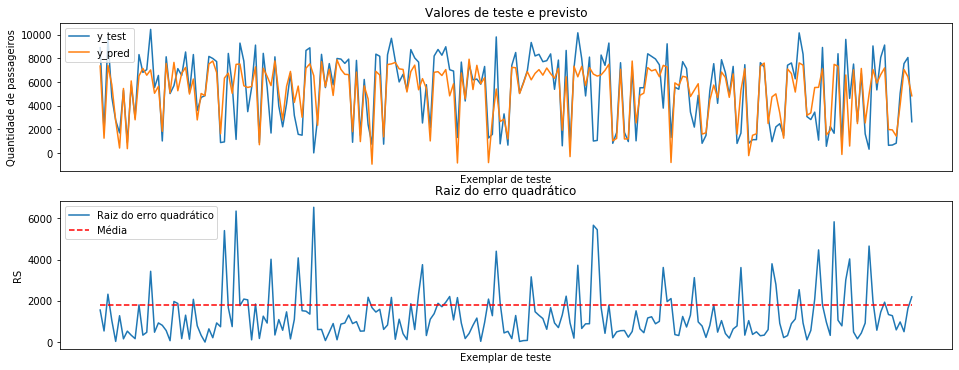

In [5]:
X = circular_database.drop(columns=['8012','8022'])
y = circular_database[['8012','8022']].sum(axis=1)
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

##Results
# The coefficients
print('Coefficients: \n', pd.DataFrame(regr.coef_, index=X.columns), '\n')
# The mean squared error
print("Mean squared error:\t%.2f" % mean_squared_error(y_test, y_pred))
# RMS
print("RMS:\t%.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score (1 is perfect prediction)
print('Variance score:\t%.2f' % r2_score(y_test, y_pred))
# Plot outputs
df = pd.DataFrame(index=y_test.index, columns=['y_test', 'y_pred'])
df['y_test'] = y_test
df['y_pred'] = y_pred
df.sort_index()

plt.figure(figsize=(16,6))

ax0 = plt.subplot(211)
plt.title('Valores de teste e previsto')
plt.plot(df.index, df['y_test'], df.index, df['y_pred'])
plt.xticks(())
plt.xlabel('Exemplar de teste')
plt.ylabel('Quantidade de passageiros')
plt.legend(['y_test', 'y_pred'])

plt.subplot(212, sharex=ax0)
plt.title('Raiz do erro quadrático')
plt.plot(df.index,
         np.sqrt(np.square(df['y_test']-df['y_pred'])),
         df.index,
         np.ones(len(df)) * np.sqrt(mean_squared_error(y_test, y_pred)), '--r')
plt.legend(['Raiz do erro quadrático', 'Média'])
plt.xticks(())
plt.xlabel('Exemplar de teste')
plt.ylabel('RS')

# Definindo primeira rede neural

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1701 samples, validate on 189 samples
Epoch 1/10000
1701/1701 [==============================] - 2s 1ms/step - loss: 35224776.5550 - mean_squared_error: 35224776.5550 - mean_absolute_percentage_error: 99.9223 - val_loss: 37840419.1534 - val_mean_squared_error: 37840419.1534 - val_mean_absolute_percentage_error: 99.9090
Epoch 2/10000
1701/1701 [==============================] - 0s 64us/step - loss: 35210324.4574 - mean_squared_error: 35210324.4574 - mean_absolute_percentage_error: 99.8270 - val_loss: 37832157.7566 - val_mean_squared_error: 37832157.7566 - val_mean_absolute_percentage_error: 99.8800
Epoch 3/10000
1701/1701 [==============================] - 0s 64us/step - loss: 35204101.5332 - mean_squared_error: 35204101.5332 - mean_absolute_percentage_error: 99.7917 - val_loss: 37826656.1058 - val_mean_squared_error: 37826656.1058 - val_mean_absolute_percenta

Epoch 28/10000
1701/1701 [==============================] - 0s 45us/step - loss: 35115039.3416 - mean_squared_error: 35115039.3416 - mean_absolute_percentage_error: 99.4290 - val_loss: 37734090.0952 - val_mean_squared_error: 37734090.0952 - val_mean_absolute_percentage_error: 99.5323
Epoch 29/10000
1701/1701 [==============================] - 0s 41us/step - loss: 35111698.4268 - mean_squared_error: 35111698.4268 - mean_absolute_percentage_error: 99.4142 - val_loss: 37730567.3016 - val_mean_squared_error: 37730567.3016 - val_mean_absolute_percentage_error: 99.5198
Epoch 30/10000
1701/1701 [==============================] - 0s 37us/step - loss: 35108367.5603 - mean_squared_error: 35108367.5603 - mean_absolute_percentage_error: 99.4024 - val_loss: 37727066.5397 - val_mean_squared_error: 37727066.5397 - val_mean_absolute_percentage_error: 99.5074
Epoch 31/10000
1701/1701 [==============================] - 0s 37us/step - loss: 35105027.1276 - mean_squared_error: 35105027.1276 - mean_absolut

Epoch 57/10000
1701/1701 [==============================] - 0s 79us/step - loss: 35019298.6196 - mean_squared_error: 35019298.6196 - mean_absolute_percentage_error: 99.1251 - val_loss: 37633483.0899 - val_mean_squared_error: 37633483.0899 - val_mean_absolute_percentage_error: 99.1752
Epoch 58/10000
1701/1701 [==============================] - 0s 63us/step - loss: 35016016.9853 - mean_squared_error: 35016016.9853 - mean_absolute_percentage_error: 99.1171 - val_loss: 37630015.6190 - val_mean_squared_error: 37630015.6190 - val_mean_absolute_percentage_error: 99.1629
Epoch 59/10000
1701/1701 [==============================] - 0s 72us/step - loss: 35012734.9465 - mean_squared_error: 35012734.9465 - mean_absolute_percentage_error: 99.1060 - val_loss: 37626600.2116 - val_mean_squared_error: 37626600.2116 - val_mean_absolute_percentage_error: 99.1507
Epoch 60/10000
1701/1701 [==============================] - 0s 78us/step - loss: 35009448.4750 - mean_squared_error: 35009448.4750 - mean_absolut

Epoch 86/10000
1701/1701 [==============================] - 0s 83us/step - loss: 34924169.4697 - mean_squared_error: 34924169.4697 - mean_absolute_percentage_error: 98.8486 - val_loss: 37533520.3386 - val_mean_squared_error: 37533520.3386 - val_mean_absolute_percentage_error: 98.8197
Epoch 87/10000
1701/1701 [==============================] - 0s 83us/step - loss: 34920883.7366 - mean_squared_error: 34920883.7366 - mean_absolute_percentage_error: 98.8405 - val_loss: 37530067.5767 - val_mean_squared_error: 37530067.5767 - val_mean_absolute_percentage_error: 98.8074
Epoch 88/10000
1701/1701 [==============================] - 0s 72us/step - loss: 34917596.5996 - mean_squared_error: 34917596.5996 - mean_absolute_percentage_error: 98.8286 - val_loss: 37526579.4921 - val_mean_squared_error: 37526579.4921 - val_mean_absolute_percentage_error: 98.7950
Epoch 89/10000
1701/1701 [==============================] - 0s 79us/step - loss: 34914316.0988 - mean_squared_error: 34914316.0988 - mean_absolut

Epoch 115/10000
1701/1701 [==============================] - 0s 45us/step - loss: 34829290.3292 - mean_squared_error: 34829290.3292 - mean_absolute_percentage_error: 98.5724 - val_loss: 37433789.0370 - val_mean_squared_error: 37433789.0370 - val_mean_absolute_percentage_error: 98.4645
Epoch 116/10000
1701/1701 [==============================] - 0s 40us/step - loss: 34826035.6167 - mean_squared_error: 34826035.6167 - mean_absolute_percentage_error: 98.5641 - val_loss: 37430358.2434 - val_mean_squared_error: 37430358.2434 - val_mean_absolute_percentage_error: 98.4522
Epoch 117/10000
1701/1701 [==============================] - 0s 36us/step - loss: 34822753.9095 - mean_squared_error: 34822753.9095 - mean_absolute_percentage_error: 98.5541 - val_loss: 37426924.2540 - val_mean_squared_error: 37426924.2540 - val_mean_absolute_percentage_error: 98.4400
Epoch 118/10000
1701/1701 [==============================] - 0s 40us/step - loss: 34819485.8507 - mean_squared_error: 34819485.8507 - mean_abs

Epoch 144/10000
1701/1701 [==============================] - 0s 41us/step - loss: 34734764.4139 - mean_squared_error: 34734764.4139 - mean_absolute_percentage_error: 98.2933 - val_loss: 37334402.5397 - val_mean_squared_error: 37334402.5397 - val_mean_absolute_percentage_error: 98.1098
Epoch 145/10000
1701/1701 [==============================] - 0s 41us/step - loss: 34731494.0899 - mean_squared_error: 34731494.0899 - mean_absolute_percentage_error: 98.2858 - val_loss: 37330983.8095 - val_mean_squared_error: 37330983.8095 - val_mean_absolute_percentage_error: 98.0976
Epoch 146/10000
1701/1701 [==============================] - 0s 39us/step - loss: 34728249.5144 - mean_squared_error: 34728249.5144 - mean_absolute_percentage_error: 98.2775 - val_loss: 37327588.4021 - val_mean_squared_error: 37327588.4021 - val_mean_absolute_percentage_error: 98.0855
Epoch 147/10000
1701/1701 [==============================] - 0s 37us/step - loss: 34724993.2205 - mean_squared_error: 34724993.2205 - mean_abs

Epoch 173/10000
1701/1701 [==============================] - 0s 44us/step - loss: 34640342.6737 - mean_squared_error: 34640342.6737 - mean_absolute_percentage_error: 98.0196 - val_loss: 37235154.6878 - val_mean_squared_error: 37235154.6878 - val_mean_absolute_percentage_error: 97.7550
Epoch 174/10000
1701/1701 [==============================] - 0s 40us/step - loss: 34637080.3504 - mean_squared_error: 34637080.3504 - mean_absolute_percentage_error: 98.0085 - val_loss: 37231730.6032 - val_mean_squared_error: 37231730.6032 - val_mean_absolute_percentage_error: 97.7428
Epoch 175/10000
1701/1701 [==============================] - 0s 44us/step - loss: 34633819.6684 - mean_squared_error: 34633819.6684 - mean_absolute_percentage_error: 98.0004 - val_loss: 37228289.1640 - val_mean_squared_error: 37228289.1640 - val_mean_absolute_percentage_error: 97.7305
Epoch 176/10000
1701/1701 [==============================] - 0s 53us/step - loss: 34630556.9171 - mean_squared_error: 34630556.9171 - mean_abs

1701/1701 [==============================] - 0s 44us/step - loss: 34549357.3733 - mean_squared_error: 34549357.3733 - mean_absolute_percentage_error: 97.7519 - val_loss: 37139459.4709 - val_mean_squared_error: 37139459.4709 - val_mean_absolute_percentage_error: 97.4124
Epoch 202/10000
1701/1701 [==============================] - 0s 41us/step - loss: 34546079.7719 - mean_squared_error: 34546079.7719 - mean_absolute_percentage_error: 97.7405 - val_loss: 37136050.0952 - val_mean_squared_error: 37136050.0952 - val_mean_absolute_percentage_error: 97.4001
Epoch 203/10000
1701/1701 [==============================] - 0s 39us/step - loss: 34542840.4727 - mean_squared_error: 34542840.4727 - mean_absolute_percentage_error: 97.7313 - val_loss: 37132646.7513 - val_mean_squared_error: 37132646.7513 - val_mean_absolute_percentage_error: 97.3880
Epoch 204/10000
1701/1701 [==============================] - 0s 38us/step - loss: 34539591.0006 - mean_squared_error: 34539591.0006 - mean_absolute_percentage

Epoch 230/10000
1701/1701 [==============================] - 0s 47us/step - loss: 34455246.1670 - mean_squared_error: 34455246.1670 - mean_absolute_percentage_error: 97.4744 - val_loss: 37040537.5873 - val_mean_squared_error: 37040537.5873 - val_mean_absolute_percentage_error: 97.0575
Epoch 231/10000
1701/1701 [==============================] - 0s 39us/step - loss: 34452006.2175 - mean_squared_error: 34452006.2175 - mean_absolute_percentage_error: 97.4657 - val_loss: 37037128.8889 - val_mean_squared_error: 37037128.8889 - val_mean_absolute_percentage_error: 97.0453
Epoch 232/10000
1701/1701 [==============================] - 0s 37us/step - loss: 34448763.1440 - mean_squared_error: 34448763.1440 - mean_absolute_percentage_error: 97.4553 - val_loss: 37033716.1905 - val_mean_squared_error: 37033716.1905 - val_mean_absolute_percentage_error: 97.0330
Epoch 233/10000
1701/1701 [==============================] - 0s 36us/step - loss: 34445521.1346 - mean_squared_error: 34445521.1346 - mean_abs

Epoch 259/10000
1701/1701 [==============================] - 0s 47us/step - loss: 34361271.8542 - mean_squared_error: 34361271.8542 - mean_absolute_percentage_error: 97.2053 - val_loss: 36941743.7037 - val_mean_squared_error: 36941743.7037 - val_mean_absolute_percentage_error: 96.7025
Epoch 260/10000
1701/1701 [==============================] - 0s 39us/step - loss: 34358029.7590 - mean_squared_error: 34358029.7590 - mean_absolute_percentage_error: 97.1979 - val_loss: 36938297.5873 - val_mean_squared_error: 36938297.5873 - val_mean_absolute_percentage_error: 96.6901
Epoch 261/10000
1701/1701 [==============================] - 0s 38us/step - loss: 34354790.8477 - mean_squared_error: 34354790.8477 - mean_absolute_percentage_error: 97.1894 - val_loss: 36934898.8571 - val_mean_squared_error: 36934898.8571 - val_mean_absolute_percentage_error: 96.6779
Epoch 262/10000
1701/1701 [==============================] - 0s 36us/step - loss: 34351563.0570 - mean_squared_error: 34351563.0570 - mean_abs

Epoch 288/10000
1701/1701 [==============================] - 0s 48us/step - loss: 34267571.1899 - mean_squared_error: 34267571.1899 - mean_absolute_percentage_error: 96.9426 - val_loss: 36843183.1746 - val_mean_squared_error: 36843183.1746 - val_mean_absolute_percentage_error: 96.3477
Epoch 289/10000
1701/1701 [==============================] - 0s 34us/step - loss: 34264349.3110 - mean_squared_error: 34264349.3110 - mean_absolute_percentage_error: 96.9366 - val_loss: 36839789.7989 - val_mean_squared_error: 36839789.7989 - val_mean_absolute_percentage_error: 96.3355
Epoch 290/10000
1701/1701 [==============================] - 0s 46us/step - loss: 34261131.6437 - mean_squared_error: 34261131.6437 - mean_absolute_percentage_error: 96.9250 - val_loss: 36836408.3598 - val_mean_squared_error: 36836408.3598 - val_mean_absolute_percentage_error: 96.3233
Epoch 291/10000
1701/1701 [==============================] - 0s 44us/step - loss: 34257904.2328 - mean_squared_error: 34257904.2328 - mean_abs

Epoch 317/10000
1701/1701 [==============================] - 0s 44us/step - loss: 34174026.0165 - mean_squared_error: 34174026.0165 - mean_absolute_percentage_error: 96.6932 - val_loss: 36744791.9365 - val_mean_squared_error: 36744791.9365 - val_mean_absolute_percentage_error: 95.9929
Epoch 318/10000
1701/1701 [==============================] - 0s 40us/step - loss: 34170803.7178 - mean_squared_error: 34170803.7178 - mean_absolute_percentage_error: 96.6812 - val_loss: 36741405.2063 - val_mean_squared_error: 36741405.2063 - val_mean_absolute_percentage_error: 95.9807
Epoch 319/10000
1701/1701 [==============================] - 0s 38us/step - loss: 34167568.6972 - mean_squared_error: 34167568.6972 - mean_absolute_percentage_error: 96.6730 - val_loss: 36738016.4444 - val_mean_squared_error: 36738016.4444 - val_mean_absolute_percentage_error: 95.9685
Epoch 320/10000
1701/1701 [==============================] - 0s 38us/step - loss: 34164363.9365 - mean_squared_error: 34164363.9365 - mean_abs

Epoch 346/10000
1701/1701 [==============================] - 0s 51us/step - loss: 34080629.6355 - mean_squared_error: 34080629.6355 - mean_absolute_percentage_error: 96.4413 - val_loss: 36646562.7302 - val_mean_squared_error: 36646562.7302 - val_mean_absolute_percentage_error: 95.6381
Epoch 347/10000
1701/1701 [==============================] - 0s 36us/step - loss: 34077423.1723 - mean_squared_error: 34077423.1723 - mean_absolute_percentage_error: 96.4305 - val_loss: 36643180.0000 - val_mean_squared_error: 36643180.0000 - val_mean_absolute_percentage_error: 95.6259
Epoch 348/10000
1701/1701 [==============================] - 0s 33us/step - loss: 34074201.9377 - mean_squared_error: 34074201.9377 - mean_absolute_percentage_error: 96.4206 - val_loss: 36639780.5926 - val_mean_squared_error: 36639780.5926 - val_mean_absolute_percentage_error: 95.6136
Epoch 349/10000
1701/1701 [==============================] - 0s 38us/step - loss: 34070966.1540 - mean_squared_error: 34070966.1540 - mean_abs

Epoch 375/10000
1701/1701 [==============================] - 0s 45us/step - loss: 33987542.9982 - mean_squared_error: 33987542.9982 - mean_absolute_percentage_error: 96.1875 - val_loss: 36548606.2646 - val_mean_squared_error: 36548606.2646 - val_mean_absolute_percentage_error: 95.2836
Epoch 376/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33984324.0376 - mean_squared_error: 33984324.0376 - mean_absolute_percentage_error: 96.1793 - val_loss: 36545282.2434 - val_mean_squared_error: 36545282.2434 - val_mean_absolute_percentage_error: 95.2715
Epoch 377/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33981120.3410 - mean_squared_error: 33981120.3410 - mean_absolute_percentage_error: 96.1710 - val_loss: 36541856.1270 - val_mean_squared_error: 36541856.1270 - val_mean_absolute_percentage_error: 95.2591
Epoch 378/10000
1701/1701 [==============================] - 0s 40us/step - loss: 33977889.7731 - mean_squared_error: 33977889.7731 - mean_abs

Epoch 404/10000
1701/1701 [==============================] - 0s 53us/step - loss: 33894414.2175 - mean_squared_error: 33894414.2175 - mean_absolute_percentage_error: 95.9394 - val_loss: 36450673.6720 - val_mean_squared_error: 36450673.6720 - val_mean_absolute_percentage_error: 94.9286
Epoch 405/10000
1701/1701 [==============================] - 0s 48us/step - loss: 33891196.9571 - mean_squared_error: 33891196.9571 - mean_absolute_percentage_error: 95.9331 - val_loss: 36447276.9101 - val_mean_squared_error: 36447276.9101 - val_mean_absolute_percentage_error: 94.9162
Epoch 406/10000
1701/1701 [==============================] - 0s 41us/step - loss: 33887985.4274 - mean_squared_error: 33887985.4274 - mean_absolute_percentage_error: 95.9246 - val_loss: 36443888.2116 - val_mean_squared_error: 36443888.2116 - val_mean_absolute_percentage_error: 94.9039
Epoch 407/10000
1701/1701 [==============================] - 0s 35us/step - loss: 33884774.8948 - mean_squared_error: 33884774.8948 - mean_abs

Epoch 433/10000
1701/1701 [==============================] - 0s 44us/step - loss: 33801636.3351 - mean_squared_error: 33801636.3351 - mean_absolute_percentage_error: 95.7062 - val_loss: 36353044.5291 - val_mean_squared_error: 36353044.5291 - val_mean_absolute_percentage_error: 94.5740
Epoch 434/10000
1701/1701 [==============================] - 0s 38us/step - loss: 33798442.7772 - mean_squared_error: 33798442.7772 - mean_absolute_percentage_error: 95.6960 - val_loss: 36349688.4444 - val_mean_squared_error: 36349688.4444 - val_mean_absolute_percentage_error: 94.5618
Epoch 435/10000
1701/1701 [==============================] - 0s 38us/step - loss: 33795236.5808 - mean_squared_error: 33795236.5808 - mean_absolute_percentage_error: 95.6883 - val_loss: 36346296.3598 - val_mean_squared_error: 36346296.3598 - val_mean_absolute_percentage_error: 94.5495
Epoch 436/10000
1701/1701 [==============================] - 0s 38us/step - loss: 33792023.4862 - mean_squared_error: 33792023.4862 - mean_abs

Epoch 462/10000
1701/1701 [==============================] - 0s 46us/step - loss: 33708965.1911 - mean_squared_error: 33708965.1911 - mean_absolute_percentage_error: 95.4698 - val_loss: 36255550.0317 - val_mean_squared_error: 36255550.0317 - val_mean_absolute_percentage_error: 94.2193
Epoch 463/10000
1701/1701 [==============================] - 0s 41us/step - loss: 33705780.7772 - mean_squared_error: 33705780.7772 - mean_absolute_percentage_error: 95.4633 - val_loss: 36252167.2381 - val_mean_squared_error: 36252167.2381 - val_mean_absolute_percentage_error: 94.2070
Epoch 464/10000
1701/1701 [==============================] - 0s 38us/step - loss: 33702590.3319 - mean_squared_error: 33702590.3319 - mean_absolute_percentage_error: 95.4546 - val_loss: 36248829.1852 - val_mean_squared_error: 36248829.1852 - val_mean_absolute_percentage_error: 94.1948
Epoch 465/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33699427.2263 - mean_squared_error: 33699427.2263 - mean_abs

Epoch 491/10000
1701/1701 [==============================] - 0s 41us/step - loss: 33616450.0682 - mean_squared_error: 33616450.0682 - mean_absolute_percentage_error: 95.2371 - val_loss: 36158169.4392 - val_mean_squared_error: 36158169.4392 - val_mean_absolute_percentage_error: 93.8644
Epoch 492/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33613272.6443 - mean_squared_error: 33613272.6443 - mean_absolute_percentage_error: 95.2275 - val_loss: 36154841.0476 - val_mean_squared_error: 36154841.0476 - val_mean_absolute_percentage_error: 93.8522
Epoch 493/10000
1701/1701 [==============================] - 0s 41us/step - loss: 33610081.6014 - mean_squared_error: 33610081.6014 - mean_absolute_percentage_error: 95.2174 - val_loss: 36151483.9788 - val_mean_squared_error: 36151483.9788 - val_mean_absolute_percentage_error: 93.8400
Epoch 494/10000
1701/1701 [==============================] - 0s 40us/step - loss: 33606911.2640 - mean_squared_error: 33606911.2640 - mean_abs

Epoch 520/10000
1701/1701 [==============================] - 0s 40us/step - loss: 33524148.8442 - mean_squared_error: 33524148.8442 - mean_absolute_percentage_error: 95.0064 - val_loss: 36061020.9101 - val_mean_squared_error: 36061020.9101 - val_mean_absolute_percentage_error: 93.5097
Epoch 521/10000
1701/1701 [==============================] - 0s 38us/step - loss: 33520957.0935 - mean_squared_error: 33520957.0935 - mean_absolute_percentage_error: 94.9975 - val_loss: 36057686.5503 - val_mean_squared_error: 36057686.5503 - val_mean_absolute_percentage_error: 93.4975
Epoch 522/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33517771.7754 - mean_squared_error: 33517771.7754 - mean_absolute_percentage_error: 94.9890 - val_loss: 36054309.7884 - val_mean_squared_error: 36054309.7884 - val_mean_absolute_percentage_error: 93.4851
Epoch 523/10000
1701/1701 [==============================] - 0s 41us/step - loss: 33514586.3563 - mean_squared_error: 33514586.3563 - mean_abs

Epoch 549/10000
1701/1701 [==============================] - 0s 40us/step - loss: 33432005.5944 - mean_squared_error: 33432005.5944 - mean_absolute_percentage_error: 94.7791 - val_loss: 35964052.3810 - val_mean_squared_error: 35964052.3810 - val_mean_absolute_percentage_error: 93.1550
Epoch 550/10000
1701/1701 [==============================] - 0s 35us/step - loss: 33428825.5485 - mean_squared_error: 33428825.5485 - mean_absolute_percentage_error: 94.7714 - val_loss: 35960694.6349 - val_mean_squared_error: 35960694.6349 - val_mean_absolute_percentage_error: 93.1427
Epoch 551/10000
1701/1701 [==============================] - 0s 37us/step - loss: 33425655.6937 - mean_squared_error: 33425655.6937 - mean_absolute_percentage_error: 94.7603 - val_loss: 35957349.2593 - val_mean_squared_error: 35957349.2593 - val_mean_absolute_percentage_error: 93.1304
Epoch 552/10000
1701/1701 [==============================] - 0s 47us/step - loss: 33422499.4603 - mean_squared_error: 33422499.4603 - mean_abs

Epoch 578/10000
1701/1701 [==============================] - 0s 43us/step - loss: 33340111.1617 - mean_squared_error: 33340111.1617 - mean_absolute_percentage_error: 94.5491 - val_loss: 35867305.9471 - val_mean_squared_error: 35867305.9471 - val_mean_absolute_percentage_error: 92.8004
Epoch 579/10000
1701/1701 [==============================] - 0s 40us/step - loss: 33336940.0529 - mean_squared_error: 33336940.0529 - mean_absolute_percentage_error: 94.5427 - val_loss: 35863973.1852 - val_mean_squared_error: 35863973.1852 - val_mean_absolute_percentage_error: 92.7882
Epoch 580/10000
1701/1701 [==============================] - 0s 37us/step - loss: 33333778.3539 - mean_squared_error: 33333778.3539 - mean_absolute_percentage_error: 94.5347 - val_loss: 35860682.1481 - val_mean_squared_error: 35860682.1481 - val_mean_absolute_percentage_error: 92.7761
Epoch 581/10000
1701/1701 [==============================] - 0s 36us/step - loss: 33330626.1023 - mean_squared_error: 33330626.1023 - mean_abs

Epoch 607/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33248202.6032 - mean_squared_error: 33248202.6032 - mean_absolute_percentage_error: 94.3213 - val_loss: 35770560.9841 - val_mean_squared_error: 35770560.9841 - val_mean_absolute_percentage_error: 92.4453
Epoch 608/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33245045.4015 - mean_squared_error: 33245045.4015 - mean_absolute_percentage_error: 94.3128 - val_loss: 35767230.5608 - val_mean_squared_error: 35767230.5608 - val_mean_absolute_percentage_error: 92.4331
Epoch 609/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33241886.3398 - mean_squared_error: 33241886.3398 - mean_absolute_percentage_error: 94.3049 - val_loss: 35763894.8466 - val_mean_squared_error: 35763894.8466 - val_mean_absolute_percentage_error: 92.4208
Epoch 610/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33238753.1946 - mean_squared_error: 33238753.1946 - mean_abs

Epoch 636/10000
1701/1701 [==============================] - 0s 43us/step - loss: 33156703.7366 - mean_squared_error: 33156703.7366 - mean_absolute_percentage_error: 94.0973 - val_loss: 35674218.5820 - val_mean_squared_error: 35674218.5820 - val_mean_absolute_percentage_error: 92.0910
Epoch 637/10000
1701/1701 [==============================] - 0s 57us/step - loss: 33153532.1387 - mean_squared_error: 33153532.1387 - mean_absolute_percentage_error: 94.0898 - val_loss: 35670871.4497 - val_mean_squared_error: 35670871.4497 - val_mean_absolute_percentage_error: 92.0787
Epoch 638/10000
1701/1701 [==============================] - 0s 49us/step - loss: 33150369.7460 - mean_squared_error: 33150369.7460 - mean_absolute_percentage_error: 94.0849 - val_loss: 35667565.3968 - val_mean_squared_error: 35667565.3968 - val_mean_absolute_percentage_error: 92.0665
Epoch 639/10000
1701/1701 [==============================] - 0s 41us/step - loss: 33147236.5761 - mean_squared_error: 33147236.5761 - mean_abs

Epoch 665/10000
1701/1701 [==============================] - 0s 47us/step - loss: 33065238.8630 - mean_squared_error: 33065238.8630 - mean_absolute_percentage_error: 93.8795 - val_loss: 35577919.9894 - val_mean_squared_error: 35577919.9894 - val_mean_absolute_percentage_error: 91.7362
Epoch 666/10000
1701/1701 [==============================] - 0s 44us/step - loss: 33062095.1887 - mean_squared_error: 33062095.1887 - mean_absolute_percentage_error: 93.8742 - val_loss: 35574621.3228 - val_mean_squared_error: 35574621.3228 - val_mean_absolute_percentage_error: 91.7240
Epoch 667/10000
1701/1701 [==============================] - 0s 39us/step - loss: 33058955.6673 - mean_squared_error: 33058955.6673 - mean_absolute_percentage_error: 93.8680 - val_loss: 35571291.1746 - val_mean_squared_error: 35571291.1746 - val_mean_absolute_percentage_error: 91.7118
Epoch 668/10000
1701/1701 [==============================] - 0s 38us/step - loss: 33055811.7578 - mean_squared_error: 33055811.7578 - mean_abs

1701/1701 [==============================] - 0s 49us/step - loss: 32977130.0200 - mean_squared_error: 32977130.0200 - mean_absolute_percentage_error: 93.6704 - val_loss: 35485138.8995 - val_mean_squared_error: 35485138.8995 - val_mean_absolute_percentage_error: 91.3938
Epoch 694/10000
1701/1701 [==============================] - 0s 38us/step - loss: 32973990.1799 - mean_squared_error: 32973990.1799 - mean_absolute_percentage_error: 93.6657 - val_loss: 35481847.5556 - val_mean_squared_error: 35481847.5556 - val_mean_absolute_percentage_error: 91.3816
Epoch 695/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32970845.2628 - mean_squared_error: 32970845.2628 - mean_absolute_percentage_error: 93.6567 - val_loss: 35478512.4233 - val_mean_squared_error: 35478512.4233 - val_mean_absolute_percentage_error: 91.3693
Epoch 696/10000
1701/1701 [==============================] - 0s 38us/step - loss: 32967691.8848 - mean_squared_error: 32967691.8848 - mean_absolute_percentage

Epoch 722/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32886066.1752 - mean_squared_error: 32886066.1752 - mean_absolute_percentage_error: 93.4605 - val_loss: 35389250.7407 - val_mean_squared_error: 35389250.7407 - val_mean_absolute_percentage_error: 91.0392
Epoch 723/10000
1701/1701 [==============================] - 0s 42us/step - loss: 32882926.0459 - mean_squared_error: 32882926.0459 - mean_absolute_percentage_error: 93.4514 - val_loss: 35385931.9788 - val_mean_squared_error: 35385931.9788 - val_mean_absolute_percentage_error: 91.0269
Epoch 724/10000
1701/1701 [==============================] - 0s 40us/step - loss: 32879792.4400 - mean_squared_error: 32879792.4400 - mean_absolute_percentage_error: 93.4427 - val_loss: 35382619.9577 - val_mean_squared_error: 35382619.9577 - val_mean_absolute_percentage_error: 91.0147
Epoch 725/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32876673.7037 - mean_squared_error: 32876673.7037 - mean_abs

Epoch 751/10000
1701/1701 [==============================] - 0s 45us/step - loss: 32795105.5708 - mean_squared_error: 32795105.5708 - mean_absolute_percentage_error: 93.2471 - val_loss: 35293436.8571 - val_mean_squared_error: 35293436.8571 - val_mean_absolute_percentage_error: 90.6843
Epoch 752/10000
1701/1701 [==============================] - 0s 42us/step - loss: 32791982.3022 - mean_squared_error: 32791982.3022 - mean_absolute_percentage_error: 93.2394 - val_loss: 35290138.1270 - val_mean_squared_error: 35290138.1270 - val_mean_absolute_percentage_error: 90.6721
Epoch 753/10000
1701/1701 [==============================] - 0s 42us/step - loss: 32788849.2663 - mean_squared_error: 32788849.2663 - mean_absolute_percentage_error: 93.2306 - val_loss: 35286847.7354 - val_mean_squared_error: 35286847.7354 - val_mean_absolute_percentage_error: 90.6599
Epoch 754/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32785732.0423 - mean_squared_error: 32785732.0423 - mean_abs

Epoch 780/10000
1701/1701 [==============================] - 0s 47us/step - loss: 32704390.0788 - mean_squared_error: 32704390.0788 - mean_absolute_percentage_error: 93.0328 - val_loss: 35197866.6984 - val_mean_squared_error: 35197866.6984 - val_mean_absolute_percentage_error: 90.3297
Epoch 781/10000
1701/1701 [==============================] - 0s 41us/step - loss: 32701263.8424 - mean_squared_error: 32701263.8424 - mean_absolute_percentage_error: 93.0263 - val_loss: 35194576.9841 - val_mean_squared_error: 35194576.9841 - val_mean_absolute_percentage_error: 90.3175
Epoch 782/10000
1701/1701 [==============================] - 0s 41us/step - loss: 32698119.6096 - mean_squared_error: 32698119.6096 - mean_absolute_percentage_error: 93.0185 - val_loss: 35191280.5608 - val_mean_squared_error: 35191280.5608 - val_mean_absolute_percentage_error: 90.3052
Epoch 783/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32694989.5591 - mean_squared_error: 32694989.5591 - mean_abs

Epoch 809/10000
1701/1701 [==============================] - 0s 48us/step - loss: 32613759.7014 - mean_squared_error: 32613759.7014 - mean_absolute_percentage_error: 92.8222 - val_loss: 35102398.7831 - val_mean_squared_error: 35102398.7831 - val_mean_absolute_percentage_error: 89.9748
Epoch 810/10000
1701/1701 [==============================] - 0s 43us/step - loss: 32610651.4685 - mean_squared_error: 32610651.4685 - mean_absolute_percentage_error: 92.8142 - val_loss: 35099153.4074 - val_mean_squared_error: 35099153.4074 - val_mean_absolute_percentage_error: 89.9627
Epoch 811/10000
1701/1701 [==============================] - 0s 45us/step - loss: 32607546.9418 - mean_squared_error: 32607546.9418 - mean_absolute_percentage_error: 92.8063 - val_loss: 35095869.3545 - val_mean_squared_error: 35095869.3545 - val_mean_absolute_percentage_error: 89.9505
Epoch 812/10000
1701/1701 [==============================] - 0s 41us/step - loss: 32604430.0999 - mean_squared_error: 32604430.0999 - mean_abs

Epoch 838/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32523363.0006 - mean_squared_error: 32523363.0006 - mean_absolute_percentage_error: 92.6087 - val_loss: 35007142.5926 - val_mean_squared_error: 35007142.5926 - val_mean_absolute_percentage_error: 89.6200
Epoch 839/10000
1701/1701 [==============================] - 0s 41us/step - loss: 32520242.4762 - mean_squared_error: 32520242.4762 - mean_absolute_percentage_error: 92.6046 - val_loss: 35003891.5556 - val_mean_squared_error: 35003891.5556 - val_mean_absolute_percentage_error: 89.6079
Epoch 840/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32517115.2898 - mean_squared_error: 32517115.2898 - mean_absolute_percentage_error: 92.5945 - val_loss: 35000593.4709 - val_mean_squared_error: 35000593.4709 - val_mean_absolute_percentage_error: 89.5956
Epoch 841/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32513995.4638 - mean_squared_error: 32513995.4638 - mean_abs

Epoch 867/10000
1701/1701 [==============================] - 0s 49us/step - loss: 32433254.6831 - mean_squared_error: 32433254.6831 - mean_absolute_percentage_error: 92.4038 - val_loss: 34912225.2063 - val_mean_squared_error: 34912225.2063 - val_mean_absolute_percentage_error: 89.2659
Epoch 868/10000
1701/1701 [==============================] - 0s 36us/step - loss: 32430140.1681 - mean_squared_error: 32430140.1681 - mean_absolute_percentage_error: 92.3937 - val_loss: 34908918.1376 - val_mean_squared_error: 34908918.1376 - val_mean_absolute_percentage_error: 89.2535
Epoch 869/10000
1701/1701 [==============================] - 0s 53us/step - loss: 32427037.4321 - mean_squared_error: 32427037.4321 - mean_absolute_percentage_error: 92.3902 - val_loss: 34905655.4074 - val_mean_squared_error: 34905655.4074 - val_mean_absolute_percentage_error: 89.2413
Epoch 870/10000
1701/1701 [==============================] - 0s 34us/step - loss: 32423928.1188 - mean_squared_error: 32423928.1188 - mean_abs

Epoch 896/10000
1701/1701 [==============================] - 0s 45us/step - loss: 32343183.2710 - mean_squared_error: 32343183.2710 - mean_absolute_percentage_error: 92.1950 - val_loss: 34817302.9841 - val_mean_squared_error: 34817302.9841 - val_mean_absolute_percentage_error: 88.9110
Epoch 897/10000
1701/1701 [==============================] - 0s 41us/step - loss: 32340088.6138 - mean_squared_error: 32340088.6138 - mean_absolute_percentage_error: 92.1894 - val_loss: 34814052.9312 - val_mean_squared_error: 34814052.9312 - val_mean_absolute_percentage_error: 88.8989
Epoch 898/10000
1701/1701 [==============================] - 0s 43us/step - loss: 32336991.4874 - mean_squared_error: 32336991.4874 - mean_absolute_percentage_error: 92.1809 - val_loss: 34810780.1693 - val_mean_squared_error: 34810780.1693 - val_mean_absolute_percentage_error: 88.8866
Epoch 899/10000
1701/1701 [==============================] - 0s 38us/step - loss: 32333888.0212 - mean_squared_error: 32333888.0212 - mean_abs

Epoch 925/10000
1701/1701 [==============================] - 0s 45us/step - loss: 32253376.1105 - mean_squared_error: 32253376.1105 - mean_absolute_percentage_error: 91.9891 - val_loss: 34722677.5661 - val_mean_squared_error: 34722677.5661 - val_mean_absolute_percentage_error: 88.5567
Epoch 926/10000
1701/1701 [==============================] - 0s 40us/step - loss: 32250294.2669 - mean_squared_error: 32250294.2669 - mean_absolute_percentage_error: 91.9785 - val_loss: 34719406.8042 - val_mean_squared_error: 34719406.8042 - val_mean_absolute_percentage_error: 88.5444
Epoch 927/10000
1701/1701 [==============================] - 0s 37us/step - loss: 32247203.6238 - mean_squared_error: 32247203.6238 - mean_absolute_percentage_error: 91.9708 - val_loss: 34716170.0741 - val_mean_squared_error: 34716170.0741 - val_mean_absolute_percentage_error: 88.5323
Epoch 928/10000
1701/1701 [==============================] - 0s 40us/step - loss: 32244115.9483 - mean_squared_error: 32244115.9483 - mean_abs

Epoch 954/10000
1701/1701 [==============================] - 0s 44us/step - loss: 32163716.9453 - mean_squared_error: 32163716.9453 - mean_absolute_percentage_error: 91.7830 - val_loss: 34628184.0847 - val_mean_squared_error: 34628184.0847 - val_mean_absolute_percentage_error: 88.2022
Epoch 955/10000
1701/1701 [==============================] - 0s 40us/step - loss: 32160630.8383 - mean_squared_error: 32160630.8383 - mean_absolute_percentage_error: 91.7738 - val_loss: 34624906.9524 - val_mean_squared_error: 34624906.9524 - val_mean_absolute_percentage_error: 88.1899
Epoch 956/10000
1701/1701 [==============================] - 0s 39us/step - loss: 32157527.6872 - mean_squared_error: 32157527.6872 - mean_absolute_percentage_error: 91.7678 - val_loss: 34621652.2540 - val_mean_squared_error: 34621652.2540 - val_mean_absolute_percentage_error: 88.1776
Epoch 957/10000
1701/1701 [==============================] - 0s 37us/step - loss: 32154430.9982 - mean_squared_error: 32154430.9982 - mean_abs

Epoch 983/10000
1701/1701 [==============================] - 0s 40us/step - loss: 32074116.9242 - mean_squared_error: 32074116.9242 - mean_absolute_percentage_error: 91.5773 - val_loss: 34533712.1058 - val_mean_squared_error: 34533712.1058 - val_mean_absolute_percentage_error: 87.8471
Epoch 984/10000
1701/1701 [==============================] - 0s 41us/step - loss: 32071026.6596 - mean_squared_error: 32071026.6596 - mean_absolute_percentage_error: 91.5691 - val_loss: 34530454.0847 - val_mean_squared_error: 34530454.0847 - val_mean_absolute_percentage_error: 87.8348
Epoch 985/10000
1701/1701 [==============================] - 0s 40us/step - loss: 32067937.5191 - mean_squared_error: 32067937.5191 - mean_absolute_percentage_error: 91.5623 - val_loss: 34527221.0476 - val_mean_squared_error: 34527221.0476 - val_mean_absolute_percentage_error: 87.8226
Epoch 986/10000
1701/1701 [==============================] - 0s 38us/step - loss: 32064851.7695 - mean_squared_error: 32064851.7695 - mean_abs

Epoch 1012/10000
1701/1701 [==============================] - 0s 47us/step - loss: 31984696.4609 - mean_squared_error: 31984696.4609 - mean_absolute_percentage_error: 91.3761 - val_loss: 34439479.9153 - val_mean_squared_error: 34439479.9153 - val_mean_absolute_percentage_error: 87.4922
Epoch 1013/10000
1701/1701 [==============================] - 0s 40us/step - loss: 31981619.9694 - mean_squared_error: 31981619.9694 - mean_absolute_percentage_error: 91.3689 - val_loss: 34436218.1693 - val_mean_squared_error: 34436218.1693 - val_mean_absolute_percentage_error: 87.4799
Epoch 1014/10000
1701/1701 [==============================] - 0s 39us/step - loss: 31978529.6508 - mean_squared_error: 31978529.6508 - mean_absolute_percentage_error: 91.3601 - val_loss: 34432955.7460 - val_mean_squared_error: 34432955.7460 - val_mean_absolute_percentage_error: 87.4676
Epoch 1015/10000
1701/1701 [==============================] - 0s 41us/step - loss: 31975435.6496 - mean_squared_error: 31975435.6496 - mean

1701/1701 [==============================] - 0s 39us/step - loss: 31898602.1846 - mean_squared_error: 31898602.1846 - mean_absolute_percentage_error: 91.1855 - val_loss: 34348699.4392 - val_mean_squared_error: 34348699.4392 - val_mean_absolute_percentage_error: 87.1498
Epoch 1041/10000
1701/1701 [==============================] - 0s 44us/step - loss: 31895537.8342 - mean_squared_error: 31895537.8342 - mean_absolute_percentage_error: 91.1796 - val_loss: 34345452.0635 - val_mean_squared_error: 34345452.0635 - val_mean_absolute_percentage_error: 87.1375
Epoch 1042/10000
1701/1701 [==============================] - 0s 53us/step - loss: 31892436.8031 - mean_squared_error: 31892436.8031 - mean_absolute_percentage_error: 91.1746 - val_loss: 34342210.0106 - val_mean_squared_error: 34342210.0106 - val_mean_absolute_percentage_error: 87.1253
Epoch 1043/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31889382.5115 - mean_squared_error: 31889382.5115 - mean_absolute_percent

Epoch 1069/10000
1701/1701 [==============================] - 0s 39us/step - loss: 31809669.3533 - mean_squared_error: 31809669.3533 - mean_absolute_percentage_error: 90.9980 - val_loss: 34254924.3280 - val_mean_squared_error: 34254924.3280 - val_mean_absolute_percentage_error: 86.7953
Epoch 1070/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31806603.6026 - mean_squared_error: 31806603.6026 - mean_absolute_percentage_error: 90.9902 - val_loss: 34251692.9841 - val_mean_squared_error: 34251692.9841 - val_mean_absolute_percentage_error: 86.7831
Epoch 1071/10000
1701/1701 [==============================] - 0s 36us/step - loss: 31803531.9976 - mean_squared_error: 31803531.9976 - mean_absolute_percentage_error: 90.9838 - val_loss: 34248462.1905 - val_mean_squared_error: 34248462.1905 - val_mean_absolute_percentage_error: 86.7709
Epoch 1072/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31800466.7560 - mean_squared_error: 31800466.7560 - mean

1701/1701 [==============================] - 0s 45us/step - loss: 31723887.9600 - mean_squared_error: 31723887.9600 - mean_absolute_percentage_error: 90.8120 - val_loss: 34164469.2063 - val_mean_squared_error: 34164469.2063 - val_mean_absolute_percentage_error: 86.4529
Epoch 1098/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31720836.7972 - mean_squared_error: 31720836.7972 - mean_absolute_percentage_error: 90.8093 - val_loss: 34161260.5079 - val_mean_squared_error: 34161260.5079 - val_mean_absolute_percentage_error: 86.4407
Epoch 1099/10000
1701/1701 [==============================] - 0s 37us/step - loss: 31717797.0770 - mean_squared_error: 31717797.0770 - mean_absolute_percentage_error: 90.8026 - val_loss: 34158038.7937 - val_mean_squared_error: 34158038.7937 - val_mean_absolute_percentage_error: 86.4285
Epoch 1100/10000
1701/1701 [==============================] - 0s 37us/step - loss: 31714732.7055 - mean_squared_error: 31714732.7055 - mean_absolute_percent

Epoch 1126/10000
1701/1701 [==============================] - 0s 45us/step - loss: 31635296.0635 - mean_squared_error: 31635296.0635 - mean_absolute_percentage_error: 90.6266 - val_loss: 34071038.4339 - val_mean_squared_error: 34071038.4339 - val_mean_absolute_percentage_error: 86.0985
Epoch 1127/10000
1701/1701 [==============================] - 0s 41us/step - loss: 31632226.4733 - mean_squared_error: 31632226.4733 - mean_absolute_percentage_error: 90.6197 - val_loss: 34067822.3492 - val_mean_squared_error: 34067822.3492 - val_mean_absolute_percentage_error: 86.0863
Epoch 1128/10000
1701/1701 [==============================] - 0s 40us/step - loss: 31629194.1917 - mean_squared_error: 31629194.1917 - mean_absolute_percentage_error: 90.6143 - val_loss: 34064591.6508 - val_mean_squared_error: 34064591.6508 - val_mean_absolute_percentage_error: 86.0740
Epoch 1129/10000
1701/1701 [==============================] - 0s 40us/step - loss: 31626125.6096 - mean_squared_error: 31626125.6096 - mean

1701/1701 [==============================] - 0s 40us/step - loss: 31549850.5714 - mean_squared_error: 31549850.5714 - mean_absolute_percentage_error: 90.4427 - val_loss: 33980922.6667 - val_mean_squared_error: 33980922.6667 - val_mean_absolute_percentage_error: 85.7560
Epoch 1155/10000
1701/1701 [==============================] - 0s 44us/step - loss: 31546811.7061 - mean_squared_error: 31546811.7061 - mean_absolute_percentage_error: 90.4393 - val_loss: 33977729.6296 - val_mean_squared_error: 33977729.6296 - val_mean_absolute_percentage_error: 85.7439
Epoch 1156/10000
1701/1701 [==============================] - 0s 37us/step - loss: 31543769.8812 - mean_squared_error: 31543769.8812 - mean_absolute_percentage_error: 90.4328 - val_loss: 33974487.1746 - val_mean_squared_error: 33974487.1746 - val_mean_absolute_percentage_error: 85.7316
Epoch 1157/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31540703.9859 - mean_squared_error: 31540703.9859 - mean_absolute_percent

Epoch 1183/10000
1701/1701 [==============================] - 0s 41us/step - loss: 31461572.8912 - mean_squared_error: 31461572.8912 - mean_absolute_percentage_error: 90.2557 - val_loss: 33887789.8624 - val_mean_squared_error: 33887789.8624 - val_mean_absolute_percentage_error: 85.4015
Epoch 1184/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31458539.2651 - mean_squared_error: 31458539.2651 - mean_absolute_percentage_error: 90.2500 - val_loss: 33884597.4709 - val_mean_squared_error: 33884597.4709 - val_mean_absolute_percentage_error: 85.3893
Epoch 1185/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31455502.5844 - mean_squared_error: 31455502.5844 - mean_absolute_percentage_error: 90.2442 - val_loss: 33881430.4339 - val_mean_squared_error: 33881430.4339 - val_mean_absolute_percentage_error: 85.3772
Epoch 1186/10000
1701/1701 [==============================] - 0s 54us/step - loss: 31452474.0952 - mean_squared_error: 31452474.0952 - mean

1701/1701 [==============================] - 0s 43us/step - loss: 31376456.7454 - mean_squared_error: 31376456.7454 - mean_absolute_percentage_error: 90.0760 - val_loss: 33798006.7407 - val_mean_squared_error: 33798006.7407 - val_mean_absolute_percentage_error: 85.0590
Epoch 1212/10000
1701/1701 [==============================] - 0s 40us/step - loss: 31373422.3845 - mean_squared_error: 31373422.3845 - mean_absolute_percentage_error: 90.0661 - val_loss: 33794797.3333 - val_mean_squared_error: 33794797.3333 - val_mean_absolute_percentage_error: 85.0468
Epoch 1213/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31370389.9518 - mean_squared_error: 31370389.9518 - mean_absolute_percentage_error: 90.0620 - val_loss: 33791626.2646 - val_mean_squared_error: 33791626.2646 - val_mean_absolute_percentage_error: 85.0347
Epoch 1214/10000
1701/1701 [==============================] - 0s 39us/step - loss: 31367370.4456 - mean_squared_error: 31367370.4456 - mean_absolute_percent

Epoch 1240/10000
1701/1701 [==============================] - 0s 48us/step - loss: 31288460.6749 - mean_squared_error: 31288460.6749 - mean_absolute_percentage_error: 89.8843 - val_loss: 33705173.5344 - val_mean_squared_error: 33705173.5344 - val_mean_absolute_percentage_error: 84.7043
Epoch 1241/10000
1701/1701 [==============================] - 0s 41us/step - loss: 31285412.5362 - mean_squared_error: 31285412.5362 - mean_absolute_percentage_error: 89.8813 - val_loss: 33701956.1270 - val_mean_squared_error: 33701956.1270 - val_mean_absolute_percentage_error: 84.6920
Epoch 1242/10000
1701/1701 [==============================] - 0s 40us/step - loss: 31282382.2998 - mean_squared_error: 31282382.2998 - mean_absolute_percentage_error: 89.8727 - val_loss: 33698776.4127 - val_mean_squared_error: 33698776.4127 - val_mean_absolute_percentage_error: 84.6799
Epoch 1243/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31279365.9083 - mean_squared_error: 31279365.9083 - mean

1701/1701 [==============================] - 0s 43us/step - loss: 31203668.5550 - mean_squared_error: 31203668.5550 - mean_absolute_percentage_error: 89.7092 - val_loss: 33615734.4444 - val_mean_squared_error: 33615734.4444 - val_mean_absolute_percentage_error: 84.3619
Epoch 1269/10000
1701/1701 [==============================] - 0s 43us/step - loss: 31200669.2922 - mean_squared_error: 31200669.2922 - mean_absolute_percentage_error: 89.7014 - val_loss: 33612564.0529 - val_mean_squared_error: 33612564.0529 - val_mean_absolute_percentage_error: 84.3498
Epoch 1270/10000
1701/1701 [==============================] - 0s 52us/step - loss: 31197654.2281 - mean_squared_error: 31197654.2281 - mean_absolute_percentage_error: 89.6933 - val_loss: 33609365.3228 - val_mean_squared_error: 33609365.3228 - val_mean_absolute_percentage_error: 84.3375
Epoch 1271/10000
1701/1701 [==============================] - 0s 61us/step - loss: 31194641.4086 - mean_squared_error: 31194641.4086 - mean_absolute_percent

1701/1701 [==============================] - 0s 48us/step - loss: 31119159.1005 - mean_squared_error: 31119159.1005 - mean_absolute_percentage_error: 89.5389 - val_loss: 33526528.4021 - val_mean_squared_error: 33526528.4021 - val_mean_absolute_percentage_error: 84.0251
Epoch 1297/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31116152.0929 - mean_squared_error: 31116152.0929 - mean_absolute_percentage_error: 89.5344 - val_loss: 33523364.6878 - val_mean_squared_error: 33523364.6878 - val_mean_absolute_percentage_error: 84.0138
Epoch 1298/10000
1701/1701 [==============================] - 0s 37us/step - loss: 31113147.4397 - mean_squared_error: 31113147.4397 - mean_absolute_percentage_error: 89.5282 - val_loss: 33520183.9894 - val_mean_squared_error: 33520183.9894 - val_mean_absolute_percentage_error: 84.0024
Epoch 1299/10000
1701/1701 [==============================] - 0s 40us/step - loss: 31110151.2640 - mean_squared_error: 31110151.2640 - mean_absolute_percent

Epoch 1325/10000
1701/1701 [==============================] - 0s 44us/step - loss: 31031746.5820 - mean_squared_error: 31031746.5820 - mean_absolute_percentage_error: 89.3714 - val_loss: 33434293.2910 - val_mean_squared_error: 33434293.2910 - val_mean_absolute_percentage_error: 83.6943
Epoch 1326/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31028726.7678 - mean_squared_error: 31028726.7678 - mean_absolute_percentage_error: 89.3650 - val_loss: 33431094.8677 - val_mean_squared_error: 33431094.8677 - val_mean_absolute_percentage_error: 83.6829
Epoch 1327/10000
1701/1701 [==============================] - 0s 38us/step - loss: 31025704.2869 - mean_squared_error: 31025704.2869 - mean_absolute_percentage_error: 89.3588 - val_loss: 33427923.1534 - val_mean_squared_error: 33427923.1534 - val_mean_absolute_percentage_error: 83.6715
Epoch 1328/10000
1701/1701 [==============================] - 0s 41us/step - loss: 31022710.7349 - mean_squared_error: 31022710.7349 - mean

1701/1701 [==============================] - 0s 70us/step - loss: 30947518.1399 - mean_squared_error: 30947518.1399 - mean_absolute_percentage_error: 89.2091 - val_loss: 33345386.5714 - val_mean_squared_error: 33345386.5714 - val_mean_absolute_percentage_error: 83.3749
Epoch 1354/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30944503.2499 - mean_squared_error: 30944503.2499 - mean_absolute_percentage_error: 89.2040 - val_loss: 33342208.1481 - val_mean_squared_error: 33342208.1481 - val_mean_absolute_percentage_error: 83.3634
Epoch 1355/10000
1701/1701 [==============================] - 0s 38us/step - loss: 30941485.3592 - mean_squared_error: 30941485.3592 - mean_absolute_percentage_error: 89.1985 - val_loss: 33339007.7249 - val_mean_squared_error: 33339007.7249 - val_mean_absolute_percentage_error: 83.3519
Epoch 1356/10000
1701/1701 [==============================] - 0s 40us/step - loss: 30938466.9677 - mean_squared_error: 30938466.9677 - mean_absolute_percent

Epoch 1382/10000
1701/1701 [==============================] - 0s 49us/step - loss: 30860394.9042 - mean_squared_error: 30860394.9042 - mean_absolute_percentage_error: 89.0474 - val_loss: 33253434.3492 - val_mean_squared_error: 33253434.3492 - val_mean_absolute_percentage_error: 83.0504
Epoch 1383/10000
1701/1701 [==============================] - 0s 35us/step - loss: 30857421.8836 - mean_squared_error: 30857421.8836 - mean_absolute_percentage_error: 89.0418 - val_loss: 33250302.6667 - val_mean_squared_error: 33250302.6667 - val_mean_absolute_percentage_error: 83.0398
Epoch 1384/10000
1701/1701 [==============================] - 0s 34us/step - loss: 30854416.3081 - mean_squared_error: 30854416.3081 - mean_absolute_percentage_error: 89.0354 - val_loss: 33247108.6138 - val_mean_squared_error: 33247108.6138 - val_mean_absolute_percentage_error: 83.0291
Epoch 1385/10000
1701/1701 [==============================] - 0s 37us/step - loss: 30851403.6567 - mean_squared_error: 30851403.6567 - mean

1701/1701 [==============================] - 0s 40us/step - loss: 30776519.8236 - mean_squared_error: 30776519.8236 - mean_absolute_percentage_error: 88.8916 - val_loss: 33164881.0159 - val_mean_squared_error: 33164881.0159 - val_mean_absolute_percentage_error: 82.7524
Epoch 1411/10000
1701/1701 [==============================] - 0s 47us/step - loss: 30773504.1505 - mean_squared_error: 30773504.1505 - mean_absolute_percentage_error: 88.8847 - val_loss: 33161714.5926 - val_mean_squared_error: 33161714.5926 - val_mean_absolute_percentage_error: 82.7417
Epoch 1412/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30770512.0212 - mean_squared_error: 30770512.0212 - mean_absolute_percentage_error: 88.8811 - val_loss: 33158551.2487 - val_mean_squared_error: 33158551.2487 - val_mean_absolute_percentage_error: 82.7311
Epoch 1413/10000
1701/1701 [==============================] - 0s 32us/step - loss: 30767504.9712 - mean_squared_error: 30767504.9712 - mean_absolute_percent

Epoch 1439/10000
1701/1701 [==============================] - 0s 44us/step - loss: 30689725.3286 - mean_squared_error: 30689725.3286 - mean_absolute_percentage_error: 88.7336 - val_loss: 33073253.1958 - val_mean_squared_error: 33073253.1958 - val_mean_absolute_percentage_error: 82.4435
Epoch 1440/10000
1701/1701 [==============================] - 0s 41us/step - loss: 30686732.1529 - mean_squared_error: 30686732.1529 - mean_absolute_percentage_error: 88.7247 - val_loss: 33070082.7407 - val_mean_squared_error: 33070082.7407 - val_mean_absolute_percentage_error: 82.4328
Epoch 1441/10000
1701/1701 [==============================] - 0s 38us/step - loss: 30683736.3457 - mean_squared_error: 30683736.3457 - mean_absolute_percentage_error: 88.7225 - val_loss: 33066933.3651 - val_mean_squared_error: 33066933.3651 - val_mean_absolute_percentage_error: 82.4222
Epoch 1442/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30680743.3075 - mean_squared_error: 30680743.3075 - mean

1701/1701 [==============================] - 0s 50us/step - loss: 30606143.7178 - mean_squared_error: 30606143.7178 - mean_absolute_percentage_error: 88.5823 - val_loss: 32985010.4444 - val_mean_squared_error: 32985010.4444 - val_mean_absolute_percentage_error: 82.1454
Epoch 1468/10000
1701/1701 [==============================] - 0s 40us/step - loss: 30603148.6138 - mean_squared_error: 30603148.6138 - mean_absolute_percentage_error: 88.5759 - val_loss: 32981837.0053 - val_mean_squared_error: 32981837.0053 - val_mean_absolute_percentage_error: 82.1347
Epoch 1469/10000
1701/1701 [==============================] - 0s 37us/step - loss: 30600170.6596 - mean_squared_error: 30600170.6596 - mean_absolute_percentage_error: 88.5710 - val_loss: 32978682.6138 - val_mean_squared_error: 32978682.6138 - val_mean_absolute_percentage_error: 82.1240
Epoch 1470/10000
1701/1701 [==============================] - 0s 38us/step - loss: 30597194.5832 - mean_squared_error: 30597194.5832 - mean_absolute_percent

Epoch 1496/10000
1701/1701 [==============================] - 0s 61us/step - loss: 30519786.3915 - mean_squared_error: 30519786.3915 - mean_absolute_percentage_error: 88.4277 - val_loss: 32893795.3016 - val_mean_squared_error: 32893795.3016 - val_mean_absolute_percentage_error: 81.8368
Epoch 1497/10000
1701/1701 [==============================] - 0s 36us/step - loss: 30516810.2105 - mean_squared_error: 30516810.2105 - mean_absolute_percentage_error: 88.4185 - val_loss: 32890659.5873 - val_mean_squared_error: 32890659.5873 - val_mean_absolute_percentage_error: 81.8262
Epoch 1498/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30513816.9665 - mean_squared_error: 30513816.9665 - mean_absolute_percentage_error: 88.4159 - val_loss: 32887495.5026 - val_mean_squared_error: 32887495.5026 - val_mean_absolute_percentage_error: 81.8154
Epoch 1499/10000
1701/1701 [==============================] - 0s 40us/step - loss: 30510832.7031 - mean_squared_error: 30510832.7031 - mean

1701/1701 [==============================] - 0s 43us/step - loss: 30436515.9859 - mean_squared_error: 30436515.9859 - mean_absolute_percentage_error: 88.2800 - val_loss: 32805871.6296 - val_mean_squared_error: 32805871.6296 - val_mean_absolute_percentage_error: 81.5387
Epoch 1525/10000
1701/1701 [==============================] - 0s 44us/step - loss: 30433544.9406 - mean_squared_error: 30433544.9406 - mean_absolute_percentage_error: 88.2733 - val_loss: 32802738.8360 - val_mean_squared_error: 32802738.8360 - val_mean_absolute_percentage_error: 81.5281
Epoch 1526/10000
1701/1701 [==============================] - 0s 42us/step - loss: 30430573.7331 - mean_squared_error: 30430573.7331 - mean_absolute_percentage_error: 88.2664 - val_loss: 32799582.4762 - val_mean_squared_error: 32799582.4762 - val_mean_absolute_percentage_error: 81.5174
Epoch 1527/10000
1701/1701 [==============================] - 0s 40us/step - loss: 30427593.5755 - mean_squared_error: 30427593.5755 - mean_absolute_percent

Epoch 1553/10000
1701/1701 [==============================] - 0s 47us/step - loss: 30350602.3727 - mean_squared_error: 30350602.3727 - mean_absolute_percentage_error: 88.1276 - val_loss: 32715126.2434 - val_mean_squared_error: 32715126.2434 - val_mean_absolute_percentage_error: 81.2305
Epoch 1554/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30347625.1887 - mean_squared_error: 30347625.1887 - mean_absolute_percentage_error: 88.1245 - val_loss: 32711994.5608 - val_mean_squared_error: 32711994.5608 - val_mean_absolute_percentage_error: 81.2198
Epoch 1555/10000
1701/1701 [==============================] - 0s 40us/step - loss: 30344677.1817 - mean_squared_error: 30344677.1817 - mean_absolute_percentage_error: 88.1196 - val_loss: 32708835.7989 - val_mean_squared_error: 32708835.7989 - val_mean_absolute_percentage_error: 81.2091
Epoch 1556/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30341713.2969 - mean_squared_error: 30341713.2969 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 30267621.2816 - mean_squared_error: 30267621.2816 - mean_absolute_percentage_error: 87.9916 - val_loss: 32627487.1217 - val_mean_squared_error: 32627487.1217 - val_mean_absolute_percentage_error: 80.9323
Epoch 1582/10000
1701/1701 [==============================] - 0s 40us/step - loss: 30264650.7607 - mean_squared_error: 30264650.7607 - mean_absolute_percentage_error: 87.9847 - val_loss: 32624323.7143 - val_mean_squared_error: 32624323.7143 - val_mean_absolute_percentage_error: 80.9215
Epoch 1583/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30261680.2551 - mean_squared_error: 30261680.2551 - mean_absolute_percentage_error: 87.9807 - val_loss: 32621179.9683 - val_mean_squared_error: 32621179.9683 - val_mean_absolute_percentage_error: 80.9108
Epoch 1584/10000
1701/1701 [==============================] - 0s 41us/step - loss: 30258726.6091 - mean_squared_error: 30258726.6091 - mean_absolute_percent

Epoch 1610/10000
1701/1701 [==============================] - 0s 44us/step - loss: 30181907.9577 - mean_squared_error: 30181907.9577 - mean_absolute_percentage_error: 87.8501 - val_loss: 32536918.9947 - val_mean_squared_error: 32536918.9947 - val_mean_absolute_percentage_error: 80.6235
Epoch 1611/10000
1701/1701 [==============================] - 0s 42us/step - loss: 30178943.4709 - mean_squared_error: 30178943.4709 - mean_absolute_percentage_error: 87.8460 - val_loss: 32533815.5873 - val_mean_squared_error: 32533815.5873 - val_mean_absolute_percentage_error: 80.6129
Epoch 1612/10000
1701/1701 [==============================] - 0s 38us/step - loss: 30175988.1129 - mean_squared_error: 30175988.1129 - mean_absolute_percentage_error: 87.8396 - val_loss: 32530655.5344 - val_mean_squared_error: 32530655.5344 - val_mean_absolute_percentage_error: 80.6021
Epoch 1613/10000
1701/1701 [==============================] - 0s 38us/step - loss: 30173046.0976 - mean_squared_error: 30173046.0976 - mean

1701/1701 [==============================] - 0s 52us/step - loss: 30099363.6690 - mean_squared_error: 30099363.6690 - mean_absolute_percentage_error: 87.7172 - val_loss: 32449696.2751 - val_mean_squared_error: 32449696.2751 - val_mean_absolute_percentage_error: 80.3256
Epoch 1639/10000
1701/1701 [==============================] - 0s 59us/step - loss: 30096428.5244 - mean_squared_error: 30096428.5244 - mean_absolute_percentage_error: 87.7133 - val_loss: 32446615.6085 - val_mean_squared_error: 32446615.6085 - val_mean_absolute_percentage_error: 80.3150
Epoch 1640/10000
1701/1701 [==============================] - 0s 36us/step - loss: 30093487.9671 - mean_squared_error: 30093487.9671 - mean_absolute_percentage_error: 87.7066 - val_loss: 32443521.5873 - val_mean_squared_error: 32443521.5873 - val_mean_absolute_percentage_error: 80.3044
Epoch 1641/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30090544.7948 - mean_squared_error: 30090544.7948 - mean_absolute_percent

Epoch 1667/10000
1701/1701 [==============================] - 0s 43us/step - loss: 30014036.9265 - mean_squared_error: 30014036.9265 - mean_absolute_percentage_error: 87.5809 - val_loss: 32359557.5661 - val_mean_squared_error: 32359557.5661 - val_mean_absolute_percentage_error: 80.0171
Epoch 1668/10000
1701/1701 [==============================] - 0s 44us/step - loss: 30011105.1193 - mean_squared_error: 30011105.1193 - mean_absolute_percentage_error: 87.5754 - val_loss: 32356451.8519 - val_mean_squared_error: 32356451.8519 - val_mean_absolute_percentage_error: 80.0064
Epoch 1669/10000
1701/1701 [==============================] - 0s 37us/step - loss: 30008157.0653 - mean_squared_error: 30008157.0653 - mean_absolute_percentage_error: 87.5717 - val_loss: 32353341.4286 - val_mean_squared_error: 32353341.4286 - val_mean_absolute_percentage_error: 79.9958
Epoch 1670/10000
1701/1701 [==============================] - 0s 39us/step - loss: 30005214.9206 - mean_squared_error: 30005214.9206 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 29931799.3674 - mean_squared_error: 29931799.3674 - mean_absolute_percentage_error: 87.4516 - val_loss: 32272635.1534 - val_mean_squared_error: 32272635.1534 - val_mean_absolute_percentage_error: 79.7191
Epoch 1696/10000
1701/1701 [==============================] - 0s 38us/step - loss: 29928836.0494 - mean_squared_error: 29928836.0494 - mean_absolute_percentage_error: 87.4457 - val_loss: 32269523.7460 - val_mean_squared_error: 32269523.7460 - val_mean_absolute_percentage_error: 79.7084
Epoch 1697/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29925890.9583 - mean_squared_error: 29925890.9583 - mean_absolute_percentage_error: 87.4432 - val_loss: 32266404.0000 - val_mean_squared_error: 32266404.0000 - val_mean_absolute_percentage_error: 79.6977
Epoch 1698/10000
1701/1701 [==============================] - 0s 38us/step - loss: 29922942.8618 - mean_squared_error: 29922942.8618 - mean_absolute_percent

Epoch 1724/10000
1701/1701 [==============================] - 0s 45us/step - loss: 29846843.5996 - mean_squared_error: 29846843.5996 - mean_absolute_percentage_error: 87.3182 - val_loss: 32182832.1058 - val_mean_squared_error: 32182832.1058 - val_mean_absolute_percentage_error: 79.4106
Epoch 1725/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29843928.4750 - mean_squared_error: 29843928.4750 - mean_absolute_percentage_error: 87.3149 - val_loss: 32179791.7778 - val_mean_squared_error: 32179791.7778 - val_mean_absolute_percentage_error: 79.4001
Epoch 1726/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29840993.6531 - mean_squared_error: 29840993.6531 - mean_absolute_percentage_error: 87.3111 - val_loss: 32176686.0317 - val_mean_squared_error: 32176686.0317 - val_mean_absolute_percentage_error: 79.3894
Epoch 1727/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29838079.0076 - mean_squared_error: 29838079.0076 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 29764943.7061 - mean_squared_error: 29764943.7061 - mean_absolute_percentage_error: 87.1971 - val_loss: 32096273.0476 - val_mean_squared_error: 32096273.0476 - val_mean_absolute_percentage_error: 79.1126
Epoch 1753/10000
1701/1701 [==============================] - 0s 38us/step - loss: 29762012.6302 - mean_squared_error: 29762012.6302 - mean_absolute_percentage_error: 87.1899 - val_loss: 32093174.6243 - val_mean_squared_error: 32093174.6243 - val_mean_absolute_percentage_error: 79.1020
Epoch 1754/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29759086.3810 - mean_squared_error: 29759086.3810 - mean_absolute_percentage_error: 87.1856 - val_loss: 32090092.6349 - val_mean_squared_error: 32090092.6349 - val_mean_absolute_percentage_error: 79.0913
Epoch 1755/10000
1701/1701 [==============================] - 0s 41us/step - loss: 29756179.0523 - mean_squared_error: 29756179.0523 - mean_absolute_percent

Epoch 1781/10000
1701/1701 [==============================] - 0s 46us/step - loss: 29680363.9096 - mean_squared_error: 29680363.9096 - mean_absolute_percentage_error: 87.0749 - val_loss: 32006858.0635 - val_mean_squared_error: 32006858.0635 - val_mean_absolute_percentage_error: 78.8043
Epoch 1782/10000
1701/1701 [==============================] - 0s 51us/step - loss: 29677461.9365 - mean_squared_error: 29677461.9365 - mean_absolute_percentage_error: 87.0715 - val_loss: 32003820.3492 - val_mean_squared_error: 32003820.3492 - val_mean_absolute_percentage_error: 78.7938
Epoch 1783/10000
1701/1701 [==============================] - 0s 43us/step - loss: 29674563.9318 - mean_squared_error: 29674563.9318 - mean_absolute_percentage_error: 87.0657 - val_loss: 32000745.9259 - val_mean_squared_error: 32000745.9259 - val_mean_absolute_percentage_error: 78.7832
Epoch 1784/10000
1701/1701 [==============================] - 0s 41us/step - loss: 29671646.6631 - mean_squared_error: 29671646.6631 - mean

1701/1701 [==============================] - 0s 53us/step - loss: 29598692.0200 - mean_squared_error: 29598692.0200 - mean_absolute_percentage_error: 86.9617 - val_loss: 31920539.6190 - val_mean_squared_error: 31920539.6190 - val_mean_absolute_percentage_error: 78.5061
Epoch 1810/10000
1701/1701 [==============================] - 0s 43us/step - loss: 29595795.4121 - mean_squared_error: 29595795.4121 - mean_absolute_percentage_error: 86.9608 - val_loss: 31917466.5503 - val_mean_squared_error: 31917466.5503 - val_mean_absolute_percentage_error: 78.4955
Epoch 1811/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29592879.2569 - mean_squared_error: 29592879.2569 - mean_absolute_percentage_error: 86.9558 - val_loss: 31914378.1270 - val_mean_squared_error: 31914378.1270 - val_mean_absolute_percentage_error: 78.4848
Epoch 1812/10000
1701/1701 [==============================] - 0s 38us/step - loss: 29589943.9342 - mean_squared_error: 29589943.9342 - mean_absolute_percent

Epoch 1838/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29514514.9230 - mean_squared_error: 29514514.9230 - mean_absolute_percentage_error: 86.8523 - val_loss: 31831509.6190 - val_mean_squared_error: 31831509.6190 - val_mean_absolute_percentage_error: 78.1979
Epoch 1839/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29511591.6214 - mean_squared_error: 29511591.6214 - mean_absolute_percentage_error: 86.8452 - val_loss: 31828424.8571 - val_mean_squared_error: 31828424.8571 - val_mean_absolute_percentage_error: 78.1872
Epoch 1840/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29508672.5256 - mean_squared_error: 29508672.5256 - mean_absolute_percentage_error: 86.8430 - val_loss: 31825351.7884 - val_mean_squared_error: 31825351.7884 - val_mean_absolute_percentage_error: 78.1766
Epoch 1841/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29505782.9418 - mean_squared_error: 29505782.9418 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 29433265.6720 - mean_squared_error: 29433265.6720 - mean_absolute_percentage_error: 86.7466 - val_loss: 31745632.2540 - val_mean_squared_error: 31745632.2540 - val_mean_absolute_percentage_error: 77.9093
Epoch 1867/10000
1701/1701 [==============================] - 0s 43us/step - loss: 29430379.4368 - mean_squared_error: 29430379.4368 - mean_absolute_percentage_error: 86.7415 - val_loss: 31742540.2011 - val_mean_squared_error: 31742540.2011 - val_mean_absolute_percentage_error: 77.8991
Epoch 1868/10000
1701/1701 [==============================] - 0s 38us/step - loss: 29427496.2657 - mean_squared_error: 29427496.2657 - mean_absolute_percentage_error: 86.7406 - val_loss: 31739496.8254 - val_mean_squared_error: 31739496.8254 - val_mean_absolute_percentage_error: 77.8891
Epoch 1869/10000
1701/1701 [==============================] - 0s 41us/step - loss: 29424599.2404 - mean_squared_error: 29424599.2404 - mean_absolute_percent

Epoch 1895/10000
1701/1701 [==============================] - 0s 49us/step - loss: 29349298.9524 - mean_squared_error: 29349298.9524 - mean_absolute_percentage_error: 86.6412 - val_loss: 31656797.1429 - val_mean_squared_error: 31656797.1429 - val_mean_absolute_percentage_error: 77.6171
Epoch 1896/10000
1701/1701 [==============================] - 0s 37us/step - loss: 29346404.7478 - mean_squared_error: 29346404.7478 - mean_absolute_percentage_error: 86.6402 - val_loss: 31653737.3968 - val_mean_squared_error: 31653737.3968 - val_mean_absolute_percentage_error: 77.6070
Epoch 1897/10000
1701/1701 [==============================] - 0s 35us/step - loss: 29343511.9365 - mean_squared_error: 29343511.9365 - mean_absolute_percentage_error: 86.6375 - val_loss: 31650695.3757 - val_mean_squared_error: 31650695.3757 - val_mean_absolute_percentage_error: 77.5970
Epoch 1898/10000
1701/1701 [==============================] - 0s 37us/step - loss: 29340632.7219 - mean_squared_error: 29340632.7219 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 29268410.3398 - mean_squared_error: 29268410.3398 - mean_absolute_percentage_error: 86.5498 - val_loss: 31571235.1323 - val_mean_squared_error: 31571235.1323 - val_mean_absolute_percentage_error: 77.3351
Epoch 1924/10000
1701/1701 [==============================] - 0s 37us/step - loss: 29265522.4386 - mean_squared_error: 29265522.4386 - mean_absolute_percentage_error: 86.5465 - val_loss: 31568183.7249 - val_mean_squared_error: 31568183.7249 - val_mean_absolute_percentage_error: 77.3250
Epoch 1925/10000
1701/1701 [==============================] - 0s 42us/step - loss: 29262628.1493 - mean_squared_error: 29262628.1493 - mean_absolute_percentage_error: 86.5407 - val_loss: 31565132.6561 - val_mean_squared_error: 31565132.6561 - val_mean_absolute_percentage_error: 77.3150
Epoch 1926/10000
1701/1701 [==============================] - 0s 41us/step - loss: 29259757.6367 - mean_squared_error: 29259757.6367 - mean_absolute_percent

Epoch 1952/10000
1701/1701 [==============================] - 0s 44us/step - loss: 29184740.0894 - mean_squared_error: 29184740.0894 - mean_absolute_percentage_error: 86.4556 - val_loss: 31482747.9894 - val_mean_squared_error: 31482747.9894 - val_mean_absolute_percentage_error: 77.0429
Epoch 1953/10000
1701/1701 [==============================] - 0s 44us/step - loss: 29181868.6961 - mean_squared_error: 29181868.6961 - mean_absolute_percentage_error: 86.4532 - val_loss: 31479701.2910 - val_mean_squared_error: 31479701.2910 - val_mean_absolute_percentage_error: 77.0328
Epoch 1954/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29179002.1928 - mean_squared_error: 29179002.1928 - mean_absolute_percentage_error: 86.4497 - val_loss: 31476652.2222 - val_mean_squared_error: 31476652.2222 - val_mean_absolute_percentage_error: 77.0228
Epoch 1955/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29176125.1464 - mean_squared_error: 29176125.1464 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 29104107.3439 - mean_squared_error: 29104107.3439 - mean_absolute_percentage_error: 86.3744 - val_loss: 31397450.9312 - val_mean_squared_error: 31397450.9312 - val_mean_absolute_percentage_error: 76.7607
Epoch 1981/10000
1701/1701 [==============================] - 0s 38us/step - loss: 29101255.1981 - mean_squared_error: 29101255.1981 - mean_absolute_percentage_error: 86.3722 - val_loss: 31394422.5397 - val_mean_squared_error: 31394422.5397 - val_mean_absolute_percentage_error: 76.7507
Epoch 1982/10000
1701/1701 [==============================] - 0s 39us/step - loss: 29098392.7396 - mean_squared_error: 29098392.7396 - mean_absolute_percentage_error: 86.3688 - val_loss: 31391392.8571 - val_mean_squared_error: 31391392.8571 - val_mean_absolute_percentage_error: 76.7407
Epoch 1983/10000
1701/1701 [==============================] - 0s 55us/step - loss: 29095531.4286 - mean_squared_error: 29095531.4286 - mean_absolute_percent

Epoch 2009/10000
1701/1701 [==============================] - 0s 47us/step - loss: 29020869.9782 - mean_squared_error: 29020869.9782 - mean_absolute_percentage_error: 86.2988 - val_loss: 31309362.1905 - val_mean_squared_error: 31309362.1905 - val_mean_absolute_percentage_error: 76.4688
Epoch 2010/10000
1701/1701 [==============================] - 0s 47us/step - loss: 29018017.9012 - mean_squared_error: 29018017.9012 - mean_absolute_percentage_error: 86.2936 - val_loss: 31306357.8307 - val_mean_squared_error: 31306357.8307 - val_mean_absolute_percentage_error: 76.4588
Epoch 2011/10000
1701/1701 [==============================] - 0s 43us/step - loss: 29015162.4195 - mean_squared_error: 29015162.4195 - mean_absolute_percentage_error: 86.2924 - val_loss: 31303316.0847 - val_mean_squared_error: 31303316.0847 - val_mean_absolute_percentage_error: 76.4487
Epoch 2012/10000
1701/1701 [==============================] - 0s 41us/step - loss: 29012314.4080 - mean_squared_error: 29012314.4080 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 28940723.3239 - mean_squared_error: 28940723.3239 - mean_absolute_percentage_error: 86.2276 - val_loss: 31224540.5503 - val_mean_squared_error: 31224540.5503 - val_mean_absolute_percentage_error: 76.1969
Epoch 2038/10000
1701/1701 [==============================] - 0s 37us/step - loss: 28937862.5115 - mean_squared_error: 28937862.5115 - mean_absolute_percentage_error: 86.2277 - val_loss: 31221527.5132 - val_mean_squared_error: 31221527.5132 - val_mean_absolute_percentage_error: 76.1875
Epoch 2039/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28934998.2352 - mean_squared_error: 28934998.2352 - mean_absolute_percentage_error: 86.2237 - val_loss: 31218506.8148 - val_mean_squared_error: 31218506.8148 - val_mean_absolute_percentage_error: 76.1779
Epoch 2040/10000
1701/1701 [==============================] - 0s 36us/step - loss: 28932134.3022 - mean_squared_error: 28932134.3022 - mean_absolute_percent

Epoch 2066/10000
1701/1701 [==============================] - 0s 43us/step - loss: 28857742.1728 - mean_squared_error: 28857742.1728 - mean_absolute_percentage_error: 86.1647 - val_loss: 31136755.1640 - val_mean_squared_error: 31136755.1640 - val_mean_absolute_percentage_error: 75.9200
Epoch 2067/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28854889.9918 - mean_squared_error: 28854889.9918 - mean_absolute_percentage_error: 86.1625 - val_loss: 31133721.0476 - val_mean_squared_error: 31133721.0476 - val_mean_absolute_percentage_error: 75.9104
Epoch 2068/10000
1701/1701 [==============================] - 0s 39us/step - loss: 28852023.8865 - mean_squared_error: 28852023.8865 - mean_absolute_percentage_error: 86.1607 - val_loss: 31130686.9947 - val_mean_squared_error: 31130686.9947 - val_mean_absolute_percentage_error: 75.9008
Epoch 2069/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28849185.9730 - mean_squared_error: 28849185.9730 - mean

1701/1701 [==============================] - 0s 46us/step - loss: 28777812.3363 - mean_squared_error: 28777812.3363 - mean_absolute_percentage_error: 86.1093 - val_loss: 31052125.7672 - val_mean_squared_error: 31052125.7672 - val_mean_absolute_percentage_error: 75.6524
Epoch 2095/10000
1701/1701 [==============================] - 0s 40us/step - loss: 28774952.5326 - mean_squared_error: 28774952.5326 - mean_absolute_percentage_error: 86.1102 - val_loss: 31049133.0370 - val_mean_squared_error: 31049133.0370 - val_mean_absolute_percentage_error: 75.6429
Epoch 2096/10000
1701/1701 [==============================] - 0s 37us/step - loss: 28772114.5491 - mean_squared_error: 28772114.5491 - mean_absolute_percentage_error: 86.1069 - val_loss: 31046124.3069 - val_mean_squared_error: 31046124.3069 - val_mean_absolute_percentage_error: 75.6334
Epoch 2097/10000
1701/1701 [==============================] - 0s 39us/step - loss: 28769256.4092 - mean_squared_error: 28769256.4092 - mean_absolute_percent

Epoch 2123/10000
1701/1701 [==============================] - 0s 47us/step - loss: 28695201.5638 - mean_squared_error: 28695201.5638 - mean_absolute_percentage_error: 86.0619 - val_loss: 30964720.6878 - val_mean_squared_error: 30964720.6878 - val_mean_absolute_percentage_error: 75.3860
Epoch 2124/10000
1701/1701 [==============================] - 0s 49us/step - loss: 28692373.7155 - mean_squared_error: 28692373.7155 - mean_absolute_percentage_error: 86.0592 - val_loss: 30961713.5873 - val_mean_squared_error: 30961713.5873 - val_mean_absolute_percentage_error: 75.3770
Epoch 2125/10000
1701/1701 [==============================] - 0s 61us/step - loss: 28689537.6790 - mean_squared_error: 28689537.6790 - mean_absolute_percentage_error: 86.0574 - val_loss: 30958697.5661 - val_mean_squared_error: 30958697.5661 - val_mean_absolute_percentage_error: 75.3679
Epoch 2126/10000
1701/1701 [==============================] - 0s 42us/step - loss: 28686689.4627 - mean_squared_error: 28686689.4627 - mean

1701/1701 [==============================] - 0s 50us/step - loss: 28615667.7119 - mean_squared_error: 28615667.7119 - mean_absolute_percentage_error: 86.0183 - val_loss: 30880499.0476 - val_mean_squared_error: 30880499.0476 - val_mean_absolute_percentage_error: 75.1327
Epoch 2152/10000
1701/1701 [==============================] - 0s 37us/step - loss: 28612833.8330 - mean_squared_error: 28612833.8330 - mean_absolute_percentage_error: 86.0144 - val_loss: 30877501.3016 - val_mean_squared_error: 30877501.3016 - val_mean_absolute_percentage_error: 75.1237
Epoch 2153/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28610010.6596 - mean_squared_error: 28610010.6596 - mean_absolute_percentage_error: 86.0158 - val_loss: 30874493.8942 - val_mean_squared_error: 30874493.8942 - val_mean_absolute_percentage_error: 75.1146
Epoch 2154/10000
1701/1701 [==============================] - 0s 40us/step - loss: 28607171.3463 - mean_squared_error: 28607171.3463 - mean_absolute_percent

Epoch 2180/10000
1701/1701 [==============================] - 0s 44us/step - loss: 28533445.4051 - mean_squared_error: 28533445.4051 - mean_absolute_percentage_error: 85.9803 - val_loss: 30793430.9524 - val_mean_squared_error: 30793430.9524 - val_mean_absolute_percentage_error: 74.8704
Epoch 2181/10000
1701/1701 [==============================] - 0s 41us/step - loss: 28530619.6814 - mean_squared_error: 28530619.6814 - mean_absolute_percentage_error: 85.9778 - val_loss: 30790454.5608 - val_mean_squared_error: 30790454.5608 - val_mean_absolute_percentage_error: 74.8614
Epoch 2182/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28527785.4803 - mean_squared_error: 28527785.4803 - mean_absolute_percentage_error: 85.9790 - val_loss: 30787457.1534 - val_mean_squared_error: 30787457.1534 - val_mean_absolute_percentage_error: 74.8523
Epoch 2183/10000
1701/1701 [==============================] - 0s 40us/step - loss: 28524953.0935 - mean_squared_error: 28524953.0935 - mean

1701/1701 [==============================] - 0s 50us/step - loss: 28454166.7360 - mean_squared_error: 28454166.7360 - mean_absolute_percentage_error: 85.9536 - val_loss: 30709507.2487 - val_mean_squared_error: 30709507.2487 - val_mean_absolute_percentage_error: 74.6275
Epoch 2209/10000
1701/1701 [==============================] - 0s 44us/step - loss: 28451340.9500 - mean_squared_error: 28451340.9500 - mean_absolute_percentage_error: 85.9507 - val_loss: 30706507.1958 - val_mean_squared_error: 30706507.1958 - val_mean_absolute_percentage_error: 74.6189
Epoch 2210/10000
1701/1701 [==============================] - 0s 39us/step - loss: 28448512.1505 - mean_squared_error: 28448512.1505 - mean_absolute_percentage_error: 85.9539 - val_loss: 30703502.8042 - val_mean_squared_error: 30703502.8042 - val_mean_absolute_percentage_error: 74.6103
Epoch 2211/10000
1701/1701 [==============================] - 0s 39us/step - loss: 28445678.0858 - mean_squared_error: 28445678.0858 - mean_absolute_percent

Epoch 2237/10000
1701/1701 [==============================] - 0s 48us/step - loss: 28372270.3586 - mean_squared_error: 28372270.3586 - mean_absolute_percentage_error: 85.9317 - val_loss: 30622780.2011 - val_mean_squared_error: 30622780.2011 - val_mean_absolute_percentage_error: 74.3791
Epoch 2238/10000
1701/1701 [==============================] - 0s 42us/step - loss: 28369442.8477 - mean_squared_error: 28369442.8477 - mean_absolute_percentage_error: 85.9302 - val_loss: 30619781.4709 - val_mean_squared_error: 30619781.4709 - val_mean_absolute_percentage_error: 74.3705
Epoch 2239/10000
1701/1701 [==============================] - 0s 37us/step - loss: 28366630.2763 - mean_squared_error: 28366630.2763 - mean_absolute_percentage_error: 85.9323 - val_loss: 30616784.0635 - val_mean_squared_error: 30616784.0635 - val_mean_absolute_percentage_error: 74.3619
Epoch 2240/10000
1701/1701 [==============================] - 0s 39us/step - loss: 28363805.1311 - mean_squared_error: 28363805.1311 - mean

1701/1701 [==============================] - 0s 49us/step - loss: 28293343.3333 - mean_squared_error: 28293343.3333 - mean_absolute_percentage_error: 85.9211 - val_loss: 30539147.4497 - val_mean_squared_error: 30539147.4497 - val_mean_absolute_percentage_error: 74.1390
Epoch 2266/10000
1701/1701 [==============================] - 0s 48us/step - loss: 28290526.1746 - mean_squared_error: 28290526.1746 - mean_absolute_percentage_error: 85.9206 - val_loss: 30536177.7672 - val_mean_squared_error: 30536177.7672 - val_mean_absolute_percentage_error: 74.1305
Epoch 2267/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28287724.9724 - mean_squared_error: 28287724.9724 - mean_absolute_percentage_error: 85.9217 - val_loss: 30533226.0212 - val_mean_squared_error: 30533226.0212 - val_mean_absolute_percentage_error: 74.1220
Epoch 2268/10000
1701/1701 [==============================] - 0s 41us/step - loss: 28284917.3333 - mean_squared_error: 28284917.3333 - mean_absolute_percent

Epoch 2294/10000
1701/1701 [==============================] - 0s 43us/step - loss: 28211838.3092 - mean_squared_error: 28211838.3092 - mean_absolute_percentage_error: 85.9160 - val_loss: 30452834.8042 - val_mean_squared_error: 30452834.8042 - val_mean_absolute_percentage_error: 73.8917
Epoch 2295/10000
1701/1701 [==============================] - 0s 40us/step - loss: 28209037.3757 - mean_squared_error: 28209037.3757 - mean_absolute_percentage_error: 85.9166 - val_loss: 30449856.7196 - val_mean_squared_error: 30449856.7196 - val_mean_absolute_percentage_error: 73.8836
Epoch 2296/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28206210.1182 - mean_squared_error: 28206210.1182 - mean_absolute_percentage_error: 85.9154 - val_loss: 30446887.6825 - val_mean_squared_error: 30446887.6825 - val_mean_absolute_percentage_error: 73.8755
Epoch 2297/10000
1701/1701 [==============================] - 0s 40us/step - loss: 28203425.3880 - mean_squared_error: 28203425.3880 - mean

1701/1701 [==============================] - 0s 54us/step - loss: 28133245.3663 - mean_squared_error: 28133245.3663 - mean_absolute_percentage_error: 85.9175 - val_loss: 30369576.4233 - val_mean_squared_error: 30369576.4233 - val_mean_absolute_percentage_error: 73.6647
Epoch 2323/10000
1701/1701 [==============================] - 0s 35us/step - loss: 28130442.1846 - mean_squared_error: 28130442.1846 - mean_absolute_percentage_error: 85.9179 - val_loss: 30366610.0635 - val_mean_squared_error: 30366610.0635 - val_mean_absolute_percentage_error: 73.6566
Epoch 2324/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28127646.1188 - mean_squared_error: 28127646.1188 - mean_absolute_percentage_error: 85.9184 - val_loss: 30363641.9788 - val_mean_squared_error: 30363641.9788 - val_mean_absolute_percentage_error: 73.6485
Epoch 2325/10000
1701/1701 [==============================] - 0s 38us/step - loss: 28124841.4685 - mean_squared_error: 28124841.4685 - mean_absolute_percent

Epoch 2351/10000
1701/1701 [==============================] - 0s 49us/step - loss: 28052012.0141 - mean_squared_error: 28052012.0141 - mean_absolute_percentage_error: 85.9200 - val_loss: 30283514.3598 - val_mean_squared_error: 30283514.3598 - val_mean_absolute_percentage_error: 73.4379
Epoch 2352/10000
1701/1701 [==============================] - 0s 42us/step - loss: 28049208.1599 - mean_squared_error: 28049208.1599 - mean_absolute_percentage_error: 85.9207 - val_loss: 30280544.6455 - val_mean_squared_error: 30280544.6455 - val_mean_absolute_percentage_error: 73.4302
Epoch 2353/10000
1701/1701 [==============================] - 0s 42us/step - loss: 28046403.6473 - mean_squared_error: 28046403.6473 - mean_absolute_percentage_error: 85.9207 - val_loss: 30277568.2540 - val_mean_squared_error: 30277568.2540 - val_mean_absolute_percentage_error: 73.4225
Epoch 2354/10000
1701/1701 [==============================] - 0s 40us/step - loss: 28043603.4192 - mean_squared_error: 28043603.4192 - mean

1701/1701 [==============================] - 0s 49us/step - loss: 27973783.3427 - mean_squared_error: 27973783.3427 - mean_absolute_percentage_error: 85.9320 - val_loss: 30200602.0423 - val_mean_squared_error: 30200602.0423 - val_mean_absolute_percentage_error: 73.2346
Epoch 2380/10000
1701/1701 [==============================] - 0s 38us/step - loss: 27971005.3686 - mean_squared_error: 27971005.3686 - mean_absolute_percentage_error: 85.9315 - val_loss: 30197651.9894 - val_mean_squared_error: 30197651.9894 - val_mean_absolute_percentage_error: 73.2274
Epoch 2381/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27968207.2616 - mean_squared_error: 27968207.2616 - mean_absolute_percentage_error: 85.9304 - val_loss: 30194700.9206 - val_mean_squared_error: 30194700.9206 - val_mean_absolute_percentage_error: 73.2202
Epoch 2382/10000
1701/1701 [==============================] - 0s 37us/step - loss: 27965398.0694 - mean_squared_error: 27965398.0694 - mean_absolute_percent

Epoch 2408/10000
1701/1701 [==============================] - 0s 51us/step - loss: 27892958.9677 - mean_squared_error: 27892958.9677 - mean_absolute_percentage_error: 85.9529 - val_loss: 30114944.3175 - val_mean_squared_error: 30114944.3175 - val_mean_absolute_percentage_error: 73.0256
Epoch 2409/10000
1701/1701 [==============================] - 0s 51us/step - loss: 27890180.8713 - mean_squared_error: 27890180.8713 - mean_absolute_percentage_error: 85.9523 - val_loss: 30112007.6508 - val_mean_squared_error: 30112007.6508 - val_mean_absolute_percentage_error: 73.0184
Epoch 2410/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27887387.9824 - mean_squared_error: 27887387.9824 - mean_absolute_percentage_error: 85.9553 - val_loss: 30109062.8889 - val_mean_squared_error: 30109062.8889 - val_mean_absolute_percentage_error: 73.0113
Epoch 2411/10000
1701/1701 [==============================] - 0s 37us/step - loss: 27884603.4932 - mean_squared_error: 27884603.4932 - mean

1701/1701 [==============================] - 0s 46us/step - loss: 27815035.3498 - mean_squared_error: 27815035.3498 - mean_absolute_percentage_error: 85.9776 - val_loss: 30032398.3704 - val_mean_squared_error: 30032398.3704 - val_mean_absolute_percentage_error: 72.8337
Epoch 2437/10000
1701/1701 [==============================] - 0s 42us/step - loss: 27812275.3298 - mean_squared_error: 27812275.3298 - mean_absolute_percentage_error: 85.9816 - val_loss: 30029430.6243 - val_mean_squared_error: 30029430.6243 - val_mean_absolute_percentage_error: 72.8268
Epoch 2438/10000
1701/1701 [==============================] - 0s 41us/step - loss: 27809508.7084 - mean_squared_error: 27809508.7084 - mean_absolute_percentage_error: 85.9816 - val_loss: 30026494.9101 - val_mean_squared_error: 30026494.9101 - val_mean_absolute_percentage_error: 72.8201
Epoch 2439/10000
1701/1701 [==============================] - 0s 38us/step - loss: 27806734.8889 - mean_squared_error: 27806734.8889 - mean_absolute_percent

Epoch 2465/10000
1701/1701 [==============================] - 0s 37us/step - loss: 27734613.0511 - mean_squared_error: 27734613.0511 - mean_absolute_percentage_error: 86.0134 - val_loss: 29947114.3704 - val_mean_squared_error: 29947114.3704 - val_mean_absolute_percentage_error: 72.6374
Epoch 2466/10000
1701/1701 [==============================] - 0s 44us/step - loss: 27731828.8877 - mean_squared_error: 27731828.8877 - mean_absolute_percentage_error: 86.0166 - val_loss: 29944163.3016 - val_mean_squared_error: 29944163.3016 - val_mean_absolute_percentage_error: 72.6306
Epoch 2467/10000
1701/1701 [==============================] - 0s 42us/step - loss: 27729056.4491 - mean_squared_error: 27729056.4491 - mean_absolute_percentage_error: 86.0167 - val_loss: 29941229.2487 - val_mean_squared_error: 29941229.2487 - val_mean_absolute_percentage_error: 72.6239
Epoch 2468/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27726270.7866 - mean_squared_error: 27726270.7866 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 27657043.0800 - mean_squared_error: 27657043.0800 - mean_absolute_percentage_error: 86.0634 - val_loss: 29864882.7302 - val_mean_squared_error: 29864882.7302 - val_mean_absolute_percentage_error: 72.4512
Epoch 2494/10000
1701/1701 [==============================] - 0s 41us/step - loss: 27654289.8319 - mean_squared_error: 27654289.8319 - mean_absolute_percentage_error: 86.0633 - val_loss: 29861959.6614 - val_mean_squared_error: 29861959.6614 - val_mean_absolute_percentage_error: 72.4448
Epoch 2495/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27651518.5902 - mean_squared_error: 27651518.5902 - mean_absolute_percentage_error: 86.0651 - val_loss: 29859032.9630 - val_mean_squared_error: 29859032.9630 - val_mean_absolute_percentage_error: 72.4385
Epoch 2496/10000
1701/1701 [==============================] - 0s 38us/step - loss: 27648749.0911 - mean_squared_error: 27648749.0911 - mean_absolute_percent

Epoch 2522/10000
1701/1701 [==============================] - 0s 48us/step - loss: 27576888.8595 - mean_squared_error: 27576888.8595 - mean_absolute_percentage_error: 86.1143 - val_loss: 29779891.3757 - val_mean_squared_error: 29779891.3757 - val_mean_absolute_percentage_error: 72.2682
Epoch 2523/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27574127.4168 - mean_squared_error: 27574127.4168 - mean_absolute_percentage_error: 86.1190 - val_loss: 29776979.2910 - val_mean_squared_error: 29776979.2910 - val_mean_absolute_percentage_error: 72.2624
Epoch 2524/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27571357.3851 - mean_squared_error: 27571357.3851 - mean_absolute_percentage_error: 86.1199 - val_loss: 29774033.8836 - val_mean_squared_error: 29774033.8836 - val_mean_absolute_percentage_error: 72.2569
Epoch 2525/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27568589.7519 - mean_squared_error: 27568589.7519 - mean

1701/1701 [==============================] - 0s 49us/step - loss: 27499655.6543 - mean_squared_error: 27499655.6543 - mean_absolute_percentage_error: 86.1748 - val_loss: 29698007.7037 - val_mean_squared_error: 29698007.7037 - val_mean_absolute_percentage_error: 72.1136
Epoch 2551/10000
1701/1701 [==============================] - 0s 64us/step - loss: 27496902.7578 - mean_squared_error: 27496902.7578 - mean_absolute_percentage_error: 86.1745 - val_loss: 29695086.3280 - val_mean_squared_error: 29695086.3280 - val_mean_absolute_percentage_error: 72.1081
Epoch 2552/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27494160.2081 - mean_squared_error: 27494160.2081 - mean_absolute_percentage_error: 86.1772 - val_loss: 29692171.9365 - val_mean_squared_error: 29692171.9365 - val_mean_absolute_percentage_error: 72.1026
Epoch 2553/10000
1701/1701 [==============================] - 0s 43us/step - loss: 27491396.5409 - mean_squared_error: 27491396.5409 - mean_absolute_percent

Epoch 2579/10000
1701/1701 [==============================] - 0s 43us/step - loss: 27419818.6290 - mean_squared_error: 27419818.6290 - mean_absolute_percentage_error: 86.2398 - val_loss: 29613311.6720 - val_mean_squared_error: 29613311.6720 - val_mean_absolute_percentage_error: 71.9655
Epoch 2580/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27417063.0876 - mean_squared_error: 27417063.0876 - mean_absolute_percentage_error: 86.2405 - val_loss: 29610410.2328 - val_mean_squared_error: 29610410.2328 - val_mean_absolute_percentage_error: 71.9608
Epoch 2581/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27414314.0658 - mean_squared_error: 27414314.0658 - mean_absolute_percentage_error: 86.2421 - val_loss: 29607491.5026 - val_mean_squared_error: 29607491.5026 - val_mean_absolute_percentage_error: 71.9561
Epoch 2582/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27411561.4015 - mean_squared_error: 27411561.4015 - mean

1701/1701 [==============================] - 0s 42us/step - loss: 27342931.0265 - mean_squared_error: 27342931.0265 - mean_absolute_percentage_error: 86.3080 - val_loss: 29531774.3704 - val_mean_squared_error: 29531774.3704 - val_mean_absolute_percentage_error: 71.8342
Epoch 2608/10000
1701/1701 [==============================] - 0s 50us/step - loss: 27340193.2169 - mean_squared_error: 27340193.2169 - mean_absolute_percentage_error: 86.3095 - val_loss: 29528883.2698 - val_mean_squared_error: 29528883.2698 - val_mean_absolute_percentage_error: 71.8295
Epoch 2609/10000
1701/1701 [==============================] - 0s 35us/step - loss: 27337461.5285 - mean_squared_error: 27337461.5285 - mean_absolute_percentage_error: 86.3130 - val_loss: 29525977.2487 - val_mean_squared_error: 29525977.2487 - val_mean_absolute_percentage_error: 71.8248
Epoch 2610/10000
1701/1701 [==============================] - 0s 36us/step - loss: 27334721.5614 - mean_squared_error: 27334721.5614 - mean_absolute_percent

Epoch 2636/10000
1701/1701 [==============================] - 0s 49us/step - loss: 27263456.4162 - mean_squared_error: 27263456.4162 - mean_absolute_percentage_error: 86.3855 - val_loss: 29447454.6772 - val_mean_squared_error: 29447454.6772 - val_mean_absolute_percentage_error: 71.7049
Epoch 2637/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27260703.0641 - mean_squared_error: 27260703.0641 - mean_absolute_percentage_error: 86.3889 - val_loss: 29444538.2540 - val_mean_squared_error: 29444538.2540 - val_mean_absolute_percentage_error: 71.7006
Epoch 2638/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27257948.3633 - mean_squared_error: 27257948.3633 - mean_absolute_percentage_error: 86.3932 - val_loss: 29441640.1693 - val_mean_squared_error: 29441640.1693 - val_mean_absolute_percentage_error: 71.6963
Epoch 2639/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27255229.4086 - mean_squared_error: 27255229.4086 - mean

1701/1701 [==============================] - 0s 45us/step - loss: 27186854.8019 - mean_squared_error: 27186854.8019 - mean_absolute_percentage_error: 86.4693 - val_loss: 29366223.6508 - val_mean_squared_error: 29366223.6508 - val_mean_absolute_percentage_error: 71.5919
Epoch 2665/10000
1701/1701 [==============================] - 0s 42us/step - loss: 27184151.3874 - mean_squared_error: 27184151.3874 - mean_absolute_percentage_error: 86.4744 - val_loss: 29363348.6455 - val_mean_squared_error: 29363348.6455 - val_mean_absolute_percentage_error: 71.5884
Epoch 2666/10000
1701/1701 [==============================] - 0s 39us/step - loss: 27181425.9683 - mean_squared_error: 27181425.9683 - mean_absolute_percentage_error: 86.4770 - val_loss: 29360468.2540 - val_mean_squared_error: 29360468.2540 - val_mean_absolute_percentage_error: 71.5850
Epoch 2667/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27178692.4703 - mean_squared_error: 27178692.4703 - mean_absolute_percent

Epoch 2693/10000
1701/1701 [==============================] - 0s 41us/step - loss: 27107842.3539 - mean_squared_error: 27107842.3539 - mean_absolute_percentage_error: 86.5630 - val_loss: 29282359.1005 - val_mean_squared_error: 29282359.1005 - val_mean_absolute_percentage_error: 71.4907
Epoch 2694/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27105121.4321 - mean_squared_error: 27105121.4321 - mean_absolute_percentage_error: 86.5680 - val_loss: 29279507.3862 - val_mean_squared_error: 29279507.3862 - val_mean_absolute_percentage_error: 71.4872
Epoch 2695/10000
1701/1701 [==============================] - 0s 41us/step - loss: 27102411.1476 - mean_squared_error: 27102411.1476 - mean_absolute_percentage_error: 86.5735 - val_loss: 29276593.3016 - val_mean_squared_error: 29276593.3016 - val_mean_absolute_percentage_error: 71.4837
Epoch 2696/10000
1701/1701 [==============================] - 0s 41us/step - loss: 27099691.3157 - mean_squared_error: 27099691.3157 - mean

1701/1701 [==============================] - 0s 52us/step - loss: 27031605.6451 - mean_squared_error: 27031605.6451 - mean_absolute_percentage_error: 86.6610 - val_loss: 29201460.1058 - val_mean_squared_error: 29201460.1058 - val_mean_absolute_percentage_error: 71.3928
Epoch 2722/10000
1701/1701 [==============================] - 0s 49us/step - loss: 27028909.7037 - mean_squared_error: 27028909.7037 - mean_absolute_percentage_error: 86.6642 - val_loss: 29198635.7778 - val_mean_squared_error: 29198635.7778 - val_mean_absolute_percentage_error: 71.3894
Epoch 2723/10000
1701/1701 [==============================] - 0s 36us/step - loss: 27026207.2099 - mean_squared_error: 27026207.2099 - mean_absolute_percentage_error: 86.6686 - val_loss: 29195738.0317 - val_mean_squared_error: 29195738.0317 - val_mean_absolute_percentage_error: 71.3859
Epoch 2724/10000
1701/1701 [==============================] - 0s 40us/step - loss: 27023474.5726 - mean_squared_error: 27023474.5726 - mean_absolute_percent

Epoch 2750/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26952855.3028 - mean_squared_error: 26952855.3028 - mean_absolute_percentage_error: 86.7634 - val_loss: 29117887.4286 - val_mean_squared_error: 29117887.4286 - val_mean_absolute_percentage_error: 71.3011
Epoch 2751/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26950141.9918 - mean_squared_error: 26950141.9918 - mean_absolute_percentage_error: 86.7687 - val_loss: 29115048.0847 - val_mean_squared_error: 29115048.0847 - val_mean_absolute_percentage_error: 71.2980
Epoch 2752/10000
1701/1701 [==============================] - 0s 39us/step - loss: 26947435.4121 - mean_squared_error: 26947435.4121 - mean_absolute_percentage_error: 86.7733 - val_loss: 29112128.7090 - val_mean_squared_error: 29112128.7090 - val_mean_absolute_percentage_error: 71.2949
Epoch 2753/10000
1701/1701 [==============================] - 0s 51us/step - loss: 26944718.3151 - mean_squared_error: 26944718.3151 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 26877011.9365 - mean_squared_error: 26877011.9365 - mean_absolute_percentage_error: 86.8702 - val_loss: 29037374.1905 - val_mean_squared_error: 29037374.1905 - val_mean_absolute_percentage_error: 71.2141
Epoch 2779/10000
1701/1701 [==============================] - 0s 41us/step - loss: 26874297.4039 - mean_squared_error: 26874297.4039 - mean_absolute_percentage_error: 86.8720 - val_loss: 29034513.1852 - val_mean_squared_error: 29034513.1852 - val_mean_absolute_percentage_error: 71.2110
Epoch 2780/10000
1701/1701 [==============================] - 0s 38us/step - loss: 26871595.8072 - mean_squared_error: 26871595.8072 - mean_absolute_percentage_error: 86.8770 - val_loss: 29031653.4392 - val_mean_squared_error: 29031653.4392 - val_mean_absolute_percentage_error: 71.2079
Epoch 2781/10000
1701/1701 [==============================] - 0s 43us/step - loss: 26868878.1352 - mean_squared_error: 26868878.1352 - mean_absolute_percent

Epoch 2807/10000
1701/1701 [==============================] - 0s 46us/step - loss: 26798523.9976 - mean_squared_error: 26798523.9976 - mean_absolute_percentage_error: 86.9814 - val_loss: 28954079.8201 - val_mean_squared_error: 28954079.8201 - val_mean_absolute_percentage_error: 71.1239
Epoch 2808/10000
1701/1701 [==============================] - 0s 44us/step - loss: 26795826.8160 - mean_squared_error: 26795826.8160 - mean_absolute_percentage_error: 86.9843 - val_loss: 28951208.4444 - val_mean_squared_error: 28951208.4444 - val_mean_absolute_percentage_error: 71.1208
Epoch 2809/10000
1701/1701 [==============================] - 0s 41us/step - loss: 26793136.3668 - mean_squared_error: 26793136.3668 - mean_absolute_percentage_error: 86.9887 - val_loss: 28948340.7302 - val_mean_squared_error: 28948340.7302 - val_mean_absolute_percentage_error: 71.1177
Epoch 2810/10000
1701/1701 [==============================] - 0s 37us/step - loss: 26790422.8454 - mean_squared_error: 26790422.8454 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 26723046.3727 - mean_squared_error: 26723046.3727 - mean_absolute_percentage_error: 87.0968 - val_loss: 28873948.6455 - val_mean_squared_error: 28873948.6455 - val_mean_absolute_percentage_error: 71.0370
Epoch 2836/10000
1701/1701 [==============================] - 0s 38us/step - loss: 26720340.3228 - mean_squared_error: 26720340.3228 - mean_absolute_percentage_error: 87.1024 - val_loss: 28871042.2222 - val_mean_squared_error: 28871042.2222 - val_mean_absolute_percentage_error: 71.0338
Epoch 2837/10000
1701/1701 [==============================] - 0s 39us/step - loss: 26717649.1076 - mean_squared_error: 26717649.1076 - mean_absolute_percentage_error: 87.1049 - val_loss: 28868220.5397 - val_mean_squared_error: 28868220.5397 - val_mean_absolute_percentage_error: 71.0308
Epoch 2838/10000
1701/1701 [==============================] - 0s 44us/step - loss: 26714943.1146 - mean_squared_error: 26714943.1146 - mean_absolute_percent

Epoch 2864/10000
1701/1701 [==============================] - 0s 47us/step - loss: 26644916.7454 - mean_squared_error: 26644916.7454 - mean_absolute_percentage_error: 87.2242 - val_loss: 28790986.5820 - val_mean_squared_error: 28790986.5820 - val_mean_absolute_percentage_error: 70.9468
Epoch 2865/10000
1701/1701 [==============================] - 0s 42us/step - loss: 26642219.8201 - mean_squared_error: 26642219.8201 - mean_absolute_percentage_error: 87.2286 - val_loss: 28788108.1905 - val_mean_squared_error: 28788108.1905 - val_mean_absolute_percentage_error: 70.9437
Epoch 2866/10000
1701/1701 [==============================] - 0s 41us/step - loss: 26639535.8954 - mean_squared_error: 26639535.8954 - mean_absolute_percentage_error: 87.2316 - val_loss: 28785257.4603 - val_mean_squared_error: 28785257.4603 - val_mean_absolute_percentage_error: 70.9406
Epoch 2867/10000
1701/1701 [==============================] - 0s 41us/step - loss: 26636862.9148 - mean_squared_error: 26636862.9148 - mean

1701/1701 [==============================] - 0s 52us/step - loss: 26569697.0241 - mean_squared_error: 26569697.0241 - mean_absolute_percentage_error: 87.3490 - val_loss: 28711099.0053 - val_mean_squared_error: 28711099.0053 - val_mean_absolute_percentage_error: 70.8598
Epoch 2893/10000
1701/1701 [==============================] - 0s 44us/step - loss: 26567011.6355 - mean_squared_error: 26567011.6355 - mean_absolute_percentage_error: 87.3537 - val_loss: 28708231.9048 - val_mean_squared_error: 28708231.9048 - val_mean_absolute_percentage_error: 70.8566
Epoch 2894/10000
1701/1701 [==============================] - 0s 41us/step - loss: 26564310.2340 - mean_squared_error: 26564310.2340 - mean_absolute_percentage_error: 87.3582 - val_loss: 28705367.8519 - val_mean_squared_error: 28705367.8519 - val_mean_absolute_percentage_error: 70.8535
Epoch 2895/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26561630.0917 - mean_squared_error: 26561630.0917 - mean_absolute_percent

Epoch 2921/10000
1701/1701 [==============================] - 0s 49us/step - loss: 26491975.3857 - mean_squared_error: 26491975.3857 - mean_absolute_percentage_error: 87.4879 - val_loss: 28628554.6984 - val_mean_squared_error: 28628554.6984 - val_mean_absolute_percentage_error: 70.7697
Epoch 2922/10000
1701/1701 [==============================] - 0s 45us/step - loss: 26489325.3228 - mean_squared_error: 26489325.3228 - mean_absolute_percentage_error: 87.4928 - val_loss: 28625736.6772 - val_mean_squared_error: 28625736.6772 - val_mean_absolute_percentage_error: 70.7666
Epoch 2923/10000
1701/1701 [==============================] - 0s 43us/step - loss: 26486661.8777 - mean_squared_error: 26486661.8777 - mean_absolute_percentage_error: 87.4996 - val_loss: 28622896.8995 - val_mean_squared_error: 28622896.8995 - val_mean_absolute_percentage_error: 70.7635
Epoch 2924/10000
1701/1701 [==============================] - 0s 39us/step - loss: 26483979.9824 - mean_squared_error: 26483979.9824 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 26417204.6002 - mean_squared_error: 26417204.6002 - mean_absolute_percentage_error: 87.6298 - val_loss: 28549095.4921 - val_mean_squared_error: 28549095.4921 - val_mean_absolute_percentage_error: 70.6828
Epoch 2950/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26414531.9459 - mean_squared_error: 26414531.9459 - mean_absolute_percentage_error: 87.6329 - val_loss: 28546262.7619 - val_mean_squared_error: 28546262.7619 - val_mean_absolute_percentage_error: 70.6797
Epoch 2951/10000
1701/1701 [==============================] - 0s 51us/step - loss: 26411846.4350 - mean_squared_error: 26411846.4350 - mean_absolute_percentage_error: 87.6400 - val_loss: 28543423.0476 - val_mean_squared_error: 28543423.0476 - val_mean_absolute_percentage_error: 70.6765
Epoch 2952/10000
1701/1701 [==============================] - 0s 44us/step - loss: 26409173.6602 - mean_squared_error: 26409173.6602 - mean_absolute_percent

Epoch 2978/10000
1701/1701 [==============================] - 0s 46us/step - loss: 26339708.4962 - mean_squared_error: 26339708.4962 - mean_absolute_percentage_error: 87.7779 - val_loss: 28466796.4444 - val_mean_squared_error: 28466796.4444 - val_mean_absolute_percentage_error: 70.6004
Epoch 2979/10000
1701/1701 [==============================] - 0s 39us/step - loss: 26337023.4145 - mean_squared_error: 26337023.4145 - mean_absolute_percentage_error: 87.7829 - val_loss: 28463930.3280 - val_mean_squared_error: 28463930.3280 - val_mean_absolute_percentage_error: 70.5976
Epoch 2980/10000
1701/1701 [==============================] - 0s 37us/step - loss: 26334339.3721 - mean_squared_error: 26334339.3721 - mean_absolute_percentage_error: 87.7894 - val_loss: 28461076.5820 - val_mean_squared_error: 28461076.5820 - val_mean_absolute_percentage_error: 70.5949
Epoch 2981/10000
1701/1701 [==============================] - 0s 69us/step - loss: 26331649.1828 - mean_squared_error: 26331649.1828 - mean

1701/1701 [==============================] - 0s 49us/step - loss: 26265127.9471 - mean_squared_error: 26265127.9471 - mean_absolute_percentage_error: 87.9284 - val_loss: 28387541.1111 - val_mean_squared_error: 28387541.1111 - val_mean_absolute_percentage_error: 70.5233
Epoch 3007/10000
1701/1701 [==============================] - 0s 57us/step - loss: 26262468.2246 - mean_squared_error: 26262468.2246 - mean_absolute_percentage_error: 87.9316 - val_loss: 28384697.7672 - val_mean_squared_error: 28384697.7672 - val_mean_absolute_percentage_error: 70.5206
Epoch 3008/10000
1701/1701 [==============================] - 0s 36us/step - loss: 26259802.2540 - mean_squared_error: 26259802.2540 - mean_absolute_percentage_error: 87.9363 - val_loss: 28381897.7143 - val_mean_squared_error: 28381897.7143 - val_mean_absolute_percentage_error: 70.5179
Epoch 3009/10000
1701/1701 [==============================] - 0s 39us/step - loss: 26257160.4785 - mean_squared_error: 26257160.4785 - mean_absolute_percent

Epoch 3035/10000
1701/1701 [==============================] - 0s 46us/step - loss: 26188065.0523 - mean_squared_error: 26188065.0523 - mean_absolute_percentage_error: 88.0863 - val_loss: 28305643.4497 - val_mean_squared_error: 28305643.4497 - val_mean_absolute_percentage_error: 70.4435
Epoch 3036/10000
1701/1701 [==============================] - 0s 42us/step - loss: 26185410.9712 - mean_squared_error: 26185410.9712 - mean_absolute_percentage_error: 88.0931 - val_loss: 28302821.7354 - val_mean_squared_error: 28302821.7354 - val_mean_absolute_percentage_error: 70.4408
Epoch 3037/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26182782.3715 - mean_squared_error: 26182782.3715 - mean_absolute_percentage_error: 88.0972 - val_loss: 28300036.3598 - val_mean_squared_error: 28300036.3598 - val_mean_absolute_percentage_error: 70.4381
Epoch 3038/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26180139.6884 - mean_squared_error: 26180139.6884 - mean

1701/1701 [==============================] - 0s 45us/step - loss: 26113862.3257 - mean_squared_error: 26113862.3257 - mean_absolute_percentage_error: 88.2461 - val_loss: 28226781.1958 - val_mean_squared_error: 28226781.1958 - val_mean_absolute_percentage_error: 70.3723
Epoch 3064/10000
1701/1701 [==============================] - 0s 38us/step - loss: 26111192.0147 - mean_squared_error: 26111192.0147 - mean_absolute_percentage_error: 88.2488 - val_loss: 28223952.1587 - val_mean_squared_error: 28223952.1587 - val_mean_absolute_percentage_error: 70.3699
Epoch 3065/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26108554.8213 - mean_squared_error: 26108554.8213 - mean_absolute_percentage_error: 88.2552 - val_loss: 28221142.7513 - val_mean_squared_error: 28221142.7513 - val_mean_absolute_percentage_error: 70.3675
Epoch 3066/10000
1701/1701 [==============================] - 0s 39us/step - loss: 26105918.7666 - mean_squared_error: 26105918.7666 - mean_absolute_percent

Epoch 3092/10000
1701/1701 [==============================] - 0s 48us/step - loss: 26037171.0112 - mean_squared_error: 26037171.0112 - mean_absolute_percentage_error: 88.4131 - val_loss: 28145256.2751 - val_mean_squared_error: 28145256.2751 - val_mean_absolute_percentage_error: 70.3135
Epoch 3093/10000
1701/1701 [==============================] - 0s 41us/step - loss: 26034534.4386 - mean_squared_error: 26034534.4386 - mean_absolute_percentage_error: 88.4182 - val_loss: 28142472.1905 - val_mean_squared_error: 28142472.1905 - val_mean_absolute_percentage_error: 70.3118
Epoch 3094/10000
1701/1701 [==============================] - 0s 44us/step - loss: 26031884.6831 - mean_squared_error: 26031884.6831 - mean_absolute_percentage_error: 88.4236 - val_loss: 28139652.5079 - val_mean_squared_error: 28139652.5079 - val_mean_absolute_percentage_error: 70.3101
Epoch 3095/10000
1701/1701 [==============================] - 0s 40us/step - loss: 26029253.5450 - mean_squared_error: 26029253.5450 - mean

1701/1701 [==============================] - 0s 49us/step - loss: 25963317.1699 - mean_squared_error: 25963317.1699 - mean_absolute_percentage_error: 88.5751 - val_loss: 28066747.6825 - val_mean_squared_error: 28066747.6825 - val_mean_absolute_percentage_error: 70.2735
Epoch 3121/10000
1701/1701 [==============================] - 0s 44us/step - loss: 25960681.4180 - mean_squared_error: 25960681.4180 - mean_absolute_percentage_error: 88.5834 - val_loss: 28063961.6296 - val_mean_squared_error: 28063961.6296 - val_mean_absolute_percentage_error: 70.2721
Epoch 3122/10000
1701/1701 [==============================] - 0s 38us/step - loss: 25958032.5479 - mean_squared_error: 25958032.5479 - mean_absolute_percentage_error: 88.5897 - val_loss: 28061127.8519 - val_mean_squared_error: 28061127.8519 - val_mean_absolute_percentage_error: 70.2707
Epoch 3123/10000
1701/1701 [==============================] - 0s 41us/step - loss: 25955373.0864 - mean_squared_error: 25955373.0864 - mean_absolute_percent

Epoch 3149/10000
1701/1701 [==============================] - 0s 70us/step - loss: 25886979.3392 - mean_squared_error: 25886979.3392 - mean_absolute_percentage_error: 88.7511 - val_loss: 27985568.4233 - val_mean_squared_error: 27985568.4233 - val_mean_absolute_percentage_error: 70.2344
Epoch 3150/10000
1701/1701 [==============================] - 0s 45us/step - loss: 25884344.5362 - mean_squared_error: 25884344.5362 - mean_absolute_percentage_error: 88.7564 - val_loss: 27982796.0635 - val_mean_squared_error: 27982796.0635 - val_mean_absolute_percentage_error: 70.2334
Epoch 3151/10000
1701/1701 [==============================] - 0s 38us/step - loss: 25881708.5991 - mean_squared_error: 25881708.5991 - mean_absolute_percentage_error: 88.7636 - val_loss: 27979981.9788 - val_mean_squared_error: 27979981.9788 - val_mean_absolute_percentage_error: 70.2323
Epoch 3152/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25879094.8571 - mean_squared_error: 25879094.8571 - mean

1701/1701 [==============================] - 0s 46us/step - loss: 25813397.6202 - mean_squared_error: 25813397.6202 - mean_absolute_percentage_error: 88.9292 - val_loss: 27907374.1693 - val_mean_squared_error: 27907374.1693 - val_mean_absolute_percentage_error: 70.2051
Epoch 3178/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25810776.5032 - mean_squared_error: 25810776.5032 - mean_absolute_percentage_error: 88.9347 - val_loss: 27904570.4550 - val_mean_squared_error: 27904570.4550 - val_mean_absolute_percentage_error: 70.2041
Epoch 3179/10000
1701/1701 [==============================] - 0s 38us/step - loss: 25808147.0523 - mean_squared_error: 25808147.0523 - mean_absolute_percentage_error: 88.9395 - val_loss: 27901765.3862 - val_mean_squared_error: 27901765.3862 - val_mean_absolute_percentage_error: 70.2030
Epoch 3180/10000
1701/1701 [==============================] - 0s 38us/step - loss: 25805511.2416 - mean_squared_error: 25805511.2416 - mean_absolute_percent

Epoch 3206/10000
1701/1701 [==============================] - 0s 46us/step - loss: 25737338.6190 - mean_squared_error: 25737338.6190 - mean_absolute_percentage_error: 89.1183 - val_loss: 27826470.4762 - val_mean_squared_error: 27826470.4762 - val_mean_absolute_percentage_error: 70.1748
Epoch 3207/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25734740.1905 - mean_squared_error: 25734740.1905 - mean_absolute_percentage_error: 89.1258 - val_loss: 27823702.3915 - val_mean_squared_error: 27823702.3915 - val_mean_absolute_percentage_error: 70.1737
Epoch 3208/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25732132.8136 - mean_squared_error: 25732132.8136 - mean_absolute_percentage_error: 89.1313 - val_loss: 27820930.0635 - val_mean_squared_error: 27820930.0635 - val_mean_absolute_percentage_error: 70.1727
Epoch 3209/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25729509.1817 - mean_squared_error: 25729509.1817 - mean

1701/1701 [==============================] - 0s 50us/step - loss: 25664149.6814 - mean_squared_error: 25664149.6814 - mean_absolute_percentage_error: 89.3066 - val_loss: 27748588.2540 - val_mean_squared_error: 27748588.2540 - val_mean_absolute_percentage_error: 70.1455
Epoch 3235/10000
1701/1701 [==============================] - 0s 43us/step - loss: 25661539.3751 - mean_squared_error: 25661539.3751 - mean_absolute_percentage_error: 89.3108 - val_loss: 27745855.2169 - val_mean_squared_error: 27745855.2169 - val_mean_absolute_percentage_error: 70.1444
Epoch 3236/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25658950.4691 - mean_squared_error: 25658950.4691 - mean_absolute_percentage_error: 89.3177 - val_loss: 27743105.1640 - val_mean_squared_error: 27743105.1640 - val_mean_absolute_percentage_error: 70.1434
Epoch 3237/10000
1701/1701 [==============================] - 0s 37us/step - loss: 25656344.0006 - mean_squared_error: 25656344.0006 - mean_absolute_percent

Epoch 3263/10000
1701/1701 [==============================] - 0s 45us/step - loss: 25588524.9136 - mean_squared_error: 25588524.9136 - mean_absolute_percentage_error: 89.5009 - val_loss: 27668143.6720 - val_mean_squared_error: 27668143.6720 - val_mean_absolute_percentage_error: 70.1152
Epoch 3264/10000
1701/1701 [==============================] - 0s 42us/step - loss: 25585912.0758 - mean_squared_error: 25585912.0758 - mean_absolute_percentage_error: 89.5083 - val_loss: 27665377.2487 - val_mean_squared_error: 27665377.2487 - val_mean_absolute_percentage_error: 70.1141
Epoch 3265/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25583318.0094 - mean_squared_error: 25583318.0094 - mean_absolute_percentage_error: 89.5158 - val_loss: 27662616.9206 - val_mean_squared_error: 27662616.9206 - val_mean_absolute_percentage_error: 70.1131
Epoch 3266/10000
1701/1701 [==============================] - 0s 38us/step - loss: 25580718.2469 - mean_squared_error: 25580718.2469 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 25515737.9788 - mean_squared_error: 25515737.9788 - mean_absolute_percentage_error: 89.6914 - val_loss: 27590707.2063 - val_mean_squared_error: 27590707.2063 - val_mean_absolute_percentage_error: 70.0859
Epoch 3292/10000
1701/1701 [==============================] - 0s 55us/step - loss: 25513129.7119 - mean_squared_error: 25513129.7119 - mean_absolute_percentage_error: 89.6975 - val_loss: 27587934.7831 - val_mean_squared_error: 27587934.7831 - val_mean_absolute_percentage_error: 70.0849
Epoch 3293/10000
1701/1701 [==============================] - 0s 44us/step - loss: 25510516.3410 - mean_squared_error: 25510516.3410 - mean_absolute_percentage_error: 89.7076 - val_loss: 27585154.3915 - val_mean_squared_error: 27585154.3915 - val_mean_absolute_percentage_error: 70.0838
Epoch 3294/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25507891.4850 - mean_squared_error: 25507891.4850 - mean_absolute_percent

Epoch 3320/10000
1701/1701 [==============================] - 0s 49us/step - loss: 25440350.3486 - mean_squared_error: 25440350.3486 - mean_absolute_percentage_error: 89.8931 - val_loss: 27510517.1746 - val_mean_squared_error: 27510517.1746 - val_mean_absolute_percentage_error: 70.0556
Epoch 3321/10000
1701/1701 [==============================] - 0s 49us/step - loss: 25437772.0459 - mean_squared_error: 25437772.0459 - mean_absolute_percentage_error: 89.8998 - val_loss: 27507784.8148 - val_mean_squared_error: 27507784.8148 - val_mean_absolute_percentage_error: 70.0545
Epoch 3322/10000
1701/1701 [==============================] - 0s 45us/step - loss: 25435192.0870 - mean_squared_error: 25435192.0870 - mean_absolute_percentage_error: 89.9064 - val_loss: 27505002.3915 - val_mean_squared_error: 27505002.3915 - val_mean_absolute_percentage_error: 70.0535
Epoch 3323/10000
1701/1701 [==============================] - 0s 43us/step - loss: 25432568.4515 - mean_squared_error: 25432568.4515 - mean

1701/1701 [==============================] - 0s 44us/step - loss: 25367803.7084 - mean_squared_error: 25367803.7084 - mean_absolute_percentage_error: 90.0895 - val_loss: 27433282.9524 - val_mean_squared_error: 27433282.9524 - val_mean_absolute_percentage_error: 70.0263
Epoch 3349/10000
1701/1701 [==============================] - 0s 41us/step - loss: 25365203.9788 - mean_squared_error: 25365203.9788 - mean_absolute_percentage_error: 90.0972 - val_loss: 27430518.5608 - val_mean_squared_error: 27430518.5608 - val_mean_absolute_percentage_error: 70.0252
Epoch 3350/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25362607.8895 - mean_squared_error: 25362607.8895 - mean_absolute_percentage_error: 90.1022 - val_loss: 27427757.8307 - val_mean_squared_error: 27427757.8307 - val_mean_absolute_percentage_error: 70.0242
Epoch 3351/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25359995.4721 - mean_squared_error: 25359995.4721 - mean_absolute_percent

Epoch 3377/10000
1701/1701 [==============================] - 0s 48us/step - loss: 25292788.0435 - mean_squared_error: 25292788.0435 - mean_absolute_percentage_error: 90.2960 - val_loss: 27353454.2751 - val_mean_squared_error: 27353454.2751 - val_mean_absolute_percentage_error: 69.9959
Epoch 3378/10000
1701/1701 [==============================] - 0s 37us/step - loss: 25290212.2681 - mean_squared_error: 25290212.2681 - mean_absolute_percentage_error: 90.2999 - val_loss: 27350708.8995 - val_mean_squared_error: 27350708.8995 - val_mean_absolute_percentage_error: 69.9949
Epoch 3379/10000
1701/1701 [==============================] - 0s 33us/step - loss: 25287633.4051 - mean_squared_error: 25287633.4051 - mean_absolute_percentage_error: 90.3095 - val_loss: 27347970.2328 - val_mean_squared_error: 27347970.2328 - val_mean_absolute_percentage_error: 69.9939
Epoch 3380/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25285058.0858 - mean_squared_error: 25285058.0858 - mean

1701/1701 [==============================] - 0s 54us/step - loss: 25220589.8812 - mean_squared_error: 25220589.8812 - mean_absolute_percentage_error: 90.4941 - val_loss: 27276619.1005 - val_mean_squared_error: 27276619.1005 - val_mean_absolute_percentage_error: 69.9676
Epoch 3406/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25218002.5021 - mean_squared_error: 25218002.5021 - mean_absolute_percentage_error: 90.5042 - val_loss: 27273824.6455 - val_mean_squared_error: 27273824.6455 - val_mean_absolute_percentage_error: 69.9669
Epoch 3407/10000
1701/1701 [==============================] - 0s 38us/step - loss: 25215434.9794 - mean_squared_error: 25215434.9794 - mean_absolute_percentage_error: 90.5105 - val_loss: 27271112.9947 - val_mean_squared_error: 27271112.9947 - val_mean_absolute_percentage_error: 69.9662
Epoch 3408/10000
1701/1701 [==============================] - 0s 39us/step - loss: 25212876.4327 - mean_squared_error: 25212876.4327 - mean_absolute_percent

Epoch 3434/10000
1701/1701 [==============================] - 0s 49us/step - loss: 25145992.6490 - mean_squared_error: 25145992.6490 - mean_absolute_percentage_error: 90.7048 - val_loss: 27197201.5344 - val_mean_squared_error: 27197201.5344 - val_mean_absolute_percentage_error: 69.9466
Epoch 3435/10000
1701/1701 [==============================] - 0s 35us/step - loss: 25143413.6179 - mean_squared_error: 25143413.6179 - mean_absolute_percentage_error: 90.7137 - val_loss: 27194395.7566 - val_mean_squared_error: 27194395.7566 - val_mean_absolute_percentage_error: 69.9461
Epoch 3436/10000
1701/1701 [==============================] - 0s 35us/step - loss: 25140838.0394 - mean_squared_error: 25140838.0394 - mean_absolute_percentage_error: 90.7187 - val_loss: 27191672.6878 - val_mean_squared_error: 27191672.6878 - val_mean_absolute_percentage_error: 69.9457
Epoch 3437/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25138274.7654 - mean_squared_error: 25138274.7654 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 25074164.3092 - mean_squared_error: 25074164.3092 - mean_absolute_percentage_error: 90.9095 - val_loss: 27120702.0529 - val_mean_squared_error: 27120702.0529 - val_mean_absolute_percentage_error: 69.9456
Epoch 3463/10000
1701/1701 [==============================] - 0s 42us/step - loss: 25071606.5109 - mean_squared_error: 25071606.5109 - mean_absolute_percentage_error: 90.9175 - val_loss: 27117947.9683 - val_mean_squared_error: 27117947.9683 - val_mean_absolute_percentage_error: 69.9457
Epoch 3464/10000
1701/1701 [==============================] - 0s 40us/step - loss: 25069056.1011 - mean_squared_error: 25069056.1011 - mean_absolute_percentage_error: 90.9220 - val_loss: 27115235.2381 - val_mean_squared_error: 27115235.2381 - val_mean_absolute_percentage_error: 69.9459
Epoch 3465/10000
1701/1701 [==============================] - 0s 42us/step - loss: 25066476.4568 - mean_squared_error: 25066476.4568 - mean_absolute_percent

Epoch 3491/10000
1701/1701 [==============================] - 0s 60us/step - loss: 24999872.7513 - mean_squared_error: 24999872.7513 - mean_absolute_percentage_error: 91.1243 - val_loss: 27041568.3915 - val_mean_squared_error: 27041568.3915 - val_mean_absolute_percentage_error: 69.9508
Epoch 3492/10000
1701/1701 [==============================] - 0s 43us/step - loss: 24997310.4562 - mean_squared_error: 24997310.4562 - mean_absolute_percentage_error: 91.1269 - val_loss: 27038837.6931 - val_mean_squared_error: 27038837.6931 - val_mean_absolute_percentage_error: 69.9510
Epoch 3493/10000
1701/1701 [==============================] - 0s 50us/step - loss: 24994756.1387 - mean_squared_error: 24994756.1387 - mean_absolute_percentage_error: 91.1370 - val_loss: 27036135.3016 - val_mean_squared_error: 27036135.3016 - val_mean_absolute_percentage_error: 69.9512
Epoch 3494/10000
1701/1701 [==============================] - 0s 45us/step - loss: 24992202.5068 - mean_squared_error: 24992202.5068 - mean

1701/1701 [==============================] - 0s 62us/step - loss: 24928323.1146 - mean_squared_error: 24928323.1146 - mean_absolute_percentage_error: 91.3309 - val_loss: 26965356.5079 - val_mean_squared_error: 26965356.5079 - val_mean_absolute_percentage_error: 69.9559
Epoch 3520/10000
1701/1701 [==============================] - 0s 41us/step - loss: 24925758.1387 - mean_squared_error: 24925758.1387 - mean_absolute_percentage_error: 91.3364 - val_loss: 26962631.8095 - val_mean_squared_error: 26962631.8095 - val_mean_absolute_percentage_error: 69.9561
Epoch 3521/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24923205.0347 - mean_squared_error: 24923205.0347 - mean_absolute_percentage_error: 91.3441 - val_loss: 26959921.3862 - val_mean_squared_error: 26959921.3862 - val_mean_absolute_percentage_error: 69.9563
Epoch 3522/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24920651.9600 - mean_squared_error: 24920651.9600 - mean_absolute_percent

Epoch 3548/10000
1701/1701 [==============================] - 0s 47us/step - loss: 24854390.5703 - mean_squared_error: 24854390.5703 - mean_absolute_percentage_error: 91.5477 - val_loss: 26886612.6032 - val_mean_squared_error: 26886612.6032 - val_mean_absolute_percentage_error: 69.9612
Epoch 3549/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24851834.9559 - mean_squared_error: 24851834.9559 - mean_absolute_percentage_error: 91.5525 - val_loss: 26883869.1640 - val_mean_squared_error: 26883869.1640 - val_mean_absolute_percentage_error: 69.9614
Epoch 3550/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24849276.2105 - mean_squared_error: 24849276.2105 - mean_absolute_percentage_error: 91.5590 - val_loss: 26881178.1587 - val_mean_squared_error: 26881178.1587 - val_mean_absolute_percentage_error: 69.9616
Epoch 3551/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24846752.6044 - mean_squared_error: 24846752.6044 - mean

1701/1701 [==============================] - 0s 42us/step - loss: 24783214.3880 - mean_squared_error: 24783214.3880 - mean_absolute_percentage_error: 91.7556 - val_loss: 26810761.1217 - val_mean_squared_error: 26810761.1217 - val_mean_absolute_percentage_error: 69.9663
Epoch 3577/10000
1701/1701 [==============================] - 0s 51us/step - loss: 24780686.5185 - mean_squared_error: 24780686.5185 - mean_absolute_percentage_error: 91.7644 - val_loss: 26808068.6984 - val_mean_squared_error: 26808068.6984 - val_mean_absolute_percentage_error: 69.9665
Epoch 3578/10000
1701/1701 [==============================] - 0s 47us/step - loss: 24778138.7995 - mean_squared_error: 24778138.7995 - mean_absolute_percentage_error: 91.7707 - val_loss: 26805387.0476 - val_mean_squared_error: 26805387.0476 - val_mean_absolute_percentage_error: 69.9667
Epoch 3579/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24775600.9947 - mean_squared_error: 24775600.9947 - mean_absolute_percent

Epoch 3605/10000
1701/1701 [==============================] - 0s 48us/step - loss: 24709692.4045 - mean_squared_error: 24709692.4045 - mean_absolute_percentage_error: 91.9755 - val_loss: 26732423.9259 - val_mean_squared_error: 26732423.9259 - val_mean_absolute_percentage_error: 69.9716
Epoch 3606/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24707172.5138 - mean_squared_error: 24707172.5138 - mean_absolute_percentage_error: 91.9821 - val_loss: 26729736.5503 - val_mean_squared_error: 26729736.5503 - val_mean_absolute_percentage_error: 69.9718
Epoch 3607/10000
1701/1701 [==============================] - 0s 41us/step - loss: 24704636.9700 - mean_squared_error: 24704636.9700 - mean_absolute_percentage_error: 91.9891 - val_loss: 26727028.8360 - val_mean_squared_error: 26727028.8360 - val_mean_absolute_percentage_error: 69.9719
Epoch 3608/10000
1701/1701 [==============================] - 0s 42us/step - loss: 24702091.0500 - mean_squared_error: 24702091.0500 - mean

1701/1701 [==============================] - 0s 54us/step - loss: 24638809.0935 - mean_squared_error: 24638809.0935 - mean_absolute_percentage_error: 92.1917 - val_loss: 26656918.4127 - val_mean_squared_error: 26656918.4127 - val_mean_absolute_percentage_error: 69.9767
Epoch 3634/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24636279.1817 - mean_squared_error: 24636279.1817 - mean_absolute_percentage_error: 92.2008 - val_loss: 26654208.3598 - val_mean_squared_error: 26654208.3598 - val_mean_absolute_percentage_error: 69.9769
Epoch 3635/10000
1701/1701 [==============================] - 0s 49us/step - loss: 24633751.2628 - mean_squared_error: 24633751.2628 - mean_absolute_percentage_error: 92.2059 - val_loss: 26651506.9841 - val_mean_squared_error: 26651506.9841 - val_mean_absolute_percentage_error: 69.9770
Epoch 3636/10000
1701/1701 [==============================] - 0s 56us/step - loss: 24631223.2499 - mean_squared_error: 24631223.2499 - mean_absolute_percent

Epoch 3662/10000
1701/1701 [==============================] - 0s 48us/step - loss: 24565554.2175 - mean_squared_error: 24565554.2175 - mean_absolute_percentage_error: 92.4194 - val_loss: 26578797.4603 - val_mean_squared_error: 26578797.4603 - val_mean_absolute_percentage_error: 69.9820
Epoch 3663/10000
1701/1701 [==============================] - 0s 67us/step - loss: 24563026.3327 - mean_squared_error: 24563026.3327 - mean_absolute_percentage_error: 92.4259 - val_loss: 26576137.4392 - val_mean_squared_error: 26576137.4392 - val_mean_absolute_percentage_error: 69.9821
Epoch 3664/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24560519.5179 - mean_squared_error: 24560519.5179 - mean_absolute_percentage_error: 92.4342 - val_loss: 26573438.7090 - val_mean_squared_error: 26573438.7090 - val_mean_absolute_percentage_error: 69.9823
Epoch 3665/10000
1701/1701 [==============================] - 0s 41us/step - loss: 24557990.3022 - mean_squared_error: 24557990.3022 - mean

1701/1701 [==============================] - 0s 49us/step - loss: 24495034.1188 - mean_squared_error: 24495034.1188 - mean_absolute_percentage_error: 92.6368 - val_loss: 26503649.6720 - val_mean_squared_error: 26503649.6720 - val_mean_absolute_percentage_error: 69.9870
Epoch 3691/10000
1701/1701 [==============================] - 0s 43us/step - loss: 24492518.1293 - mean_squared_error: 24492518.1293 - mean_absolute_percentage_error: 92.6455 - val_loss: 26500970.9735 - val_mean_squared_error: 26500970.9735 - val_mean_absolute_percentage_error: 69.9872
Epoch 3692/10000
1701/1701 [==============================] - 0s 41us/step - loss: 24490020.0894 - mean_squared_error: 24490020.0894 - mean_absolute_percentage_error: 92.6531 - val_loss: 26498289.9048 - val_mean_squared_error: 26498289.9048 - val_mean_absolute_percentage_error: 69.9874
Epoch 3693/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24487507.4192 - mean_squared_error: 24487507.4192 - mean_absolute_percent

Epoch 3719/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24422196.0247 - mean_squared_error: 24422196.0247 - mean_absolute_percentage_error: 92.8689 - val_loss: 26425994.4762 - val_mean_squared_error: 26425994.4762 - val_mean_absolute_percentage_error: 69.9923
Epoch 3720/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24419701.6649 - mean_squared_error: 24419701.6649 - mean_absolute_percentage_error: 92.8786 - val_loss: 26423322.1164 - val_mean_squared_error: 26423322.1164 - val_mean_absolute_percentage_error: 69.9925
Epoch 3721/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24417190.3657 - mean_squared_error: 24417190.3657 - mean_absolute_percentage_error: 92.8876 - val_loss: 26420641.3862 - val_mean_squared_error: 26420641.3862 - val_mean_absolute_percentage_error: 69.9927
Epoch 3722/10000
1701/1701 [==============================] - 0s 56us/step - loss: 24414676.5432 - mean_squared_error: 24414676.5432 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 24351975.8789 - mean_squared_error: 24351975.8789 - mean_absolute_percentage_error: 93.0992 - val_loss: 26351083.2698 - val_mean_squared_error: 26351083.2698 - val_mean_absolute_percentage_error: 70.0023
Epoch 3748/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24349480.5409 - mean_squared_error: 24349480.5409 - mean_absolute_percentage_error: 93.1073 - val_loss: 26348442.2646 - val_mean_squared_error: 26348442.2646 - val_mean_absolute_percentage_error: 70.0028
Epoch 3749/10000
1701/1701 [==============================] - 0s 41us/step - loss: 24346974.9924 - mean_squared_error: 24346974.9924 - mean_absolute_percentage_error: 93.1142 - val_loss: 26345754.8254 - val_mean_squared_error: 26345754.8254 - val_mean_absolute_percentage_error: 70.0032
Epoch 3750/10000
1701/1701 [==============================] - 0s 41us/step - loss: 24344465.7025 - mean_squared_error: 24344465.7025 - mean_absolute_percent

Epoch 3776/10000
1701/1701 [==============================] - 0s 50us/step - loss: 24279408.8783 - mean_squared_error: 24279408.8783 - mean_absolute_percentage_error: 93.3372 - val_loss: 26273717.7037 - val_mean_squared_error: 26273717.7037 - val_mean_absolute_percentage_error: 70.0158
Epoch 3777/10000
1701/1701 [==============================] - 0s 36us/step - loss: 24276926.2998 - mean_squared_error: 24276926.2998 - mean_absolute_percentage_error: 93.3439 - val_loss: 26271066.3280 - val_mean_squared_error: 26271066.3280 - val_mean_absolute_percentage_error: 70.0164
Epoch 3778/10000
1701/1701 [==============================] - 0s 40us/step - loss: 24274416.0282 - mean_squared_error: 24274416.0282 - mean_absolute_percentage_error: 93.3529 - val_loss: 26268382.2434 - val_mean_squared_error: 26268382.2434 - val_mean_absolute_percentage_error: 70.0171
Epoch 3779/10000
1701/1701 [==============================] - 0s 47us/step - loss: 24271916.2305 - mean_squared_error: 24271916.2305 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 24209597.8286 - mean_squared_error: 24209597.8286 - mean_absolute_percentage_error: 93.5695 - val_loss: 26199248.9312 - val_mean_squared_error: 26199248.9312 - val_mean_absolute_percentage_error: 70.0415
Epoch 3805/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24207128.4321 - mean_squared_error: 24207128.4321 - mean_absolute_percentage_error: 93.5779 - val_loss: 26196626.2328 - val_mean_squared_error: 26196626.2328 - val_mean_absolute_percentage_error: 70.0425
Epoch 3806/10000
1701/1701 [==============================] - 0s 38us/step - loss: 24204665.8260 - mean_squared_error: 24204665.8260 - mean_absolute_percentage_error: 93.5848 - val_loss: 26193976.5503 - val_mean_squared_error: 26193976.5503 - val_mean_absolute_percentage_error: 70.0435
Epoch 3807/10000
1701/1701 [==============================] - 0s 43us/step - loss: 24202187.3839 - mean_squared_error: 24202187.3839 - mean_absolute_percent

Epoch 3833/10000
1701/1701 [==============================] - 0s 44us/step - loss: 24137481.5650 - mean_squared_error: 24137481.5650 - mean_absolute_percentage_error: 93.8095 - val_loss: 26122332.8466 - val_mean_squared_error: 26122332.8466 - val_mean_absolute_percentage_error: 70.0711
Epoch 3834/10000
1701/1701 [==============================] - 0s 46us/step - loss: 24134998.3374 - mean_squared_error: 24134998.3374 - mean_absolute_percentage_error: 93.8179 - val_loss: 26119647.4074 - val_mean_squared_error: 26119647.4074 - val_mean_absolute_percentage_error: 70.0721
Epoch 3835/10000
1701/1701 [==============================] - 0s 43us/step - loss: 24132495.3122 - mean_squared_error: 24132495.3122 - mean_absolute_percentage_error: 93.8265 - val_loss: 26117011.0159 - val_mean_squared_error: 26117011.0159 - val_mean_absolute_percentage_error: 70.0731
Epoch 3836/10000
1701/1701 [==============================] - 0s 42us/step - loss: 24130017.7037 - mean_squared_error: 24130017.7037 - mean

1701/1701 [==============================] - 0s 46us/step - loss: 24068030.8924 - mean_squared_error: 24068030.8924 - mean_absolute_percentage_error: 94.0446 - val_loss: 26048226.4444 - val_mean_squared_error: 26048226.4444 - val_mean_absolute_percentage_error: 70.0996
Epoch 3862/10000
1701/1701 [==============================] - 0s 50us/step - loss: 24065536.7290 - mean_squared_error: 24065536.7290 - mean_absolute_percentage_error: 94.0544 - val_loss: 26045551.3439 - val_mean_squared_error: 26045551.3439 - val_mean_absolute_percentage_error: 70.1006
Epoch 3863/10000
1701/1701 [==============================] - 0s 43us/step - loss: 24063044.0999 - mean_squared_error: 24063044.0999 - mean_absolute_percentage_error: 94.0603 - val_loss: 26042880.9206 - val_mean_squared_error: 26042880.9206 - val_mean_absolute_percentage_error: 70.1017
Epoch 3864/10000
1701/1701 [==============================] - 0s 38us/step - loss: 24060548.9089 - mean_squared_error: 24060548.9089 - mean_absolute_percent

Epoch 3890/10000
1701/1701 [==============================] - 0s 60us/step - loss: 23996149.3439 - mean_squared_error: 23996149.3439 - mean_absolute_percentage_error: 94.2870 - val_loss: 25971519.1852 - val_mean_squared_error: 25971519.1852 - val_mean_absolute_percentage_error: 70.1292
Epoch 3891/10000
1701/1701 [==============================] - 0s 53us/step - loss: 23993672.1846 - mean_squared_error: 23993672.1846 - mean_absolute_percentage_error: 94.2983 - val_loss: 25968854.0847 - val_mean_squared_error: 25968854.0847 - val_mean_absolute_percentage_error: 70.1303
Epoch 3892/10000
1701/1701 [==============================] - 0s 51us/step - loss: 23991191.3886 - mean_squared_error: 23991191.3886 - mean_absolute_percentage_error: 94.3063 - val_loss: 25966213.7249 - val_mean_squared_error: 25966213.7249 - val_mean_absolute_percentage_error: 70.1313
Epoch 3893/10000
1701/1701 [==============================] - 0s 45us/step - loss: 23988695.5697 - mean_squared_error: 23988695.5697 - mean

1701/1701 [==============================] - 0s 55us/step - loss: 23926895.5908 - mean_squared_error: 23926895.5908 - mean_absolute_percentage_error: 94.5265 - val_loss: 25897599.6402 - val_mean_squared_error: 25897599.6402 - val_mean_absolute_percentage_error: 70.1632
Epoch 3919/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23924432.3568 - mean_squared_error: 23924432.3568 - mean_absolute_percentage_error: 94.5352 - val_loss: 25894985.5873 - val_mean_squared_error: 25894985.5873 - val_mean_absolute_percentage_error: 70.1644
Epoch 3920/10000
1701/1701 [==============================] - 0s 39us/step - loss: 23921986.1534 - mean_squared_error: 23921986.1534 - mean_absolute_percentage_error: 94.5446 - val_loss: 25892365.9048 - val_mean_squared_error: 25892365.9048 - val_mean_absolute_percentage_error: 70.1657
Epoch 3921/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23919532.7619 - mean_squared_error: 23919532.7619 - mean_absolute_percent

Epoch 3947/10000
1701/1701 [==============================] - 0s 51us/step - loss: 23855413.5685 - mean_squared_error: 23855413.5685 - mean_absolute_percentage_error: 94.7746 - val_loss: 25821315.7989 - val_mean_squared_error: 25821315.7989 - val_mean_absolute_percentage_error: 70.2006
Epoch 3948/10000
1701/1701 [==============================] - 0s 41us/step - loss: 23852966.4268 - mean_squared_error: 23852966.4268 - mean_absolute_percentage_error: 94.7856 - val_loss: 25818682.7302 - val_mean_squared_error: 25818682.7302 - val_mean_absolute_percentage_error: 70.2019
Epoch 3949/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23850504.0905 - mean_squared_error: 23850504.0905 - mean_absolute_percentage_error: 94.7937 - val_loss: 25816065.6931 - val_mean_squared_error: 25816065.6931 - val_mean_absolute_percentage_error: 70.2032
Epoch 3950/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23848037.5708 - mean_squared_error: 23848037.5708 - mean

1701/1701 [==============================] - 0s 54us/step - loss: 23786525.3051 - mean_squared_error: 23786525.3051 - mean_absolute_percentage_error: 95.0169 - val_loss: 25747747.9471 - val_mean_squared_error: 25747747.9471 - val_mean_absolute_percentage_error: 70.2430
Epoch 3976/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23784078.7866 - mean_squared_error: 23784078.7866 - mean_absolute_percentage_error: 95.0251 - val_loss: 25745148.6032 - val_mean_squared_error: 25745148.6032 - val_mean_absolute_percentage_error: 70.2446
Epoch 3977/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23781624.3610 - mean_squared_error: 23781624.3610 - mean_absolute_percentage_error: 95.0330 - val_loss: 25742524.8889 - val_mean_squared_error: 25742524.8889 - val_mean_absolute_percentage_error: 70.2462
Epoch 3978/10000
1701/1701 [==============================] - 0s 38us/step - loss: 23779176.4421 - mean_squared_error: 23779176.4421 - mean_absolute_percent

Epoch 4004/10000
1701/1701 [==============================] - 0s 47us/step - loss: 23715379.4568 - mean_squared_error: 23715379.4568 - mean_absolute_percentage_error: 95.2681 - val_loss: 25671803.7989 - val_mean_squared_error: 25671803.7989 - val_mean_absolute_percentage_error: 70.2882
Epoch 4005/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23712935.6872 - mean_squared_error: 23712935.6872 - mean_absolute_percentage_error: 95.2778 - val_loss: 25669157.7143 - val_mean_squared_error: 25669157.7143 - val_mean_absolute_percentage_error: 70.2898
Epoch 4006/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23710473.7637 - mean_squared_error: 23710473.7637 - mean_absolute_percentage_error: 95.2886 - val_loss: 25666560.3386 - val_mean_squared_error: 25666560.3386 - val_mean_absolute_percentage_error: 70.2913
Epoch 4007/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23708022.9465 - mean_squared_error: 23708022.9465 - mean

1701/1701 [==============================] - 0s 47us/step - loss: 23646813.9259 - mean_squared_error: 23646813.9259 - mean_absolute_percentage_error: 95.5152 - val_loss: 25598555.2381 - val_mean_squared_error: 25598555.2381 - val_mean_absolute_percentage_error: 70.3318
Epoch 4033/10000
1701/1701 [==============================] - 0s 43us/step - loss: 23644369.5285 - mean_squared_error: 23644369.5285 - mean_absolute_percentage_error: 95.5229 - val_loss: 25595966.9101 - val_mean_squared_error: 25595966.9101 - val_mean_absolute_percentage_error: 70.3334
Epoch 4034/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23641940.9759 - mean_squared_error: 23641940.9759 - mean_absolute_percentage_error: 95.5324 - val_loss: 25593363.5661 - val_mean_squared_error: 25593363.5661 - val_mean_absolute_percentage_error: 70.3349
Epoch 4035/10000
1701/1701 [==============================] - 0s 43us/step - loss: 23639485.4439 - mean_squared_error: 23639485.4439 - mean_absolute_percent

Epoch 4061/10000
1701/1701 [==============================] - 0s 50us/step - loss: 23576039.7778 - mean_squared_error: 23576039.7778 - mean_absolute_percentage_error: 95.7678 - val_loss: 25522972.7831 - val_mean_squared_error: 25522972.7831 - val_mean_absolute_percentage_error: 70.3769
Epoch 4062/10000
1701/1701 [==============================] - 0s 37us/step - loss: 23573610.7607 - mean_squared_error: 23573610.7607 - mean_absolute_percentage_error: 95.7786 - val_loss: 25520371.7460 - val_mean_squared_error: 25520371.7460 - val_mean_absolute_percentage_error: 70.3785
Epoch 4063/10000
1701/1701 [==============================] - 0s 43us/step - loss: 23571162.8219 - mean_squared_error: 23571162.8219 - mean_absolute_percentage_error: 95.7877 - val_loss: 25517761.6931 - val_mean_squared_error: 25517761.6931 - val_mean_absolute_percentage_error: 70.3800
Epoch 4064/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23568723.6143 - mean_squared_error: 23568723.6143 - mean

1701/1701 [==============================] - 0s 52us/step - loss: 23507776.1822 - mean_squared_error: 23507776.1822 - mean_absolute_percentage_error: 96.0167 - val_loss: 25450060.2540 - val_mean_squared_error: 25450060.2540 - val_mean_absolute_percentage_error: 70.4206
Epoch 4090/10000
1701/1701 [==============================] - 0s 52us/step - loss: 23505346.8654 - mean_squared_error: 23505346.8654 - mean_absolute_percentage_error: 96.0237 - val_loss: 25447476.5714 - val_mean_squared_error: 25447476.5714 - val_mean_absolute_percentage_error: 70.4221
Epoch 4091/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23502927.7390 - mean_squared_error: 23502927.7390 - mean_absolute_percentage_error: 96.0359 - val_loss: 25444879.8730 - val_mean_squared_error: 25444879.8730 - val_mean_absolute_percentage_error: 70.4237
Epoch 4092/10000
1701/1701 [==============================] - 0s 37us/step - loss: 23500499.1922 - mean_squared_error: 23500499.1922 - mean_absolute_percent

Epoch 4118/10000
1701/1701 [==============================] - 0s 44us/step - loss: 23437305.1499 - mean_squared_error: 23437305.1499 - mean_absolute_percentage_error: 96.2724 - val_loss: 25374758.7513 - val_mean_squared_error: 25374758.7513 - val_mean_absolute_percentage_error: 70.4657
Epoch 4119/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23434880.7237 - mean_squared_error: 23434880.7237 - mean_absolute_percentage_error: 96.2844 - val_loss: 25372180.0529 - val_mean_squared_error: 25372180.0529 - val_mean_absolute_percentage_error: 70.4673
Epoch 4120/10000
1701/1701 [==============================] - 0s 39us/step - loss: 23432468.8501 - mean_squared_error: 23432468.8501 - mean_absolute_percentage_error: 96.2911 - val_loss: 25369601.3228 - val_mean_squared_error: 25369601.3228 - val_mean_absolute_percentage_error: 70.4688
Epoch 4121/10000
1701/1701 [==============================] - 0s 39us/step - loss: 23430063.0958 - mean_squared_error: 23430063.0958 - mean

1701/1701 [==============================] - 0s 46us/step - loss: 23369495.7061 - mean_squared_error: 23369495.7061 - mean_absolute_percentage_error: 96.5243 - val_loss: 25302302.0423 - val_mean_squared_error: 25302302.0423 - val_mean_absolute_percentage_error: 70.5093
Epoch 4147/10000
1701/1701 [==============================] - 0s 43us/step - loss: 23367068.5691 - mean_squared_error: 23367068.5691 - mean_absolute_percentage_error: 96.5339 - val_loss: 25299697.6508 - val_mean_squared_error: 25299697.6508 - val_mean_absolute_percentage_error: 70.5108
Epoch 4148/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23364642.5520 - mean_squared_error: 23364642.5520 - mean_absolute_percentage_error: 96.5415 - val_loss: 25297109.9048 - val_mean_squared_error: 25297109.9048 - val_mean_absolute_percentage_error: 70.5124
Epoch 4149/10000
1701/1701 [==============================] - 0s 41us/step - loss: 23362250.1387 - mean_squared_error: 23362250.1387 - mean_absolute_percent

Epoch 4175/10000
1701/1701 [==============================] - 0s 48us/step - loss: 23299399.7496 - mean_squared_error: 23299399.7496 - mean_absolute_percentage_error: 96.7828 - val_loss: 25227397.5556 - val_mean_squared_error: 25227397.5556 - val_mean_absolute_percentage_error: 70.5544
Epoch 4176/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23296991.8812 - mean_squared_error: 23296991.8812 - mean_absolute_percentage_error: 96.7923 - val_loss: 25224815.8413 - val_mean_squared_error: 25224815.8413 - val_mean_absolute_percentage_error: 70.5559
Epoch 4177/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23294584.1705 - mean_squared_error: 23294584.1705 - mean_absolute_percentage_error: 96.8005 - val_loss: 25222256.8042 - val_mean_squared_error: 25222256.8042 - val_mean_absolute_percentage_error: 70.5575
Epoch 4178/10000
1701/1701 [==============================] - 0s 42us/step - loss: 23292173.3839 - mean_squared_error: 23292173.3839 - mean

1701/1701 [==============================] - 0s 50us/step - loss: 23231896.7596 - mean_squared_error: 23231896.7596 - mean_absolute_percentage_error: 97.0339 - val_loss: 25155250.1693 - val_mean_squared_error: 25155250.1693 - val_mean_absolute_percentage_error: 70.5979
Epoch 4204/10000
1701/1701 [==============================] - 0s 51us/step - loss: 23229495.1041 - mean_squared_error: 23229495.1041 - mean_absolute_percentage_error: 97.0426 - val_loss: 25152673.7778 - val_mean_squared_error: 25152673.7778 - val_mean_absolute_percentage_error: 70.5995
Epoch 4205/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23227078.9106 - mean_squared_error: 23227078.9106 - mean_absolute_percentage_error: 97.0524 - val_loss: 25150088.7090 - val_mean_squared_error: 25150088.7090 - val_mean_absolute_percentage_error: 70.6011
Epoch 4206/10000
1701/1701 [==============================] - 0s 39us/step - loss: 23224679.2451 - mean_squared_error: 23224679.2451 - mean_absolute_percent

Epoch 4232/10000
1701/1701 [==============================] - 0s 48us/step - loss: 23162170.4891 - mean_squared_error: 23162170.4891 - mean_absolute_percentage_error: 97.2923 - val_loss: 25080691.7143 - val_mean_squared_error: 25080691.7143 - val_mean_absolute_percentage_error: 70.6430
Epoch 4233/10000
1701/1701 [==============================] - 0s 45us/step - loss: 23159754.6044 - mean_squared_error: 23159754.6044 - mean_absolute_percentage_error: 97.3008 - val_loss: 25078113.2910 - val_mean_squared_error: 25078113.2910 - val_mean_absolute_percentage_error: 70.6446
Epoch 4234/10000
1701/1701 [==============================] - 0s 43us/step - loss: 23157354.4115 - mean_squared_error: 23157354.4115 - mean_absolute_percentage_error: 97.3123 - val_loss: 25075541.6085 - val_mean_squared_error: 25075541.6085 - val_mean_absolute_percentage_error: 70.6462
Epoch 4235/10000
1701/1701 [==============================] - 0s 45us/step - loss: 23154937.7684 - mean_squared_error: 23154937.7684 - mean

1701/1701 [==============================] - 0s 53us/step - loss: 23094931.8060 - mean_squared_error: 23094931.8060 - mean_absolute_percentage_error: 97.5452 - val_loss: 25008819.5556 - val_mean_squared_error: 25008819.5556 - val_mean_absolute_percentage_error: 70.6919
Epoch 4261/10000
1701/1701 [==============================] - 0s 38us/step - loss: 23092536.5362 - mean_squared_error: 23092536.5362 - mean_absolute_percentage_error: 97.5559 - val_loss: 25006239.5026 - val_mean_squared_error: 25006239.5026 - val_mean_absolute_percentage_error: 70.6937
Epoch 4262/10000
1701/1701 [==============================] - 0s 40us/step - loss: 23090112.6772 - mean_squared_error: 23090112.6772 - mean_absolute_percentage_error: 97.5637 - val_loss: 25003650.0952 - val_mean_squared_error: 25003650.0952 - val_mean_absolute_percentage_error: 70.6956
Epoch 4263/10000
1701/1701 [==============================] - 0s 39us/step - loss: 23087695.2663 - mean_squared_error: 23087695.2663 - mean_absolute_percent

1701/1701 [==============================] - 0s 56us/step - loss: 23027932.5432 - mean_squared_error: 23027932.5432 - mean_absolute_percentage_error: 97.8004 - val_loss: 24937131.4603 - val_mean_squared_error: 24937131.4603 - val_mean_absolute_percentage_error: 70.7424
Epoch 4289/10000
1701/1701 [==============================] - 0s 38us/step - loss: 23025514.8959 - mean_squared_error: 23025514.8959 - mean_absolute_percentage_error: 97.8060 - val_loss: 24934572.4233 - val_mean_squared_error: 24934572.4233 - val_mean_absolute_percentage_error: 70.7442
Epoch 4290/10000
1701/1701 [==============================] - 0s 41us/step - loss: 23023128.8489 - mean_squared_error: 23023128.8489 - mean_absolute_percentage_error: 97.8168 - val_loss: 24931996.7090 - val_mean_squared_error: 24931996.7090 - val_mean_absolute_percentage_error: 70.7461
Epoch 4291/10000
1701/1701 [==============================] - 0s 38us/step - loss: 23020724.7713 - mean_squared_error: 23020724.7713 - mean_absolute_percent

Epoch 4317/10000
1701/1701 [==============================] - 0s 51us/step - loss: 22958757.4368 - mean_squared_error: 22958757.4368 - mean_absolute_percentage_error: 98.0611 - val_loss: 24863156.0847 - val_mean_squared_error: 24863156.0847 - val_mean_absolute_percentage_error: 70.7947
Epoch 4318/10000
1701/1701 [==============================] - 0s 38us/step - loss: 22956353.7061 - mean_squared_error: 22956353.7061 - mean_absolute_percentage_error: 98.0704 - val_loss: 24860590.7090 - val_mean_squared_error: 24860590.7090 - val_mean_absolute_percentage_error: 70.7965
Epoch 4319/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22953979.2205 - mean_squared_error: 22953979.2205 - mean_absolute_percentage_error: 98.0787 - val_loss: 24858061.3333 - val_mean_squared_error: 24858061.3333 - val_mean_absolute_percentage_error: 70.7983
Epoch 4320/10000
1701/1701 [==============================] - 0s 44us/step - loss: 22951601.6837 - mean_squared_error: 22951601.6837 - mean

1701/1701 [==============================] - 0s 45us/step - loss: 22892119.8495 - mean_squared_error: 22892119.8495 - mean_absolute_percentage_error: 98.3173 - val_loss: 24791883.4392 - val_mean_squared_error: 24791883.4392 - val_mean_absolute_percentage_error: 70.8452
Epoch 4346/10000
1701/1701 [==============================] - 0s 48us/step - loss: 22889719.5591 - mean_squared_error: 22889719.5591 - mean_absolute_percentage_error: 98.3252 - val_loss: 24789309.3228 - val_mean_squared_error: 24789309.3228 - val_mean_absolute_percentage_error: 70.8470
Epoch 4347/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22887327.6731 - mean_squared_error: 22887327.6731 - mean_absolute_percentage_error: 98.3338 - val_loss: 24786753.3016 - val_mean_squared_error: 24786753.3016 - val_mean_absolute_percentage_error: 70.8488
Epoch 4348/10000
1701/1701 [==============================] - 0s 38us/step - loss: 22884949.9671 - mean_squared_error: 22884949.9671 - mean_absolute_percent

Epoch 4374/10000
1701/1701 [==============================] - 0s 48us/step - loss: 22823192.6643 - mean_squared_error: 22823192.6643 - mean_absolute_percentage_error: 98.5820 - val_loss: 24718147.6296 - val_mean_squared_error: 24718147.6296 - val_mean_absolute_percentage_error: 70.8975
Epoch 4375/10000
1701/1701 [==============================] - 0s 44us/step - loss: 22820825.9706 - mean_squared_error: 22820825.9706 - mean_absolute_percentage_error: 98.5910 - val_loss: 24715595.5450 - val_mean_squared_error: 24715595.5450 - val_mean_absolute_percentage_error: 70.8993
Epoch 4376/10000
1701/1701 [==============================] - 0s 42us/step - loss: 22818442.1864 - mean_squared_error: 22818442.1864 - mean_absolute_percentage_error: 98.6016 - val_loss: 24713057.8307 - val_mean_squared_error: 24713057.8307 - val_mean_absolute_percentage_error: 70.9011
Epoch 4377/10000
1701/1701 [==============================] - 0s 42us/step - loss: 22816084.2845 - mean_squared_error: 22816084.2845 - mean

1701/1701 [==============================] - 0s 44us/step - loss: 22756889.3110 - mean_squared_error: 22756889.3110 - mean_absolute_percentage_error: 98.8400 - val_loss: 24647188.2434 - val_mean_squared_error: 24647188.2434 - val_mean_absolute_percentage_error: 70.9480
Epoch 4403/10000
1701/1701 [==============================] - 0s 47us/step - loss: 22754528.4633 - mean_squared_error: 22754528.4633 - mean_absolute_percentage_error: 98.8480 - val_loss: 24644655.2063 - val_mean_squared_error: 24644655.2063 - val_mean_absolute_percentage_error: 70.9498
Epoch 4404/10000
1701/1701 [==============================] - 0s 46us/step - loss: 22752167.1558 - mean_squared_error: 22752167.1558 - mean_absolute_percentage_error: 98.8582 - val_loss: 24642112.2011 - val_mean_squared_error: 24642112.2011 - val_mean_absolute_percentage_error: 70.9516
Epoch 4405/10000
1701/1701 [==============================] - 0s 45us/step - loss: 22749781.4392 - mean_squared_error: 22749781.4392 - mean_absolute_percent

Epoch 4431/10000
1701/1701 [==============================] - 0s 48us/step - loss: 22688296.9242 - mean_squared_error: 22688296.9242 - mean_absolute_percentage_error: 99.1083 - val_loss: 24573764.4021 - val_mean_squared_error: 24573764.4021 - val_mean_absolute_percentage_error: 71.0003
Epoch 4432/10000
1701/1701 [==============================] - 0s 40us/step - loss: 22685925.7155 - mean_squared_error: 22685925.7155 - mean_absolute_percentage_error: 99.1179 - val_loss: 24571230.3810 - val_mean_squared_error: 24571230.3810 - val_mean_absolute_percentage_error: 71.0021
Epoch 4433/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22683572.7149 - mean_squared_error: 22683572.7149 - mean_absolute_percentage_error: 99.1295 - val_loss: 24568731.0053 - val_mean_squared_error: 24568731.0053 - val_mean_absolute_percentage_error: 71.0039
Epoch 4434/10000
1701/1701 [==============================] - 0s 41us/step - loss: 22681212.2757 - mean_squared_error: 22681212.2757 - mean

1701/1701 [==============================] - 0s 48us/step - loss: 22622237.0899 - mean_squared_error: 22622237.0899 - mean_absolute_percentage_error: 99.3701 - val_loss: 24503056.9841 - val_mean_squared_error: 24503056.9841 - val_mean_absolute_percentage_error: 71.0508
Epoch 4460/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22619893.1240 - mean_squared_error: 22619893.1240 - mean_absolute_percentage_error: 99.3776 - val_loss: 24500571.6720 - val_mean_squared_error: 24500571.6720 - val_mean_absolute_percentage_error: 71.0526
Epoch 4461/10000
1701/1701 [==============================] - 0s 43us/step - loss: 22617555.6784 - mean_squared_error: 22617555.6784 - mean_absolute_percentage_error: 99.3888 - val_loss: 24498039.2487 - val_mean_squared_error: 24498039.2487 - val_mean_absolute_percentage_error: 71.0544
Epoch 4462/10000
1701/1701 [==============================] - 0s 45us/step - loss: 22615207.3504 - mean_squared_error: 22615207.3504 - mean_absolute_percent

Epoch 4488/10000
1701/1701 [==============================] - 0s 48us/step - loss: 22553993.8401 - mean_squared_error: 22553993.8401 - mean_absolute_percentage_error: 99.6372 - val_loss: 24429979.8201 - val_mean_squared_error: 24429979.8201 - val_mean_absolute_percentage_error: 71.1032
Epoch 4489/10000
1701/1701 [==============================] - 0s 41us/step - loss: 22551656.5820 - mean_squared_error: 22551656.5820 - mean_absolute_percentage_error: 99.6477 - val_loss: 24427476.7831 - val_mean_squared_error: 24427476.7831 - val_mean_absolute_percentage_error: 71.1050
Epoch 4490/10000
1701/1701 [==============================] - 0s 40us/step - loss: 22549316.6091 - mean_squared_error: 22549316.6091 - mean_absolute_percentage_error: 99.6567 - val_loss: 24424992.1164 - val_mean_squared_error: 24424992.1164 - val_mean_absolute_percentage_error: 71.1068
Epoch 4491/10000
1701/1701 [==============================] - 0s 45us/step - loss: 22546974.2293 - mean_squared_error: 22546974.2293 - mean

1701/1701 [==============================] - 0s 46us/step - loss: 22488372.2716 - mean_squared_error: 22488372.2716 - mean_absolute_percentage_error: 99.9002 - val_loss: 24359748.5291 - val_mean_squared_error: 24359748.5291 - val_mean_absolute_percentage_error: 71.1536
Epoch 4517/10000
1701/1701 [==============================] - 0s 52us/step - loss: 22486042.2105 - mean_squared_error: 22486042.2105 - mean_absolute_percentage_error: 99.9078 - val_loss: 24357250.8148 - val_mean_squared_error: 24357250.8148 - val_mean_absolute_percentage_error: 71.1554
Epoch 4518/10000
1701/1701 [==============================] - 0s 38us/step - loss: 22483682.4774 - mean_squared_error: 22483682.4774 - mean_absolute_percentage_error: 99.9196 - val_loss: 24354708.4233 - val_mean_squared_error: 24354708.4233 - val_mean_absolute_percentage_error: 71.1572
Epoch 4519/10000
1701/1701 [==============================] - 0s 43us/step - loss: 22481329.1123 - mean_squared_error: 22481329.1123 - mean_absolute_percent

1701/1701 [==============================] - 0s 47us/step - loss: 22422753.4844 - mean_squared_error: 22422753.4844 - mean_absolute_percentage_error: 100.1632 - val_loss: 24289479.0794 - val_mean_squared_error: 24289479.0794 - val_mean_absolute_percentage_error: 71.2042
Epoch 4545/10000
1701/1701 [==============================] - 0s 51us/step - loss: 22420436.5456 - mean_squared_error: 22420436.5456 - mean_absolute_percentage_error: 100.1718 - val_loss: 24286987.0265 - val_mean_squared_error: 24286987.0265 - val_mean_absolute_percentage_error: 71.2060
Epoch 4546/10000
1701/1701 [==============================] - 0s 46us/step - loss: 22418110.7202 - mean_squared_error: 22418110.7202 - mean_absolute_percentage_error: 100.1807 - val_loss: 24284503.0053 - val_mean_squared_error: 24284503.0053 - val_mean_absolute_percentage_error: 71.2078
Epoch 4547/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22415787.2569 - mean_squared_error: 22415787.2569 - mean_absolute_perc

1701/1701 [==============================] - 0s 54us/step - loss: 22357516.5902 - mean_squared_error: 22357516.5902 - mean_absolute_percentage_error: 100.4253 - val_loss: 24219590.4656 - val_mean_squared_error: 24219590.4656 - val_mean_absolute_percentage_error: 71.2546
Epoch 4573/10000
1701/1701 [==============================] - 0s 51us/step - loss: 22355182.8607 - mean_squared_error: 22355182.8607 - mean_absolute_percentage_error: 100.4354 - val_loss: 24217100.4444 - val_mean_squared_error: 24217100.4444 - val_mean_absolute_percentage_error: 71.2564
Epoch 4574/10000
1701/1701 [==============================] - 0s 36us/step - loss: 22352854.4691 - mean_squared_error: 22352854.4691 - mean_absolute_percentage_error: 100.4451 - val_loss: 24214576.6984 - val_mean_squared_error: 24214576.6984 - val_mean_absolute_percentage_error: 71.2582
Epoch 4575/10000
1701/1701 [==============================] - 0s 42us/step - loss: 22350502.0400 - mean_squared_error: 22350502.0400 - mean_absolute_perc

1701/1701 [==============================] - 0s 44us/step - loss: 22292373.0988 - mean_squared_error: 22292373.0988 - mean_absolute_percentage_error: 100.6873 - val_loss: 24149789.7884 - val_mean_squared_error: 24149789.7884 - val_mean_absolute_percentage_error: 71.3050
Epoch 4601/10000
1701/1701 [==============================] - 0s 43us/step - loss: 22290046.4597 - mean_squared_error: 22290046.4597 - mean_absolute_percentage_error: 100.6984 - val_loss: 24147332.4762 - val_mean_squared_error: 24147332.4762 - val_mean_absolute_percentage_error: 71.3068
Epoch 4602/10000
1701/1701 [==============================] - 0s 41us/step - loss: 22287702.7490 - mean_squared_error: 22287702.7490 - mean_absolute_percentage_error: 100.7091 - val_loss: 24144783.6508 - val_mean_squared_error: 24144783.6508 - val_mean_absolute_percentage_error: 71.3086
Epoch 4603/10000
1701/1701 [==============================] - 0s 40us/step - loss: 22285350.2457 - mean_squared_error: 22285350.2457 - mean_absolute_perc

1701/1701 [==============================] - 0s 51us/step - loss: 22227334.7968 - mean_squared_error: 22227334.7968 - mean_absolute_percentage_error: 100.9547 - val_loss: 24080111.4497 - val_mean_squared_error: 24080111.4497 - val_mean_absolute_percentage_error: 71.3555
Epoch 4629/10000
1701/1701 [==============================] - 0s 40us/step - loss: 22225045.6708 - mean_squared_error: 22225045.6708 - mean_absolute_percentage_error: 100.9648 - val_loss: 24077667.1217 - val_mean_squared_error: 24077667.1217 - val_mean_absolute_percentage_error: 71.3573
Epoch 4630/10000
1701/1701 [==============================] - 0s 42us/step - loss: 22222736.5326 - mean_squared_error: 22222736.5326 - mean_absolute_percentage_error: 100.9752 - val_loss: 24075189.7778 - val_mean_squared_error: 24075189.7778 - val_mean_absolute_percentage_error: 71.3591
Epoch 4631/10000
1701/1701 [==============================] - 0s 59us/step - loss: 22220417.7160 - mean_squared_error: 22220417.7160 - mean_absolute_perc

1701/1701 [==============================] - 0s 41us/step - loss: 22162393.3557 - mean_squared_error: 22162393.3557 - mean_absolute_percentage_error: 101.2212 - val_loss: 24010510.6455 - val_mean_squared_error: 24010510.6455 - val_mean_absolute_percentage_error: 71.4060
Epoch 4657/10000
1701/1701 [==============================] - 0s 51us/step - loss: 22160078.4974 - mean_squared_error: 22160078.4974 - mean_absolute_percentage_error: 101.2323 - val_loss: 24008059.6402 - val_mean_squared_error: 24008059.6402 - val_mean_absolute_percentage_error: 71.4078
Epoch 4658/10000
1701/1701 [==============================] - 0s 41us/step - loss: 22157773.7872 - mean_squared_error: 22157773.7872 - mean_absolute_percentage_error: 101.2416 - val_loss: 24005554.8783 - val_mean_squared_error: 24005554.8783 - val_mean_absolute_percentage_error: 71.4097
Epoch 4659/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22155450.6384 - mean_squared_error: 22155450.6384 - mean_absolute_perc

1701/1701 [==============================] - 0s 53us/step - loss: 22097669.5944 - mean_squared_error: 22097669.5944 - mean_absolute_percentage_error: 101.4892 - val_loss: 23941145.2910 - val_mean_squared_error: 23941145.2910 - val_mean_absolute_percentage_error: 71.4611
Epoch 4685/10000
1701/1701 [==============================] - 0s 44us/step - loss: 22095357.2887 - mean_squared_error: 22095357.2887 - mean_absolute_percentage_error: 101.5003 - val_loss: 23938675.2381 - val_mean_squared_error: 23938675.2381 - val_mean_absolute_percentage_error: 71.4631
Epoch 4686/10000
1701/1701 [==============================] - 0s 42us/step - loss: 22093037.6155 - mean_squared_error: 22093037.6155 - mean_absolute_percentage_error: 101.5113 - val_loss: 23936181.1534 - val_mean_squared_error: 23936181.1534 - val_mean_absolute_percentage_error: 71.4651
Epoch 4687/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22090722.2434 - mean_squared_error: 22090722.2434 - mean_absolute_perc

1701/1701 [==============================] - 0s 48us/step - loss: 22033128.5032 - mean_squared_error: 22033128.5032 - mean_absolute_percentage_error: 101.7583 - val_loss: 23871956.9524 - val_mean_squared_error: 23871956.9524 - val_mean_absolute_percentage_error: 71.5179
Epoch 4713/10000
1701/1701 [==============================] - 0s 44us/step - loss: 22030834.1858 - mean_squared_error: 22030834.1858 - mean_absolute_percentage_error: 101.7692 - val_loss: 23869502.5608 - val_mean_squared_error: 23869502.5608 - val_mean_absolute_percentage_error: 71.5199
Epoch 4714/10000
1701/1701 [==============================] - 0s 39us/step - loss: 22028542.2128 - mean_squared_error: 22028542.2128 - mean_absolute_percentage_error: 101.7796 - val_loss: 23867048.5397 - val_mean_squared_error: 23867048.5397 - val_mean_absolute_percentage_error: 71.5219
Epoch 4715/10000
1701/1701 [==============================] - 0s 42us/step - loss: 22026244.5497 - mean_squared_error: 22026244.5497 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 21968775.5344 - mean_squared_error: 21968775.5344 - mean_absolute_percentage_error: 102.0286 - val_loss: 23802964.2751 - val_mean_squared_error: 23802964.2751 - val_mean_absolute_percentage_error: 71.5746
Epoch 4741/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21966482.3915 - mean_squared_error: 21966482.3915 - mean_absolute_percentage_error: 102.0370 - val_loss: 23800497.8519 - val_mean_squared_error: 23800497.8519 - val_mean_absolute_percentage_error: 71.5767
Epoch 4742/10000
1701/1701 [==============================] - 0s 42us/step - loss: 21964176.9418 - mean_squared_error: 21964176.9418 - mean_absolute_percentage_error: 102.0466 - val_loss: 23798035.5238 - val_mean_squared_error: 23798035.5238 - val_mean_absolute_percentage_error: 71.5787
Epoch 4743/10000
1701/1701 [==============================] - 0s 42us/step - loss: 21961868.5926 - mean_squared_error: 21961868.5926 - mean_absolute_perc

1701/1701 [==============================] - 0s 42us/step - loss: 21904480.8254 - mean_squared_error: 21904480.8254 - mean_absolute_percentage_error: 102.2995 - val_loss: 23734013.1640 - val_mean_squared_error: 23734013.1640 - val_mean_absolute_percentage_error: 71.6315
Epoch 4769/10000
1701/1701 [==============================] - 0s 48us/step - loss: 21902194.4633 - mean_squared_error: 21902194.4633 - mean_absolute_percentage_error: 102.3098 - val_loss: 23731570.4656 - val_mean_squared_error: 23731570.4656 - val_mean_absolute_percentage_error: 71.6335
Epoch 4770/10000
1701/1701 [==============================] - 0s 43us/step - loss: 21899911.4615 - mean_squared_error: 21899911.4615 - mean_absolute_percentage_error: 102.3211 - val_loss: 23729095.0582 - val_mean_squared_error: 23729095.0582 - val_mean_absolute_percentage_error: 71.6355
Epoch 4771/10000
1701/1701 [==============================] - 0s 40us/step - loss: 21897610.5444 - mean_squared_error: 21897610.5444 - mean_absolute_perc

1701/1701 [==============================] - 0s 52us/step - loss: 21840516.8136 - mean_squared_error: 21840516.8136 - mean_absolute_percentage_error: 102.5695 - val_loss: 23665401.5661 - val_mean_squared_error: 23665401.5661 - val_mean_absolute_percentage_error: 71.6882
Epoch 4797/10000
1701/1701 [==============================] - 0s 40us/step - loss: 21838225.6249 - mean_squared_error: 21838225.6249 - mean_absolute_percentage_error: 102.5804 - val_loss: 23662946.5291 - val_mean_squared_error: 23662946.5291 - val_mean_absolute_percentage_error: 71.6902
Epoch 4798/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21835928.2340 - mean_squared_error: 21835928.2340 - mean_absolute_percentage_error: 102.5909 - val_loss: 23660487.7989 - val_mean_squared_error: 23660487.7989 - val_mean_absolute_percentage_error: 71.6923
Epoch 4799/10000
1701/1701 [==============================] - 0s 44us/step - loss: 21833631.9647 - mean_squared_error: 21833631.9647 - mean_absolute_perc

1701/1701 [==============================] - 0s 51us/step - loss: 21776609.3980 - mean_squared_error: 21776609.3980 - mean_absolute_percentage_error: 102.8452 - val_loss: 23596842.2116 - val_mean_squared_error: 23596842.2116 - val_mean_absolute_percentage_error: 71.7450
Epoch 4825/10000
1701/1701 [==============================] - 0s 42us/step - loss: 21774334.0553 - mean_squared_error: 21774334.0553 - mean_absolute_percentage_error: 102.8535 - val_loss: 23594403.8519 - val_mean_squared_error: 23594403.8519 - val_mean_absolute_percentage_error: 71.7470
Epoch 4826/10000
1701/1701 [==============================] - 0s 42us/step - loss: 21772054.7842 - mean_squared_error: 21772054.7842 - mean_absolute_percentage_error: 102.8625 - val_loss: 23591988.4762 - val_mean_squared_error: 23591988.4762 - val_mean_absolute_percentage_error: 71.7490
Epoch 4827/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21769784.7560 - mean_squared_error: 21769784.7560 - mean_absolute_perc

1701/1701 [==============================] - 0s 44us/step - loss: 21712926.5867 - mean_squared_error: 21712926.5867 - mean_absolute_percentage_error: 103.1187 - val_loss: 23528531.5979 - val_mean_squared_error: 23528531.5979 - val_mean_absolute_percentage_error: 71.8017
Epoch 4853/10000
1701/1701 [==============================] - 0s 43us/step - loss: 21710645.1781 - mean_squared_error: 21710645.1781 - mean_absolute_percentage_error: 103.1265 - val_loss: 23526073.8519 - val_mean_squared_error: 23526073.8519 - val_mean_absolute_percentage_error: 71.8038
Epoch 4854/10000
1701/1701 [==============================] - 0s 40us/step - loss: 21708370.1052 - mean_squared_error: 21708370.1052 - mean_absolute_percentage_error: 103.1378 - val_loss: 23523652.8148 - val_mean_squared_error: 23523652.8148 - val_mean_absolute_percentage_error: 71.8058
Epoch 4855/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21706110.4268 - mean_squared_error: 21706110.4268 - mean_absolute_perc

1701/1701 [==============================] - 0s 49us/step - loss: 21649348.8959 - mean_squared_error: 21649348.8959 - mean_absolute_percentage_error: 103.3932 - val_loss: 23460304.8889 - val_mean_squared_error: 23460304.8889 - val_mean_absolute_percentage_error: 71.8585
Epoch 4881/10000
1701/1701 [==============================] - 0s 61us/step - loss: 21647068.4115 - mean_squared_error: 21647068.4115 - mean_absolute_percentage_error: 103.4034 - val_loss: 23457863.1746 - val_mean_squared_error: 23457863.1746 - val_mean_absolute_percentage_error: 71.8606
Epoch 4882/10000
1701/1701 [==============================] - 0s 44us/step - loss: 21644776.7501 - mean_squared_error: 21644776.7501 - mean_absolute_percentage_error: 103.4093 - val_loss: 23455406.1058 - val_mean_squared_error: 23455406.1058 - val_mean_absolute_percentage_error: 71.8626
Epoch 4883/10000
1701/1701 [==============================] - 0s 39us/step - loss: 21642512.1670 - mean_squared_error: 21642512.1670 - mean_absolute_perc

1701/1701 [==============================] - 0s 50us/step - loss: 21585992.2046 - mean_squared_error: 21585992.2046 - mean_absolute_percentage_error: 103.6671 - val_loss: 23392289.5979 - val_mean_squared_error: 23392289.5979 - val_mean_absolute_percentage_error: 71.9153
Epoch 4909/10000
1701/1701 [==============================] - 0s 54us/step - loss: 21583730.9865 - mean_squared_error: 21583730.9865 - mean_absolute_percentage_error: 103.6778 - val_loss: 23389870.9312 - val_mean_squared_error: 23389870.9312 - val_mean_absolute_percentage_error: 71.9173
Epoch 4910/10000
1701/1701 [==============================] - 0s 37us/step - loss: 21581468.0623 - mean_squared_error: 21581468.0623 - mean_absolute_percentage_error: 103.6858 - val_loss: 23387456.8783 - val_mean_squared_error: 23387456.8783 - val_mean_absolute_percentage_error: 71.9193
Epoch 4911/10000
1701/1701 [==============================] - 0s 40us/step - loss: 21579224.0847 - mean_squared_error: 21579224.0847 - mean_absolute_perc

1701/1701 [==============================] - 0s 41us/step - loss: 21522848.0470 - mean_squared_error: 21522848.0470 - mean_absolute_percentage_error: 103.9390 - val_loss: 23324518.3704 - val_mean_squared_error: 23324518.3704 - val_mean_absolute_percentage_error: 71.9719
Epoch 4937/10000
1701/1701 [==============================] - 0s 50us/step - loss: 21520591.0464 - mean_squared_error: 21520591.0464 - mean_absolute_percentage_error: 103.9490 - val_loss: 23322098.3492 - val_mean_squared_error: 23322098.3492 - val_mean_absolute_percentage_error: 71.9740
Epoch 4938/10000
1701/1701 [==============================] - 0s 68us/step - loss: 21518339.9718 - mean_squared_error: 21518339.9718 - mean_absolute_percentage_error: 103.9586 - val_loss: 23319672.6349 - val_mean_squared_error: 23319672.6349 - val_mean_absolute_percentage_error: 71.9760
Epoch 4939/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21516069.8448 - mean_squared_error: 21516069.8448 - mean_absolute_perc

1701/1701 [==============================] - 0s 44us/step - loss: 21459669.6955 - mean_squared_error: 21459669.6955 - mean_absolute_percentage_error: 104.2128 - val_loss: 23256707.3228 - val_mean_squared_error: 23256707.3228 - val_mean_absolute_percentage_error: 72.0288
Epoch 4965/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21457424.8089 - mean_squared_error: 21457424.8089 - mean_absolute_percentage_error: 104.2267 - val_loss: 23254272.5608 - val_mean_squared_error: 23254272.5608 - val_mean_absolute_percentage_error: 72.0308
Epoch 4966/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21455188.0817 - mean_squared_error: 21455188.0817 - mean_absolute_percentage_error: 104.2349 - val_loss: 23251863.4921 - val_mean_squared_error: 23251863.4921 - val_mean_absolute_percentage_error: 72.0329
Epoch 4967/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21452949.3063 - mean_squared_error: 21452949.3063 - mean_absolute_perc

1701/1701 [==============================] - 0s 51us/step - loss: 21396842.8442 - mean_squared_error: 21396842.8442 - mean_absolute_percentage_error: 104.4892 - val_loss: 23189219.6931 - val_mean_squared_error: 23189219.6931 - val_mean_absolute_percentage_error: 72.0855
Epoch 4993/10000
1701/1701 [==============================] - 0s 48us/step - loss: 21394607.4439 - mean_squared_error: 21394607.4439 - mean_absolute_percentage_error: 104.5006 - val_loss: 23186826.6878 - val_mean_squared_error: 23186826.6878 - val_mean_absolute_percentage_error: 72.0875
Epoch 4994/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21392357.1052 - mean_squared_error: 21392357.1052 - mean_absolute_percentage_error: 104.5087 - val_loss: 23184405.6190 - val_mean_squared_error: 23184405.6190 - val_mean_absolute_percentage_error: 72.0895
Epoch 4995/10000
1701/1701 [==============================] - 0s 62us/step - loss: 21390105.0029 - mean_squared_error: 21390105.0029 - mean_absolute_perc

1701/1701 [==============================] - 0s 53us/step - loss: 21334070.0676 - mean_squared_error: 21334070.0676 - mean_absolute_percentage_error: 104.7634 - val_loss: 23121812.0635 - val_mean_squared_error: 23121812.0635 - val_mean_absolute_percentage_error: 72.1423
Epoch 5021/10000
1701/1701 [==============================] - 0s 45us/step - loss: 21331843.8201 - mean_squared_error: 21331843.8201 - mean_absolute_percentage_error: 104.7762 - val_loss: 23119416.6561 - val_mean_squared_error: 23119416.6561 - val_mean_absolute_percentage_error: 72.1443
Epoch 5022/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21329611.1946 - mean_squared_error: 21329611.1946 - mean_absolute_percentage_error: 104.7846 - val_loss: 23117022.3280 - val_mean_squared_error: 23117022.3280 - val_mean_absolute_percentage_error: 72.1463
Epoch 5023/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21327371.6308 - mean_squared_error: 21327371.6308 - mean_absolute_perc

1701/1701 [==============================] - 0s 43us/step - loss: 21271420.8195 - mean_squared_error: 21271420.8195 - mean_absolute_percentage_error: 105.0416 - val_loss: 23054511.3228 - val_mean_squared_error: 23054511.3228 - val_mean_absolute_percentage_error: 72.1991
Epoch 5049/10000
1701/1701 [==============================] - 0s 46us/step - loss: 21269175.7601 - mean_squared_error: 21269175.7601 - mean_absolute_percentage_error: 105.0525 - val_loss: 23052100.2540 - val_mean_squared_error: 23052100.2540 - val_mean_absolute_percentage_error: 72.2011
Epoch 5050/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21266947.2193 - mean_squared_error: 21266947.2193 - mean_absolute_percentage_error: 105.0647 - val_loss: 23049683.1852 - val_mean_squared_error: 23049683.1852 - val_mean_absolute_percentage_error: 72.2032
Epoch 5051/10000
1701/1701 [==============================] - 0s 40us/step - loss: 21264732.8424 - mean_squared_error: 21264732.8424 - mean_absolute_perc

1701/1701 [==============================] - 0s 54us/step - loss: 21209063.7425 - mean_squared_error: 21209063.7425 - mean_absolute_percentage_error: 105.3202 - val_loss: 22987507.0794 - val_mean_squared_error: 22987507.0794 - val_mean_absolute_percentage_error: 72.2558
Epoch 5077/10000
1701/1701 [==============================] - 0s 44us/step - loss: 21206836.9530 - mean_squared_error: 21206836.9530 - mean_absolute_percentage_error: 105.3310 - val_loss: 22985127.0265 - val_mean_squared_error: 22985127.0265 - val_mean_absolute_percentage_error: 72.2578
Epoch 5078/10000
1701/1701 [==============================] - 0s 44us/step - loss: 21204614.8642 - mean_squared_error: 21204614.8642 - mean_absolute_percentage_error: 105.3429 - val_loss: 22982715.3122 - val_mean_squared_error: 22982715.3122 - val_mean_absolute_percentage_error: 72.2599
Epoch 5079/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21202382.7125 - mean_squared_error: 21202382.7125 - mean_absolute_perc

1701/1701 [==============================] - 0s 42us/step - loss: 21146861.3057 - mean_squared_error: 21146861.3057 - mean_absolute_percentage_error: 105.6019 - val_loss: 22920670.1587 - val_mean_squared_error: 22920670.1587 - val_mean_absolute_percentage_error: 72.3125
Epoch 5105/10000
1701/1701 [==============================] - 0s 44us/step - loss: 21144643.5626 - mean_squared_error: 21144643.5626 - mean_absolute_percentage_error: 105.6090 - val_loss: 22918285.4603 - val_mean_squared_error: 22918285.4603 - val_mean_absolute_percentage_error: 72.3145
Epoch 5106/10000
1701/1701 [==============================] - 0s 46us/step - loss: 21142441.0147 - mean_squared_error: 21142441.0147 - mean_absolute_percentage_error: 105.6184 - val_loss: 22915919.1005 - val_mean_squared_error: 22915919.1005 - val_mean_absolute_percentage_error: 72.3165
Epoch 5107/10000
1701/1701 [==============================] - 0s 43us/step - loss: 21140214.7807 - mean_squared_error: 21140214.7807 - mean_absolute_perc

1701/1701 [==============================] - 0s 48us/step - loss: 21084770.2916 - mean_squared_error: 21084770.2916 - mean_absolute_percentage_error: 105.8806 - val_loss: 22853917.1746 - val_mean_squared_error: 22853917.1746 - val_mean_absolute_percentage_error: 72.3693
Epoch 5133/10000
1701/1701 [==============================] - 0s 46us/step - loss: 21082551.8566 - mean_squared_error: 21082551.8566 - mean_absolute_percentage_error: 105.8906 - val_loss: 22851523.7989 - val_mean_squared_error: 22851523.7989 - val_mean_absolute_percentage_error: 72.3713
Epoch 5134/10000
1701/1701 [==============================] - 0s 38us/step - loss: 21080330.1446 - mean_squared_error: 21080330.1446 - mean_absolute_percentage_error: 105.8988 - val_loss: 22849187.8095 - val_mean_squared_error: 22849187.8095 - val_mean_absolute_percentage_error: 72.3733
Epoch 5135/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21078140.5926 - mean_squared_error: 21078140.5926 - mean_absolute_perc

1701/1701 [==============================] - 0s 48us/step - loss: 21022765.7743 - mean_squared_error: 21022765.7743 - mean_absolute_percentage_error: 106.1612 - val_loss: 22787265.7884 - val_mean_squared_error: 22787265.7884 - val_mean_absolute_percentage_error: 72.4261
Epoch 5161/10000
1701/1701 [==============================] - 0s 50us/step - loss: 21020559.1958 - mean_squared_error: 21020559.1958 - mean_absolute_percentage_error: 106.1704 - val_loss: 22784907.4286 - val_mean_squared_error: 22784907.4286 - val_mean_absolute_percentage_error: 72.4281
Epoch 5162/10000
1701/1701 [==============================] - 0s 37us/step - loss: 21018362.4656 - mean_squared_error: 21018362.4656 - mean_absolute_percentage_error: 106.1821 - val_loss: 22782523.0370 - val_mean_squared_error: 22782523.0370 - val_mean_absolute_percentage_error: 72.4301
Epoch 5163/10000
1701/1701 [==============================] - 0s 41us/step - loss: 21016140.1346 - mean_squared_error: 21016140.1346 - mean_absolute_perc

1701/1701 [==============================] - 0s 46us/step - loss: 20961086.2869 - mean_squared_error: 20961086.2869 - mean_absolute_percentage_error: 106.4397 - val_loss: 22720966.6561 - val_mean_squared_error: 22720966.6561 - val_mean_absolute_percentage_error: 72.4827
Epoch 5189/10000
1701/1701 [==============================] - 0s 57us/step - loss: 20958878.4762 - mean_squared_error: 20958878.4762 - mean_absolute_percentage_error: 106.4480 - val_loss: 22718580.5397 - val_mean_squared_error: 22718580.5397 - val_mean_absolute_percentage_error: 72.4848
Epoch 5190/10000
1701/1701 [==============================] - 0s 45us/step - loss: 20956678.7848 - mean_squared_error: 20956678.7848 - mean_absolute_percentage_error: 106.4601 - val_loss: 22716227.5026 - val_mean_squared_error: 22716227.5026 - val_mean_absolute_percentage_error: 72.4868
Epoch 5191/10000
1701/1701 [==============================] - 0s 42us/step - loss: 20954495.2451 - mean_squared_error: 20954495.2451 - mean_absolute_perc

1701/1701 [==============================] - 0s 52us/step - loss: 20899460.8430 - mean_squared_error: 20899460.8430 - mean_absolute_percentage_error: 106.7185 - val_loss: 22654678.6243 - val_mean_squared_error: 22654678.6243 - val_mean_absolute_percentage_error: 72.5395
Epoch 5217/10000
1701/1701 [==============================] - 0s 47us/step - loss: 20897265.3122 - mean_squared_error: 20897265.3122 - mean_absolute_percentage_error: 106.7289 - val_loss: 22652348.9418 - val_mean_squared_error: 22652348.9418 - val_mean_absolute_percentage_error: 72.5415
Epoch 5218/10000
1701/1701 [==============================] - 0s 39us/step - loss: 20895070.6102 - mean_squared_error: 20895070.6102 - mean_absolute_percentage_error: 106.7398 - val_loss: 22649969.1958 - val_mean_squared_error: 22649969.1958 - val_mean_absolute_percentage_error: 72.5436
Epoch 5219/10000
1701/1701 [==============================] - 0s 43us/step - loss: 20892868.8325 - mean_squared_error: 20892868.8325 - mean_absolute_perc

1701/1701 [==============================] - 0s 73us/step - loss: 20838048.1905 - mean_squared_error: 20838048.1905 - mean_absolute_percentage_error: 107.0021 - val_loss: 22588641.0582 - val_mean_squared_error: 22588641.0582 - val_mean_absolute_percentage_error: 72.5962
Epoch 5245/10000
1701/1701 [==============================] - 0s 41us/step - loss: 20835845.2745 - mean_squared_error: 20835845.2745 - mean_absolute_percentage_error: 107.0127 - val_loss: 22586266.3280 - val_mean_squared_error: 22586266.3280 - val_mean_absolute_percentage_error: 72.5983
Epoch 5246/10000
1701/1701 [==============================] - 0s 46us/step - loss: 20833654.8548 - mean_squared_error: 20833654.8548 - mean_absolute_percentage_error: 107.0199 - val_loss: 22583917.5979 - val_mean_squared_error: 22583917.5979 - val_mean_absolute_percentage_error: 72.6003
Epoch 5247/10000
1701/1701 [==============================] - 0s 47us/step - loss: 20831460.1940 - mean_squared_error: 20831460.1940 - mean_absolute_perc

1701/1701 [==============================] - 0s 40us/step - loss: 20776807.9953 - mean_squared_error: 20776807.9953 - mean_absolute_percentage_error: 107.2842 - val_loss: 22522759.7989 - val_mean_squared_error: 22522759.7989 - val_mean_absolute_percentage_error: 72.6562
Epoch 5273/10000
1701/1701 [==============================] - 0s 52us/step - loss: 20774605.1264 - mean_squared_error: 20774605.1264 - mean_absolute_percentage_error: 107.2940 - val_loss: 22520384.6984 - val_mean_squared_error: 22520384.6984 - val_mean_absolute_percentage_error: 72.6585
Epoch 5274/10000
1701/1701 [==============================] - 0s 57us/step - loss: 20772418.8348 - mean_squared_error: 20772418.8348 - mean_absolute_percentage_error: 107.3039 - val_loss: 22518044.3704 - val_mean_squared_error: 22518044.3704 - val_mean_absolute_percentage_error: 72.6607
Epoch 5275/10000
1701/1701 [==============================] - 0s 38us/step - loss: 20770231.5838 - mean_squared_error: 20770231.5838 - mean_absolute_perc

1701/1701 [==============================] - 0s 50us/step - loss: 20715722.6878 - mean_squared_error: 20715722.6878 - mean_absolute_percentage_error: 107.5685 - val_loss: 22457039.2169 - val_mean_squared_error: 22457039.2169 - val_mean_absolute_percentage_error: 72.7185
Epoch 5301/10000
1701/1701 [==============================] - 0s 50us/step - loss: 20713538.2128 - mean_squared_error: 20713538.2128 - mean_absolute_percentage_error: 107.5761 - val_loss: 22454664.4868 - val_mean_squared_error: 22454664.4868 - val_mean_absolute_percentage_error: 72.7208
Epoch 5302/10000
1701/1701 [==============================] - 0s 36us/step - loss: 20711332.1658 - mean_squared_error: 20711332.1658 - mean_absolute_percentage_error: 107.5898 - val_loss: 22452320.0952 - val_mean_squared_error: 22452320.0952 - val_mean_absolute_percentage_error: 72.7230
Epoch 5303/10000
1701/1701 [==============================] - 0s 40us/step - loss: 20709146.7055 - mean_squared_error: 20709146.7055 - mean_absolute_perc

1701/1701 [==============================] - 0s 52us/step - loss: 20654751.3592 - mean_squared_error: 20654751.3592 - mean_absolute_percentage_error: 107.8517 - val_loss: 22391422.9418 - val_mean_squared_error: 22391422.9418 - val_mean_absolute_percentage_error: 72.7860
Epoch 5329/10000
1701/1701 [==============================] - 0s 37us/step - loss: 20652572.6919 - mean_squared_error: 20652572.6919 - mean_absolute_percentage_error: 107.8615 - val_loss: 22389073.1958 - val_mean_squared_error: 22389073.1958 - val_mean_absolute_percentage_error: 72.7884
Epoch 5330/10000
1701/1701 [==============================] - 0s 61us/step - loss: 20650411.9459 - mean_squared_error: 20650411.9459 - mean_absolute_percentage_error: 107.8728 - val_loss: 22386755.8519 - val_mean_squared_error: 22386755.8519 - val_mean_absolute_percentage_error: 72.7908
Epoch 5331/10000
1701/1701 [==============================] - 0s 37us/step - loss: 20648243.9248 - mean_squared_error: 20648243.9248 - mean_absolute_perc

1701/1701 [==============================] - 0s 68us/step - loss: 20593933.1576 - mean_squared_error: 20593933.1576 - mean_absolute_percentage_error: 108.1357 - val_loss: 22325943.2804 - val_mean_squared_error: 22325943.2804 - val_mean_absolute_percentage_error: 72.8589
Epoch 5357/10000
1701/1701 [==============================] - 0s 57us/step - loss: 20591767.5979 - mean_squared_error: 20591767.5979 - mean_absolute_percentage_error: 108.1464 - val_loss: 22323626.9206 - val_mean_squared_error: 22323626.9206 - val_mean_absolute_percentage_error: 72.8615
Epoch 5358/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20589594.9959 - mean_squared_error: 20589594.9959 - mean_absolute_percentage_error: 108.1566 - val_loss: 22321286.5291 - val_mean_squared_error: 22321286.5291 - val_mean_absolute_percentage_error: 72.8642
Epoch 5359/10000
1701/1701 [==============================] - 0s 52us/step - loss: 20587427.1335 - mean_squared_error: 20587427.1335 - mean_absolute_perc

1701/1701 [==============================] - 0s 70us/step - loss: 20533306.3433 - mean_squared_error: 20533306.3433 - mean_absolute_percentage_error: 108.4216 - val_loss: 22260665.6190 - val_mean_squared_error: 22260665.6190 - val_mean_absolute_percentage_error: 72.9323
Epoch 5385/10000
1701/1701 [==============================] - 0s 58us/step - loss: 20531137.1499 - mean_squared_error: 20531137.1499 - mean_absolute_percentage_error: 108.4326 - val_loss: 22258348.2751 - val_mean_squared_error: 22258348.2751 - val_mean_absolute_percentage_error: 72.9350
Epoch 5386/10000
1701/1701 [==============================] - 0s 59us/step - loss: 20528978.1493 - mean_squared_error: 20528978.1493 - mean_absolute_percentage_error: 108.4414 - val_loss: 22256035.2381 - val_mean_squared_error: 22256035.2381 - val_mean_absolute_percentage_error: 72.9376
Epoch 5387/10000
1701/1701 [==============================] - 0s 73us/step - loss: 20526833.4250 - mean_squared_error: 20526833.4250 - mean_absolute_perc

1701/1701 [==============================] - 0s 71us/step - loss: 20472916.8195 - mean_squared_error: 20472916.8195 - mean_absolute_percentage_error: 108.7059 - val_loss: 22195664.5185 - val_mean_squared_error: 22195664.5185 - val_mean_absolute_percentage_error: 73.0056
Epoch 5413/10000
1701/1701 [==============================] - 0s 45us/step - loss: 20470771.4215 - mean_squared_error: 20470771.4215 - mean_absolute_percentage_error: 108.7162 - val_loss: 22193329.7884 - val_mean_squared_error: 22193329.7884 - val_mean_absolute_percentage_error: 73.0083
Epoch 5414/10000
1701/1701 [==============================] - 0s 45us/step - loss: 20468624.3898 - mean_squared_error: 20468624.3898 - mean_absolute_percentage_error: 108.7261 - val_loss: 22191028.7513 - val_mean_squared_error: 22191028.7513 - val_mean_absolute_percentage_error: 73.0109
Epoch 5415/10000
1701/1701 [==============================] - 0s 37us/step - loss: 20466477.9306 - mean_squared_error: 20466477.9306 - mean_absolute_perc

1701/1701 [==============================] - 0s 46us/step - loss: 20412578.7490 - mean_squared_error: 20412578.7490 - mean_absolute_percentage_error: 108.9908 - val_loss: 22130693.1958 - val_mean_squared_error: 22130693.1958 - val_mean_absolute_percentage_error: 73.0791
Epoch 5441/10000
1701/1701 [==============================] - 0s 51us/step - loss: 20410414.3868 - mean_squared_error: 20410414.3868 - mean_absolute_percentage_error: 109.0044 - val_loss: 22128331.7884 - val_mean_squared_error: 22128331.7884 - val_mean_absolute_percentage_error: 73.0817
Epoch 5442/10000
1701/1701 [==============================] - 0s 47us/step - loss: 20408263.6814 - mean_squared_error: 20408263.6814 - mean_absolute_percentage_error: 109.0113 - val_loss: 22126060.7831 - val_mean_squared_error: 22126060.7831 - val_mean_absolute_percentage_error: 73.0843
Epoch 5443/10000
1701/1701 [==============================] - 0s 46us/step - loss: 20406116.6514 - mean_squared_error: 20406116.6514 - mean_absolute_perc

1701/1701 [==============================] - 0s 42us/step - loss: 20352504.7572 - mean_squared_error: 20352504.7572 - mean_absolute_percentage_error: 109.2776 - val_loss: 22065994.7407 - val_mean_squared_error: 22065994.7407 - val_mean_absolute_percentage_error: 73.1524
Epoch 5469/10000
1701/1701 [==============================] - 0s 48us/step - loss: 20350358.0894 - mean_squared_error: 20350358.0894 - mean_absolute_percentage_error: 109.2916 - val_loss: 22063627.2698 - val_mean_squared_error: 22063627.2698 - val_mean_absolute_percentage_error: 73.1551
Epoch 5470/10000
1701/1701 [==============================] - 0s 41us/step - loss: 20348204.7360 - mean_squared_error: 20348204.7360 - mean_absolute_percentage_error: 109.2985 - val_loss: 22061341.8942 - val_mean_squared_error: 22061341.8942 - val_mean_absolute_percentage_error: 73.1576
Epoch 5471/10000
1701/1701 [==============================] - 0s 46us/step - loss: 20346061.6343 - mean_squared_error: 20346061.6343 - mean_absolute_perc

1701/1701 [==============================] - 0s 52us/step - loss: 20292546.3563 - mean_squared_error: 20292546.3563 - mean_absolute_percentage_error: 109.5694 - val_loss: 22001387.7884 - val_mean_squared_error: 22001387.7884 - val_mean_absolute_percentage_error: 73.2257
Epoch 5497/10000
1701/1701 [==============================] - 0s 48us/step - loss: 20290415.4756 - mean_squared_error: 20290415.4756 - mean_absolute_percentage_error: 109.5774 - val_loss: 21999064.7196 - val_mean_squared_error: 21999064.7196 - val_mean_absolute_percentage_error: 73.2284
Epoch 5498/10000
1701/1701 [==============================] - 0s 42us/step - loss: 20288258.1646 - mean_squared_error: 20288258.1646 - mean_absolute_percentage_error: 109.5887 - val_loss: 21996746.0212 - val_mean_squared_error: 21996746.0212 - val_mean_absolute_percentage_error: 73.2310
Epoch 5499/10000
1701/1701 [==============================] - 0s 40us/step - loss: 20286124.6443 - mean_squared_error: 20286124.6443 - mean_absolute_perc

1701/1701 [==============================] - 0s 44us/step - loss: 20232819.9406 - mean_squared_error: 20232819.9406 - mean_absolute_percentage_error: 109.8578 - val_loss: 21937012.2857 - val_mean_squared_error: 21937012.2857 - val_mean_absolute_percentage_error: 73.3037
Epoch 5525/10000
1701/1701 [==============================] - 0s 50us/step - loss: 20230692.7325 - mean_squared_error: 20230692.7325 - mean_absolute_percentage_error: 109.8678 - val_loss: 21934706.2328 - val_mean_squared_error: 21934706.2328 - val_mean_absolute_percentage_error: 73.3065
Epoch 5526/10000
1701/1701 [==============================] - 0s 36us/step - loss: 20228548.5912 - mean_squared_error: 20228548.5912 - mean_absolute_percentage_error: 109.8788 - val_loss: 21932406.2116 - val_mean_squared_error: 21932406.2116 - val_mean_absolute_percentage_error: 73.3093
Epoch 5527/10000
1701/1701 [==============================] - 0s 40us/step - loss: 20226442.2822 - mean_squared_error: 20226442.2822 - mean_absolute_perc

1701/1701 [==============================] - 0s 57us/step - loss: 20173276.8936 - mean_squared_error: 20173276.8936 - mean_absolute_percentage_error: 110.1443 - val_loss: 21872823.5238 - val_mean_squared_error: 21872823.5238 - val_mean_absolute_percentage_error: 73.3823
Epoch 5553/10000
1701/1701 [==============================] - 0s 46us/step - loss: 20171137.7413 - mean_squared_error: 20171137.7413 - mean_absolute_percentage_error: 110.1560 - val_loss: 21870519.4709 - val_mean_squared_error: 21870519.4709 - val_mean_absolute_percentage_error: 73.3851
Epoch 5554/10000
1701/1701 [==============================] - 0s 51us/step - loss: 20169012.7960 - mean_squared_error: 20169012.7960 - mean_absolute_percentage_error: 110.1675 - val_loss: 21868233.1111 - val_mean_squared_error: 21868233.1111 - val_mean_absolute_percentage_error: 73.3879
Epoch 5555/10000
1701/1701 [==============================] - 0s 45us/step - loss: 20166902.1070 - mean_squared_error: 20166902.1070 - mean_absolute_perc

1701/1701 [==============================] - 0s 48us/step - loss: 20113844.1481 - mean_squared_error: 20113844.1481 - mean_absolute_percentage_error: 110.4342 - val_loss: 21808756.3598 - val_mean_squared_error: 21808756.3598 - val_mean_absolute_percentage_error: 73.4610
Epoch 5581/10000
1701/1701 [==============================] - 0s 42us/step - loss: 20111722.8713 - mean_squared_error: 20111722.8713 - mean_absolute_percentage_error: 110.4443 - val_loss: 21806467.9683 - val_mean_squared_error: 21806467.9683 - val_mean_absolute_percentage_error: 73.4638
Epoch 5582/10000
1701/1701 [==============================] - 0s 42us/step - loss: 20109591.7119 - mean_squared_error: 20109591.7119 - mean_absolute_percentage_error: 110.4525 - val_loss: 21804208.6243 - val_mean_squared_error: 21804208.6243 - val_mean_absolute_percentage_error: 73.4665
Epoch 5583/10000
1701/1701 [==============================] - 0s 40us/step - loss: 20107471.2534 - mean_squared_error: 20107471.2534 - mean_absolute_perc

1701/1701 [==============================] - 0s 68us/step - loss: 20054523.8342 - mean_squared_error: 20054523.8342 - mean_absolute_percentage_error: 110.7233 - val_loss: 21744781.1005 - val_mean_squared_error: 21744781.1005 - val_mean_absolute_percentage_error: 73.5418
Epoch 5609/10000
1701/1701 [==============================] - 0s 44us/step - loss: 20052397.3180 - mean_squared_error: 20052397.3180 - mean_absolute_percentage_error: 110.7330 - val_loss: 21742509.7249 - val_mean_squared_error: 21742509.7249 - val_mean_absolute_percentage_error: 73.5448
Epoch 5610/10000
1701/1701 [==============================] - 0s 44us/step - loss: 20050292.4844 - mean_squared_error: 20050292.4844 - mean_absolute_percentage_error: 110.7438 - val_loss: 21740251.7037 - val_mean_squared_error: 21740251.7037 - val_mean_absolute_percentage_error: 73.5477
Epoch 5611/10000
1701/1701 [==============================] - 0s 43us/step - loss: 20048160.7854 - mean_squared_error: 20048160.7854 - mean_absolute_perc

1701/1701 [==============================] - 0s 52us/step - loss: 19995444.9124 - mean_squared_error: 19995444.9124 - mean_absolute_percentage_error: 111.0108 - val_loss: 21681095.0159 - val_mean_squared_error: 21681095.0159 - val_mean_absolute_percentage_error: 73.6256
Epoch 5637/10000
1701/1701 [==============================] - 0s 51us/step - loss: 19993330.6878 - mean_squared_error: 19993330.6878 - mean_absolute_percentage_error: 111.0206 - val_loss: 21678811.9788 - val_mean_squared_error: 21678811.9788 - val_mean_absolute_percentage_error: 73.6286
Epoch 5638/10000
1701/1701 [==============================] - 0s 45us/step - loss: 19991213.6931 - mean_squared_error: 19991213.6931 - mean_absolute_percentage_error: 111.0299 - val_loss: 21676528.8783 - val_mean_squared_error: 21676528.8783 - val_mean_absolute_percentage_error: 73.6316
Epoch 5639/10000
1701/1701 [==============================] - 0s 43us/step - loss: 19989085.6908 - mean_squared_error: 19989085.6908 - mean_absolute_perc

1701/1701 [==============================] - 0s 73us/step - loss: 19936557.6402 - mean_squared_error: 19936557.6402 - mean_absolute_percentage_error: 111.2994 - val_loss: 21617547.5132 - val_mean_squared_error: 21617547.5132 - val_mean_absolute_percentage_error: 73.7095
Epoch 5665/10000
1701/1701 [==============================] - 0s 43us/step - loss: 19934447.5085 - mean_squared_error: 19934447.5085 - mean_absolute_percentage_error: 111.3105 - val_loss: 21615298.5079 - val_mean_squared_error: 21615298.5079 - val_mean_absolute_percentage_error: 73.7125
Epoch 5666/10000
1701/1701 [==============================] - 0s 47us/step - loss: 19932350.0429 - mean_squared_error: 19932350.0429 - mean_absolute_percentage_error: 111.3186 - val_loss: 21613030.1481 - val_mean_squared_error: 21613030.1481 - val_mean_absolute_percentage_error: 73.7154
Epoch 5667/10000
1701/1701 [==============================] - 0s 42us/step - loss: 19930256.1029 - mean_squared_error: 19930256.1029 - mean_absolute_perc

1701/1701 [==============================] - 0s 49us/step - loss: 19877607.8283 - mean_squared_error: 19877607.8283 - mean_absolute_percentage_error: 111.5912 - val_loss: 21553979.8836 - val_mean_squared_error: 21553979.8836 - val_mean_absolute_percentage_error: 73.7936
Epoch 5693/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19875515.4921 - mean_squared_error: 19875515.4921 - mean_absolute_percentage_error: 111.5988 - val_loss: 21551735.1852 - val_mean_squared_error: 21551735.1852 - val_mean_absolute_percentage_error: 73.7966
Epoch 5694/10000
1701/1701 [==============================] - 0s 51us/step - loss: 19873425.0170 - mean_squared_error: 19873425.0170 - mean_absolute_percentage_error: 111.6087 - val_loss: 21549431.4392 - val_mean_squared_error: 21549431.4392 - val_mean_absolute_percentage_error: 73.7996
Epoch 5695/10000
1701/1701 [==============================] - 0s 34us/step - loss: 19871309.8636 - mean_squared_error: 19871309.8636 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 19819050.6302 - mean_squared_error: 19819050.6302 - mean_absolute_percentage_error: 111.8792 - val_loss: 21490799.4603 - val_mean_squared_error: 21490799.4603 - val_mean_absolute_percentage_error: 73.8774
Epoch 5721/10000
1701/1701 [==============================] - 0s 30us/step - loss: 19816970.0976 - mean_squared_error: 19816970.0976 - mean_absolute_percentage_error: 111.8892 - val_loss: 21488525.7460 - val_mean_squared_error: 21488525.7460 - val_mean_absolute_percentage_error: 73.8804
Epoch 5722/10000
1701/1701 [==============================] - 0s 42us/step - loss: 19814866.5220 - mean_squared_error: 19814866.5220 - mean_absolute_percentage_error: 111.8983 - val_loss: 21486267.0159 - val_mean_squared_error: 21486267.0159 - val_mean_absolute_percentage_error: 73.8834
Epoch 5723/10000
1701/1701 [==============================] - 0s 36us/step - loss: 19812760.1023 - mean_squared_error: 19812760.1023 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 19760577.7037 - mean_squared_error: 19760577.7037 - mean_absolute_percentage_error: 112.1679 - val_loss: 21427704.9735 - val_mean_squared_error: 21427704.9735 - val_mean_absolute_percentage_error: 73.9637
Epoch 5749/10000
1701/1701 [==============================] - 0s 30us/step - loss: 19758506.0282 - mean_squared_error: 19758506.0282 - mean_absolute_percentage_error: 112.1785 - val_loss: 21425448.9206 - val_mean_squared_error: 21425448.9206 - val_mean_absolute_percentage_error: 73.9669
Epoch 5750/10000
1701/1701 [==============================] - 0s 29us/step - loss: 19756426.0329 - mean_squared_error: 19756426.0329 - mean_absolute_percentage_error: 112.1886 - val_loss: 21423207.9153 - val_mean_squared_error: 21423207.9153 - val_mean_absolute_percentage_error: 73.9700
Epoch 5751/10000
1701/1701 [==============================] - 0s 38us/step - loss: 19754343.9477 - mean_squared_error: 19754343.9477 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 19702306.9259 - mean_squared_error: 19702306.9259 - mean_absolute_percentage_error: 112.4607 - val_loss: 21364771.5026 - val_mean_squared_error: 21364771.5026 - val_mean_absolute_percentage_error: 74.0527
Epoch 5777/10000
1701/1701 [==============================] - 0s 30us/step - loss: 19700230.9030 - mean_squared_error: 19700230.9030 - mean_absolute_percentage_error: 112.4717 - val_loss: 21362537.1111 - val_mean_squared_error: 21362537.1111 - val_mean_absolute_percentage_error: 74.0559
Epoch 5778/10000
1701/1701 [==============================] - 0s 29us/step - loss: 19698149.7640 - mean_squared_error: 19698149.7640 - mean_absolute_percentage_error: 112.4812 - val_loss: 21360282.0741 - val_mean_squared_error: 21360282.0741 - val_mean_absolute_percentage_error: 74.0590
Epoch 5779/10000
1701/1701 [==============================] - 0s 29us/step - loss: 19696081.5567 - mean_squared_error: 19696081.5567 - mean_absolute_perc

1701/1701 [==============================] - 0s 35us/step - loss: 19644172.2834 - mean_squared_error: 19644172.2834 - mean_absolute_percentage_error: 112.7498 - val_loss: 21302013.6931 - val_mean_squared_error: 21302013.6931 - val_mean_absolute_percentage_error: 74.1417
Epoch 5805/10000
1701/1701 [==============================] - 0s 31us/step - loss: 19642089.9236 - mean_squared_error: 19642089.9236 - mean_absolute_percentage_error: 112.7612 - val_loss: 21299765.3016 - val_mean_squared_error: 21299765.3016 - val_mean_absolute_percentage_error: 74.1449
Epoch 5806/10000
1701/1701 [==============================] - 0s 30us/step - loss: 19640004.1805 - mean_squared_error: 19640004.1805 - mean_absolute_percentage_error: 112.7694 - val_loss: 21297526.9418 - val_mean_squared_error: 21297526.9418 - val_mean_absolute_percentage_error: 74.1481
Epoch 5807/10000
1701/1701 [==============================] - 0s 48us/step - loss: 19637937.0747 - mean_squared_error: 19637937.0747 - mean_absolute_perc

1701/1701 [==============================] - 0s 32us/step - loss: 19586245.8613 - mean_squared_error: 19586245.8613 - mean_absolute_percentage_error: 113.0432 - val_loss: 21239463.9471 - val_mean_squared_error: 21239463.9471 - val_mean_absolute_percentage_error: 74.2306
Epoch 5833/10000
1701/1701 [==============================] - 0s 29us/step - loss: 19584171.6032 - mean_squared_error: 19584171.6032 - mean_absolute_percentage_error: 113.0536 - val_loss: 21237199.2169 - val_mean_squared_error: 21237199.2169 - val_mean_absolute_percentage_error: 74.2338
Epoch 5834/10000
1701/1701 [==============================] - 0s 71us/step - loss: 19582107.8060 - mean_squared_error: 19582107.8060 - mean_absolute_percentage_error: 113.0620 - val_loss: 21235004.2116 - val_mean_squared_error: 21235004.2116 - val_mean_absolute_percentage_error: 74.2370
Epoch 5835/10000
1701/1701 [==============================] - 0s 39us/step - loss: 19580055.0682 - mean_squared_error: 19580055.0682 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 19528488.1564 - mean_squared_error: 19528488.1564 - mean_absolute_percentage_error: 113.3320 - val_loss: 21177072.5397 - val_mean_squared_error: 21177072.5397 - val_mean_absolute_percentage_error: 74.3195
Epoch 5861/10000
1701/1701 [==============================] - 0s 27us/step - loss: 19526419.3474 - mean_squared_error: 19526419.3474 - mean_absolute_percentage_error: 113.3440 - val_loss: 21174818.4868 - val_mean_squared_error: 21174818.4868 - val_mean_absolute_percentage_error: 74.3228
Epoch 5862/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19524340.3762 - mean_squared_error: 19524340.3762 - mean_absolute_percentage_error: 113.3575 - val_loss: 21172591.1111 - val_mean_squared_error: 21172591.1111 - val_mean_absolute_percentage_error: 74.3259
Epoch 5863/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19522261.8754 - mean_squared_error: 19522261.8754 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 19470898.1329 - mean_squared_error: 19470898.1329 - mean_absolute_percentage_error: 113.6285 - val_loss: 21114846.8254 - val_mean_squared_error: 21114846.8254 - val_mean_absolute_percentage_error: 74.4085
Epoch 5889/10000
1701/1701 [==============================] - 0s 31us/step - loss: 19468839.1041 - mean_squared_error: 19468839.1041 - mean_absolute_percentage_error: 113.6376 - val_loss: 21112635.1429 - val_mean_squared_error: 21112635.1429 - val_mean_absolute_percentage_error: 74.4116
Epoch 5890/10000
1701/1701 [==============================] - 0s 31us/step - loss: 19466779.9040 - mean_squared_error: 19466779.9040 - mean_absolute_percentage_error: 113.6473 - val_loss: 21110397.7037 - val_mean_squared_error: 21110397.7037 - val_mean_absolute_percentage_error: 74.4148
Epoch 5891/10000
1701/1701 [==============================] - 0s 31us/step - loss: 19464748.4621 - mean_squared_error: 19464748.4621 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 19413398.4480 - mean_squared_error: 19413398.4480 - mean_absolute_percentage_error: 113.9201 - val_loss: 21052716.6772 - val_mean_squared_error: 21052716.6772 - val_mean_absolute_percentage_error: 74.4975
Epoch 5917/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19411367.7049 - mean_squared_error: 19411367.7049 - mean_absolute_percentage_error: 113.9296 - val_loss: 21050527.9788 - val_mean_squared_error: 21050527.9788 - val_mean_absolute_percentage_error: 74.5006
Epoch 5918/10000
1701/1701 [==============================] - 0s 27us/step - loss: 19409333.0482 - mean_squared_error: 19409333.0482 - mean_absolute_percentage_error: 113.9431 - val_loss: 21048315.9577 - val_mean_squared_error: 21048315.9577 - val_mean_absolute_percentage_error: 74.5038
Epoch 5919/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19407292.9818 - mean_squared_error: 19407292.9818 - mean_absolute_perc

1701/1701 [==============================] - 0s 38us/step - loss: 19356079.8013 - mean_squared_error: 19356079.8013 - mean_absolute_percentage_error: 114.2137 - val_loss: 20990758.8995 - val_mean_squared_error: 20990758.8995 - val_mean_absolute_percentage_error: 74.5865
Epoch 5945/10000
1701/1701 [==============================] - 0s 32us/step - loss: 19354037.3757 - mean_squared_error: 19354037.3757 - mean_absolute_percentage_error: 114.2258 - val_loss: 20988579.8624 - val_mean_squared_error: 20988579.8624 - val_mean_absolute_percentage_error: 74.5896
Epoch 5946/10000
1701/1701 [==============================] - 0s 32us/step - loss: 19352010.3357 - mean_squared_error: 19352010.3357 - mean_absolute_percentage_error: 114.2371 - val_loss: 20986365.1958 - val_mean_squared_error: 20986365.1958 - val_mean_absolute_percentage_error: 74.5928
Epoch 5947/10000
1701/1701 [==============================] - 0s 36us/step - loss: 19349979.0770 - mean_squared_error: 19349979.0770 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 19298877.9882 - mean_squared_error: 19298877.9882 - mean_absolute_percentage_error: 114.5105 - val_loss: 20928920.0423 - val_mean_squared_error: 20928920.0423 - val_mean_absolute_percentage_error: 74.6755
Epoch 5973/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19296826.2869 - mean_squared_error: 19296826.2869 - mean_absolute_percentage_error: 114.5190 - val_loss: 20926722.6667 - val_mean_squared_error: 20926722.6667 - val_mean_absolute_percentage_error: 74.6787
Epoch 5974/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19294787.2640 - mean_squared_error: 19294787.2640 - mean_absolute_percentage_error: 114.5297 - val_loss: 20924504.3069 - val_mean_squared_error: 20924504.3069 - val_mean_absolute_percentage_error: 74.6819
Epoch 5975/10000
1701/1701 [==============================] - 0s 30us/step - loss: 19292747.9001 - mean_squared_error: 19292747.9001 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 19241895.3721 - mean_squared_error: 19241895.3721 - mean_absolute_percentage_error: 114.8041 - val_loss: 20867324.9735 - val_mean_squared_error: 20867324.9735 - val_mean_absolute_percentage_error: 74.7647
Epoch 6001/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19239854.5256 - mean_squared_error: 19239854.5256 - mean_absolute_percentage_error: 114.8151 - val_loss: 20865105.5661 - val_mean_squared_error: 20865105.5661 - val_mean_absolute_percentage_error: 74.7681
Epoch 6002/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19237810.3410 - mean_squared_error: 19237810.3410 - mean_absolute_percentage_error: 114.8260 - val_loss: 20862886.8360 - val_mean_squared_error: 20862886.8360 - val_mean_absolute_percentage_error: 74.7715
Epoch 6003/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19235763.4309 - mean_squared_error: 19235763.4309 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 19185099.3674 - mean_squared_error: 19185099.3674 - mean_absolute_percentage_error: 115.0966 - val_loss: 20805885.2275 - val_mean_squared_error: 20805885.2275 - val_mean_absolute_percentage_error: 74.8586
Epoch 6029/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19183069.6014 - mean_squared_error: 19183069.6014 - mean_absolute_percentage_error: 115.1071 - val_loss: 20803698.8360 - val_mean_squared_error: 20803698.8360 - val_mean_absolute_percentage_error: 74.8619
Epoch 6030/10000
1701/1701 [==============================] - 0s 27us/step - loss: 19181028.9089 - mean_squared_error: 19181028.9089 - mean_absolute_percentage_error: 115.1198 - val_loss: 20801458.7513 - val_mean_squared_error: 20801458.7513 - val_mean_absolute_percentage_error: 74.8653
Epoch 6031/10000
1701/1701 [==============================] - 0s 29us/step - loss: 19178999.3639 - mean_squared_error: 19178999.3639 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 19128461.8942 - mean_squared_error: 19128461.8942 - mean_absolute_percentage_error: 115.3955 - val_loss: 20744648.5291 - val_mean_squared_error: 20744648.5291 - val_mean_absolute_percentage_error: 74.9523
Epoch 6057/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19126463.1687 - mean_squared_error: 19126463.1687 - mean_absolute_percentage_error: 115.4041 - val_loss: 20742456.8148 - val_mean_squared_error: 20742456.8148 - val_mean_absolute_percentage_error: 74.9557
Epoch 6058/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19124440.2028 - mean_squared_error: 19124440.2028 - mean_absolute_percentage_error: 115.4149 - val_loss: 20740280.4550 - val_mean_squared_error: 20740280.4550 - val_mean_absolute_percentage_error: 74.9590
Epoch 6059/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19122433.4803 - mean_squared_error: 19122433.4803 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 19072058.0294 - mean_squared_error: 19072058.0294 - mean_absolute_percentage_error: 115.6915 - val_loss: 20683590.8466 - val_mean_squared_error: 20683590.8466 - val_mean_absolute_percentage_error: 75.0461
Epoch 6085/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19070027.0800 - mean_squared_error: 19070027.0800 - mean_absolute_percentage_error: 115.7011 - val_loss: 20681405.1640 - val_mean_squared_error: 20681405.1640 - val_mean_absolute_percentage_error: 75.0494
Epoch 6086/10000
1701/1701 [==============================] - 0s 27us/step - loss: 19068018.8983 - mean_squared_error: 19068018.8983 - mean_absolute_percentage_error: 115.7127 - val_loss: 20679229.8201 - val_mean_squared_error: 20679229.8201 - val_mean_absolute_percentage_error: 75.0528
Epoch 6087/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19066009.2851 - mean_squared_error: 19066009.2851 - mean_absolute_perc

1701/1701 [==============================] - 0s 31us/step - loss: 19015709.1335 - mean_squared_error: 19015709.1335 - mean_absolute_percentage_error: 115.9912 - val_loss: 20622631.1323 - val_mean_squared_error: 20622631.1323 - val_mean_absolute_percentage_error: 75.1399
Epoch 6113/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19013699.1781 - mean_squared_error: 19013699.1781 - mean_absolute_percentage_error: 116.0011 - val_loss: 20620418.7407 - val_mean_squared_error: 20620418.7407 - val_mean_absolute_percentage_error: 75.1433
Epoch 6114/10000
1701/1701 [==============================] - 0s 29us/step - loss: 19011681.9477 - mean_squared_error: 19011681.9477 - mean_absolute_percentage_error: 116.0094 - val_loss: 20618266.7196 - val_mean_squared_error: 20618266.7196 - val_mean_absolute_percentage_error: 75.1466
Epoch 6115/10000
1701/1701 [==============================] - 0s 28us/step - loss: 19009685.2451 - mean_squared_error: 19009685.2451 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 18959426.0653 - mean_squared_error: 18959426.0653 - mean_absolute_percentage_error: 116.2915 - val_loss: 20561678.8571 - val_mean_squared_error: 20561678.8571 - val_mean_absolute_percentage_error: 75.2340
Epoch 6141/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18957420.4068 - mean_squared_error: 18957420.4068 - mean_absolute_percentage_error: 116.2985 - val_loss: 20559524.8360 - val_mean_squared_error: 20559524.8360 - val_mean_absolute_percentage_error: 75.2373
Epoch 6142/10000
1701/1701 [==============================] - 0s 44us/step - loss: 18955420.3845 - mean_squared_error: 18955420.3845 - mean_absolute_percentage_error: 116.3100 - val_loss: 20557345.1217 - val_mean_squared_error: 20557345.1217 - val_mean_absolute_percentage_error: 75.2407
Epoch 6143/10000
1701/1701 [==============================] - 0s 30us/step - loss: 18953425.6437 - mean_squared_error: 18953425.6437 - mean_absolute_perc

1701/1701 [==============================] - 0s 32us/step - loss: 18903341.0438 - mean_squared_error: 18903341.0438 - mean_absolute_percentage_error: 116.5895 - val_loss: 20500978.3704 - val_mean_squared_error: 20500978.3704 - val_mean_absolute_percentage_error: 75.3279
Epoch 6169/10000
1701/1701 [==============================] - 0s 31us/step - loss: 18901360.4103 - mean_squared_error: 18901360.4103 - mean_absolute_percentage_error: 116.6001 - val_loss: 20498823.7037 - val_mean_squared_error: 20498823.7037 - val_mean_absolute_percentage_error: 75.3312
Epoch 6170/10000
1701/1701 [==============================] - 0s 30us/step - loss: 18899359.4968 - mean_squared_error: 18899359.4968 - mean_absolute_percentage_error: 116.6097 - val_loss: 20496675.9894 - val_mean_squared_error: 20496675.9894 - val_mean_absolute_percentage_error: 75.3346
Epoch 6171/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18897348.3316 - mean_squared_error: 18897348.3316 - mean_absolute_perc

1701/1701 [==============================] - 0s 42us/step - loss: 18847500.6561 - mean_squared_error: 18847500.6561 - mean_absolute_percentage_error: 116.8901 - val_loss: 20440524.0423 - val_mean_squared_error: 20440524.0423 - val_mean_absolute_percentage_error: 75.4217
Epoch 6197/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18845505.0817 - mean_squared_error: 18845505.0817 - mean_absolute_percentage_error: 116.9003 - val_loss: 20438321.8942 - val_mean_squared_error: 20438321.8942 - val_mean_absolute_percentage_error: 75.4251
Epoch 6198/10000
1701/1701 [==============================] - 0s 49us/step - loss: 18843504.8583 - mean_squared_error: 18843504.8583 - mean_absolute_percentage_error: 116.9128 - val_loss: 20436159.8730 - val_mean_squared_error: 20436159.8730 - val_mean_absolute_percentage_error: 75.4285
Epoch 6199/10000
1701/1701 [==============================] - 0s 56us/step - loss: 18841517.0394 - mean_squared_error: 18841517.0394 - mean_absolute_perc

1701/1701 [==============================] - 0s 43us/step - loss: 18791776.4327 - mean_squared_error: 18791776.4327 - mean_absolute_percentage_error: 117.1903 - val_loss: 20380135.5238 - val_mean_squared_error: 20380135.5238 - val_mean_absolute_percentage_error: 75.5171
Epoch 6225/10000
1701/1701 [==============================] - 0s 34us/step - loss: 18789766.6126 - mean_squared_error: 18789766.6126 - mean_absolute_percentage_error: 117.2007 - val_loss: 20377972.1164 - val_mean_squared_error: 20377972.1164 - val_mean_absolute_percentage_error: 75.5207
Epoch 6226/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18787765.0100 - mean_squared_error: 18787765.0100 - mean_absolute_percentage_error: 117.2106 - val_loss: 20375789.3862 - val_mean_squared_error: 20375789.3862 - val_mean_absolute_percentage_error: 75.5243
Epoch 6227/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18785777.5614 - mean_squared_error: 18785777.5614 - mean_absolute_perc

1701/1701 [==============================] - 0s 31us/step - loss: 18736258.6549 - mean_squared_error: 18736258.6549 - mean_absolute_percentage_error: 117.4919 - val_loss: 20319992.1164 - val_mean_squared_error: 20319992.1164 - val_mean_absolute_percentage_error: 75.6157
Epoch 6253/10000
1701/1701 [==============================] - 0s 37us/step - loss: 18734272.3939 - mean_squared_error: 18734272.3939 - mean_absolute_percentage_error: 117.5020 - val_loss: 20317854.7725 - val_mean_squared_error: 20317854.7725 - val_mean_absolute_percentage_error: 75.6192
Epoch 6254/10000
1701/1701 [==============================] - 0s 33us/step - loss: 18732293.6367 - mean_squared_error: 18732293.6367 - mean_absolute_percentage_error: 117.5119 - val_loss: 20315713.3968 - val_mean_squared_error: 20315713.3968 - val_mean_absolute_percentage_error: 75.6227
Epoch 6255/10000
1701/1701 [==============================] - 0s 30us/step - loss: 18730305.7037 - mean_squared_error: 18730305.7037 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18680928.2075 - mean_squared_error: 18680928.2075 - mean_absolute_percentage_error: 117.7914 - val_loss: 20260037.1111 - val_mean_squared_error: 20260037.1111 - val_mean_absolute_percentage_error: 75.7141
Epoch 6281/10000
1701/1701 [==============================] - 0s 27us/step - loss: 18678963.6531 - mean_squared_error: 18678963.6531 - mean_absolute_percentage_error: 117.8037 - val_loss: 20257907.7672 - val_mean_squared_error: 20257907.7672 - val_mean_absolute_percentage_error: 75.7176
Epoch 6282/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18676983.0523 - mean_squared_error: 18676983.0523 - mean_absolute_percentage_error: 117.8151 - val_loss: 20255789.1005 - val_mean_squared_error: 20255789.1005 - val_mean_absolute_percentage_error: 75.7211
Epoch 6283/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18675018.2163 - mean_squared_error: 18675018.2163 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18625816.7451 - mean_squared_error: 18625816.7451 - mean_absolute_percentage_error: 118.0957 - val_loss: 20200300.8466 - val_mean_squared_error: 20200300.8466 - val_mean_absolute_percentage_error: 75.8125
Epoch 6309/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18623866.2069 - mean_squared_error: 18623866.2069 - mean_absolute_percentage_error: 118.1046 - val_loss: 20198196.5185 - val_mean_squared_error: 20198196.5185 - val_mean_absolute_percentage_error: 75.8160
Epoch 6310/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18621899.4724 - mean_squared_error: 18621899.4724 - mean_absolute_percentage_error: 118.1178 - val_loss: 20196051.7884 - val_mean_squared_error: 20196051.7884 - val_mean_absolute_percentage_error: 75.8195
Epoch 6311/10000
1701/1701 [==============================] - 0s 27us/step - loss: 18619953.9512 - mean_squared_error: 18619953.9512 - mean_absolute_perc

1701/1701 [==============================] - 0s 34us/step - loss: 18570838.3827 - mean_squared_error: 18570838.3827 - mean_absolute_percentage_error: 118.3993 - val_loss: 20140699.9048 - val_mean_squared_error: 20140699.9048 - val_mean_absolute_percentage_error: 75.9109
Epoch 6337/10000
1701/1701 [==============================] - 0s 31us/step - loss: 18568876.5109 - mean_squared_error: 18568876.5109 - mean_absolute_percentage_error: 118.4089 - val_loss: 20138581.5450 - val_mean_squared_error: 20138581.5450 - val_mean_absolute_percentage_error: 75.9145
Epoch 6338/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18566931.3998 - mean_squared_error: 18566931.3998 - mean_absolute_percentage_error: 118.4185 - val_loss: 20136464.5079 - val_mean_squared_error: 20136464.5079 - val_mean_absolute_percentage_error: 75.9179
Epoch 6339/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18564990.5655 - mean_squared_error: 18564990.5655 - mean_absolute_perc

1701/1701 [==============================] - 0s 32us/step - loss: 18516018.8818 - mean_squared_error: 18516018.8818 - mean_absolute_percentage_error: 118.7014 - val_loss: 20081272.9630 - val_mean_squared_error: 20081272.9630 - val_mean_absolute_percentage_error: 76.0111
Epoch 6365/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18514058.8830 - mean_squared_error: 18514058.8830 - mean_absolute_percentage_error: 118.7124 - val_loss: 20079125.2169 - val_mean_squared_error: 20079125.2169 - val_mean_absolute_percentage_error: 76.0148
Epoch 6366/10000
1701/1701 [==============================] - 0s 38us/step - loss: 18512101.9953 - mean_squared_error: 18512101.9953 - mean_absolute_percentage_error: 118.7256 - val_loss: 20077032.5503 - val_mean_squared_error: 20077032.5503 - val_mean_absolute_percentage_error: 76.0185
Epoch 6367/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18510139.6626 - mean_squared_error: 18510139.6626 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18461215.6155 - mean_squared_error: 18461215.6155 - mean_absolute_percentage_error: 119.0062 - val_loss: 20021829.7672 - val_mean_squared_error: 20021829.7672 - val_mean_absolute_percentage_error: 76.1144
Epoch 6393/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18459271.1728 - mean_squared_error: 18459271.1728 - mean_absolute_percentage_error: 119.0164 - val_loss: 20019720.4233 - val_mean_squared_error: 20019720.4233 - val_mean_absolute_percentage_error: 76.1181
Epoch 6394/10000
1701/1701 [==============================] - 0s 42us/step - loss: 18457326.6949 - mean_squared_error: 18457326.6949 - mean_absolute_percentage_error: 119.0283 - val_loss: 20017624.0635 - val_mean_squared_error: 20017624.0635 - val_mean_absolute_percentage_error: 76.1218
Epoch 6395/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18455374.1396 - mean_squared_error: 18455374.1396 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 18406776.6337 - mean_squared_error: 18406776.6337 - mean_absolute_percentage_error: 119.3116 - val_loss: 19962782.5820 - val_mean_squared_error: 19962782.5820 - val_mean_absolute_percentage_error: 76.2173
Epoch 6421/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18404823.1405 - mean_squared_error: 18404823.1405 - mean_absolute_percentage_error: 119.3240 - val_loss: 19960636.8360 - val_mean_squared_error: 19960636.8360 - val_mean_absolute_percentage_error: 76.2211
Epoch 6422/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18402880.2434 - mean_squared_error: 18402880.2434 - mean_absolute_percentage_error: 119.3343 - val_loss: 19958542.1376 - val_mean_squared_error: 19958542.1376 - val_mean_absolute_percentage_error: 76.2247
Epoch 6423/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18400938.3933 - mean_squared_error: 18400938.3933 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18352394.3586 - mean_squared_error: 18352394.3586 - mean_absolute_percentage_error: 119.6172 - val_loss: 19903758.1905 - val_mean_squared_error: 19903758.1905 - val_mean_absolute_percentage_error: 76.3205
Epoch 6449/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18350450.6405 - mean_squared_error: 18350450.6405 - mean_absolute_percentage_error: 119.6297 - val_loss: 19901652.5079 - val_mean_squared_error: 19901652.5079 - val_mean_absolute_percentage_error: 76.3242
Epoch 6450/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18348536.3410 - mean_squared_error: 18348536.3410 - mean_absolute_percentage_error: 119.6407 - val_loss: 19899560.8254 - val_mean_squared_error: 19899560.8254 - val_mean_absolute_percentage_error: 76.3278
Epoch 6451/10000
1701/1701 [==============================] - 0s 30us/step - loss: 18346601.0141 - mean_squared_error: 18346601.0141 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18298146.2787 - mean_squared_error: 18298146.2787 - mean_absolute_percentage_error: 119.9294 - val_loss: 19844869.4603 - val_mean_squared_error: 19844869.4603 - val_mean_absolute_percentage_error: 76.4237
Epoch 6477/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18296214.3798 - mean_squared_error: 18296214.3798 - mean_absolute_percentage_error: 119.9370 - val_loss: 19842777.4392 - val_mean_squared_error: 19842777.4392 - val_mean_absolute_percentage_error: 76.4273
Epoch 6478/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18294283.2863 - mean_squared_error: 18294283.2863 - mean_absolute_percentage_error: 119.9506 - val_loss: 19840662.0635 - val_mean_squared_error: 19840662.0635 - val_mean_absolute_percentage_error: 76.4311
Epoch 6479/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18292330.4386 - mean_squared_error: 18292330.4386 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18244038.8624 - mean_squared_error: 18244038.8624 - mean_absolute_percentage_error: 120.2383 - val_loss: 19786147.7460 - val_mean_squared_error: 19786147.7460 - val_mean_absolute_percentage_error: 76.5268
Epoch 6505/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18242123.3460 - mean_squared_error: 18242123.3460 - mean_absolute_percentage_error: 120.2470 - val_loss: 19784044.3386 - val_mean_squared_error: 19784044.3386 - val_mean_absolute_percentage_error: 76.5305
Epoch 6506/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18240207.8754 - mean_squared_error: 18240207.8754 - mean_absolute_percentage_error: 120.2567 - val_loss: 19781998.3810 - val_mean_squared_error: 19781998.3810 - val_mean_absolute_percentage_error: 76.5341
Epoch 6507/10000
1701/1701 [==============================] - 0s 27us/step - loss: 18238282.4318 - mean_squared_error: 18238282.4318 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18190247.4668 - mean_squared_error: 18190247.4668 - mean_absolute_percentage_error: 120.5464 - val_loss: 19727733.5450 - val_mean_squared_error: 19727733.5450 - val_mean_absolute_percentage_error: 76.6297
Epoch 6533/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18188337.2040 - mean_squared_error: 18188337.2040 - mean_absolute_percentage_error: 120.5584 - val_loss: 19725662.2011 - val_mean_squared_error: 19725662.2011 - val_mean_absolute_percentage_error: 76.6334
Epoch 6534/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18186404.3319 - mean_squared_error: 18186404.3319 - mean_absolute_percentage_error: 120.5692 - val_loss: 19723550.7937 - val_mean_squared_error: 19723550.7937 - val_mean_absolute_percentage_error: 76.6371
Epoch 6535/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18184495.1570 - mean_squared_error: 18184495.1570 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18136465.6096 - mean_squared_error: 18136465.6096 - mean_absolute_percentage_error: 120.8562 - val_loss: 19669326.4762 - val_mean_squared_error: 19669326.4762 - val_mean_absolute_percentage_error: 76.7329
Epoch 6561/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18134534.4283 - mean_squared_error: 18134534.4283 - mean_absolute_percentage_error: 120.8704 - val_loss: 19667237.4392 - val_mean_squared_error: 19667237.4392 - val_mean_absolute_percentage_error: 76.7366
Epoch 6562/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18132645.5285 - mean_squared_error: 18132645.5285 - mean_absolute_percentage_error: 120.8807 - val_loss: 19665168.7407 - val_mean_squared_error: 19665168.7407 - val_mean_absolute_percentage_error: 76.7403
Epoch 6563/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18130731.7402 - mean_squared_error: 18130731.7402 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 18082947.1405 - mean_squared_error: 18082947.1405 - mean_absolute_percentage_error: 121.1694 - val_loss: 19611190.8889 - val_mean_squared_error: 19611190.8889 - val_mean_absolute_percentage_error: 76.8359
Epoch 6589/10000
1701/1701 [==============================] - 0s 27us/step - loss: 18081022.3339 - mean_squared_error: 18081022.3339 - mean_absolute_percentage_error: 121.1819 - val_loss: 19609127.5450 - val_mean_squared_error: 19609127.5450 - val_mean_absolute_percentage_error: 76.8396
Epoch 6590/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18079121.2475 - mean_squared_error: 18079121.2475 - mean_absolute_percentage_error: 121.1931 - val_loss: 19607038.1693 - val_mean_squared_error: 19607038.1693 - val_mean_absolute_percentage_error: 76.8433
Epoch 6591/10000
1701/1701 [==============================] - 0s 28us/step - loss: 18077221.2252 - mean_squared_error: 18077221.2252 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 18029613.6649 - mean_squared_error: 18029613.6649 - mean_absolute_percentage_error: 121.4818 - val_loss: 19553227.3333 - val_mean_squared_error: 19553227.3333 - val_mean_absolute_percentage_error: 76.9389
Epoch 6617/10000
1701/1701 [==============================] - 0s 31us/step - loss: 18027694.9012 - mean_squared_error: 18027694.9012 - mean_absolute_percentage_error: 121.4926 - val_loss: 19551166.3280 - val_mean_squared_error: 19551166.3280 - val_mean_absolute_percentage_error: 76.9425
Epoch 6618/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18025806.3457 - mean_squared_error: 18025806.3457 - mean_absolute_percentage_error: 121.5046 - val_loss: 19549098.9524 - val_mean_squared_error: 19549098.9524 - val_mean_absolute_percentage_error: 76.9462
Epoch 6619/10000
1701/1701 [==============================] - 0s 29us/step - loss: 18023892.6690 - mean_squared_error: 18023892.6690 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17976328.2002 - mean_squared_error: 17976328.2002 - mean_absolute_percentage_error: 121.7972 - val_loss: 19495314.9418 - val_mean_squared_error: 19495314.9418 - val_mean_absolute_percentage_error: 77.0420
Epoch 6645/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17974437.1934 - mean_squared_error: 17974437.1934 - mean_absolute_percentage_error: 121.8069 - val_loss: 19493280.9524 - val_mean_squared_error: 19493280.9524 - val_mean_absolute_percentage_error: 77.0456
Epoch 6646/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17972536.2046 - mean_squared_error: 17972536.2046 - mean_absolute_percentage_error: 121.8168 - val_loss: 19491197.8836 - val_mean_squared_error: 19491197.8836 - val_mean_absolute_percentage_error: 77.0493
Epoch 6647/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17970632.9477 - mean_squared_error: 17970632.9477 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17923207.9039 - mean_squared_error: 17923207.9039 - mean_absolute_percentage_error: 122.1093 - val_loss: 19437573.9365 - val_mean_squared_error: 19437573.9365 - val_mean_absolute_percentage_error: 77.1451
Epoch 6673/10000
1701/1701 [==============================] - 0s 40us/step - loss: 17921320.0082 - mean_squared_error: 17921320.0082 - mean_absolute_percentage_error: 122.1209 - val_loss: 19435514.2222 - val_mean_squared_error: 19435514.2222 - val_mean_absolute_percentage_error: 77.1488
Epoch 6674/10000
1701/1701 [==============================] - 0s 34us/step - loss: 17919423.2022 - mean_squared_error: 17919423.2022 - mean_absolute_percentage_error: 122.1329 - val_loss: 19433470.9101 - val_mean_squared_error: 19433470.9101 - val_mean_absolute_percentage_error: 77.1525
Epoch 6675/10000
1701/1701 [==============================] - 0s 27us/step - loss: 17917544.2316 - mean_squared_error: 17917544.2316 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17870320.5021 - mean_squared_error: 17870320.5021 - mean_absolute_percentage_error: 122.4240 - val_loss: 19380064.3175 - val_mean_squared_error: 19380064.3175 - val_mean_absolute_percentage_error: 77.2481
Epoch 6701/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17868436.5032 - mean_squared_error: 17868436.5032 - mean_absolute_percentage_error: 122.4366 - val_loss: 19378022.3280 - val_mean_squared_error: 19378022.3280 - val_mean_absolute_percentage_error: 77.2518
Epoch 6702/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17866563.6849 - mean_squared_error: 17866563.6849 - mean_absolute_percentage_error: 122.4462 - val_loss: 19375979.2910 - val_mean_squared_error: 19375979.2910 - val_mean_absolute_percentage_error: 77.2554
Epoch 6703/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17864676.3322 - mean_squared_error: 17864676.3322 - mean_absolute_perc

1701/1701 [==============================] - 0s 43us/step - loss: 17817571.6767 - mean_squared_error: 17817571.6767 - mean_absolute_percentage_error: 122.7376 - val_loss: 19322681.3439 - val_mean_squared_error: 19322681.3439 - val_mean_absolute_percentage_error: 77.3512
Epoch 6729/10000
1701/1701 [==============================] - 0s 44us/step - loss: 17815698.7819 - mean_squared_error: 17815698.7819 - mean_absolute_percentage_error: 122.7496 - val_loss: 19320658.6772 - val_mean_squared_error: 19320658.6772 - val_mean_absolute_percentage_error: 77.3548
Epoch 6730/10000
1701/1701 [==============================] - 0s 42us/step - loss: 17813825.3489 - mean_squared_error: 17813825.3489 - mean_absolute_percentage_error: 122.7597 - val_loss: 19318619.3333 - val_mean_squared_error: 19318619.3333 - val_mean_absolute_percentage_error: 77.3585
Epoch 6731/10000
1701/1701 [==============================] - 0s 42us/step - loss: 17811977.5650 - mean_squared_error: 17811977.5650 - mean_absolute_perc

1701/1701 [==============================] - 0s 44us/step - loss: 17765025.6279 - mean_squared_error: 17765025.6279 - mean_absolute_percentage_error: 123.0521 - val_loss: 19265529.1429 - val_mean_squared_error: 19265529.1429 - val_mean_absolute_percentage_error: 77.4541
Epoch 6757/10000
1701/1701 [==============================] - 0s 59us/step - loss: 17763159.0241 - mean_squared_error: 17763159.0241 - mean_absolute_percentage_error: 123.0631 - val_loss: 19263505.4603 - val_mean_squared_error: 19263505.4603 - val_mean_absolute_percentage_error: 77.4577
Epoch 6758/10000
1701/1701 [==============================] - 0s 38us/step - loss: 17761282.4962 - mean_squared_error: 17761282.4962 - mean_absolute_percentage_error: 123.0750 - val_loss: 19261488.4868 - val_mean_squared_error: 19261488.4868 - val_mean_absolute_percentage_error: 77.4614
Epoch 6759/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17759423.9012 - mean_squared_error: 17759423.9012 - mean_absolute_perc

1701/1701 [==============================] - 0s 31us/step - loss: 17712690.6890 - mean_squared_error: 17712690.6890 - mean_absolute_percentage_error: 123.3696 - val_loss: 19208582.3598 - val_mean_squared_error: 19208582.3598 - val_mean_absolute_percentage_error: 77.5569
Epoch 6785/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17710811.9200 - mean_squared_error: 17710811.9200 - mean_absolute_percentage_error: 123.3789 - val_loss: 19206536.2751 - val_mean_squared_error: 19206536.2751 - val_mean_absolute_percentage_error: 77.5606
Epoch 6786/10000
1701/1701 [==============================] - 0s 45us/step - loss: 17708929.6314 - mean_squared_error: 17708929.6314 - mean_absolute_percentage_error: 123.3904 - val_loss: 19204471.5450 - val_mean_squared_error: 19204471.5450 - val_mean_absolute_percentage_error: 77.5644
Epoch 6787/10000
1701/1701 [==============================] - 0s 38us/step - loss: 17707056.5655 - mean_squared_error: 17707056.5655 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 17660479.1299 - mean_squared_error: 17660479.1299 - mean_absolute_percentage_error: 123.6844 - val_loss: 19151771.8519 - val_mean_squared_error: 19151771.8519 - val_mean_absolute_percentage_error: 77.6612
Epoch 6813/10000
1701/1701 [==============================] - 0s 40us/step - loss: 17658611.3592 - mean_squared_error: 17658611.3592 - mean_absolute_percentage_error: 123.6981 - val_loss: 19149734.1376 - val_mean_squared_error: 19149734.1376 - val_mean_absolute_percentage_error: 77.6651
Epoch 6814/10000
1701/1701 [==============================] - 0s 35us/step - loss: 17656730.4350 - mean_squared_error: 17656730.4350 - mean_absolute_percentage_error: 123.7091 - val_loss: 19147678.7302 - val_mean_squared_error: 19147678.7302 - val_mean_absolute_percentage_error: 77.6689
Epoch 6815/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17654874.9594 - mean_squared_error: 17654874.9594 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 17608444.0000 - mean_squared_error: 17608444.0000 - mean_absolute_percentage_error: 124.0044 - val_loss: 19095109.9577 - val_mean_squared_error: 19095109.9577 - val_mean_absolute_percentage_error: 77.7684
Epoch 6841/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17606587.3039 - mean_squared_error: 17606587.3039 - mean_absolute_percentage_error: 124.0135 - val_loss: 19093081.2910 - val_mean_squared_error: 19093081.2910 - val_mean_absolute_percentage_error: 77.7722
Epoch 6842/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17604745.6082 - mean_squared_error: 17604745.6082 - mean_absolute_percentage_error: 124.0251 - val_loss: 19091067.9153 - val_mean_squared_error: 19091067.9153 - val_mean_absolute_percentage_error: 77.7761
Epoch 6843/10000
1701/1701 [==============================] - 0s 43us/step - loss: 17602897.6755 - mean_squared_error: 17602897.6755 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17556538.0247 - mean_squared_error: 17556538.0247 - mean_absolute_percentage_error: 124.3206 - val_loss: 19038584.7725 - val_mean_squared_error: 19038584.7725 - val_mean_absolute_percentage_error: 77.8756
Epoch 6869/10000
1701/1701 [==============================] - 0s 27us/step - loss: 17554681.6802 - mean_squared_error: 17554681.6802 - mean_absolute_percentage_error: 124.3331 - val_loss: 19036548.6878 - val_mean_squared_error: 19036548.6878 - val_mean_absolute_percentage_error: 77.8795
Epoch 6870/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17552831.8630 - mean_squared_error: 17552831.8630 - mean_absolute_percentage_error: 124.3450 - val_loss: 19034557.7143 - val_mean_squared_error: 19034557.7143 - val_mean_absolute_percentage_error: 77.8833
Epoch 6871/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17550994.1593 - mean_squared_error: 17550994.1593 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17504651.3039 - mean_squared_error: 17504651.3039 - mean_absolute_percentage_error: 124.6410 - val_loss: 18982081.3651 - val_mean_squared_error: 18982081.3651 - val_mean_absolute_percentage_error: 77.9832
Epoch 6897/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17502797.3604 - mean_squared_error: 17502797.3604 - mean_absolute_percentage_error: 124.6539 - val_loss: 18980038.9735 - val_mean_squared_error: 18980038.9735 - val_mean_absolute_percentage_error: 77.9870
Epoch 6898/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17500963.4215 - mean_squared_error: 17500963.4215 - mean_absolute_percentage_error: 124.6657 - val_loss: 18978029.2910 - val_mean_squared_error: 18978029.2910 - val_mean_absolute_percentage_error: 77.9909
Epoch 6899/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17499111.7590 - mean_squared_error: 17499111.7590 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 17453083.2663 - mean_squared_error: 17453083.2663 - mean_absolute_percentage_error: 124.9609 - val_loss: 18925869.8095 - val_mean_squared_error: 18925869.8095 - val_mean_absolute_percentage_error: 78.0904
Epoch 6925/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17451237.8107 - mean_squared_error: 17451237.8107 - mean_absolute_percentage_error: 124.9723 - val_loss: 18923858.0952 - val_mean_squared_error: 18923858.0952 - val_mean_absolute_percentage_error: 78.0942
Epoch 6926/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17449390.9159 - mean_squared_error: 17449390.9159 - mean_absolute_percentage_error: 124.9827 - val_loss: 18921847.4286 - val_mean_squared_error: 18921847.4286 - val_mean_absolute_percentage_error: 78.0981
Epoch 6927/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17447554.6796 - mean_squared_error: 17447554.6796 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 17401720.2299 - mean_squared_error: 17401720.2299 - mean_absolute_percentage_error: 125.2776 - val_loss: 18869902.3810 - val_mean_squared_error: 18869902.3810 - val_mean_absolute_percentage_error: 78.1975
Epoch 6953/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17399884.6631 - mean_squared_error: 17399884.6631 - mean_absolute_percentage_error: 125.2917 - val_loss: 18867905.6825 - val_mean_squared_error: 18867905.6825 - val_mean_absolute_percentage_error: 78.2013
Epoch 6954/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17398041.3899 - mean_squared_error: 17398041.3899 - mean_absolute_percentage_error: 125.3005 - val_loss: 18865897.3228 - val_mean_squared_error: 18865897.3228 - val_mean_absolute_percentage_error: 78.2052
Epoch 6955/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17396230.9312 - mean_squared_error: 17396230.9312 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 17350524.3063 - mean_squared_error: 17350524.3063 - mean_absolute_percentage_error: 125.5983 - val_loss: 18814080.9206 - val_mean_squared_error: 18814080.9206 - val_mean_absolute_percentage_error: 78.3046
Epoch 6981/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17348699.0723 - mean_squared_error: 17348699.0723 - mean_absolute_percentage_error: 125.6112 - val_loss: 18812117.9471 - val_mean_squared_error: 18812117.9471 - val_mean_absolute_percentage_error: 78.3084
Epoch 6982/10000
1701/1701 [==============================] - 0s 27us/step - loss: 17346878.8078 - mean_squared_error: 17346878.8078 - mean_absolute_percentage_error: 125.6225 - val_loss: 18810120.8783 - val_mean_squared_error: 18810120.8783 - val_mean_absolute_percentage_error: 78.3122
Epoch 6983/10000
1701/1701 [==============================] - 0s 27us/step - loss: 17345037.3533 - mean_squared_error: 17345037.3533 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17299335.8025 - mean_squared_error: 17299335.8025 - mean_absolute_percentage_error: 125.9178 - val_loss: 18758283.3016 - val_mean_squared_error: 18758283.3016 - val_mean_absolute_percentage_error: 78.4120
Epoch 7009/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17297507.0523 - mean_squared_error: 17297507.0523 - mean_absolute_percentage_error: 125.9294 - val_loss: 18756289.2487 - val_mean_squared_error: 18756289.2487 - val_mean_absolute_percentage_error: 78.4158
Epoch 7010/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17295677.8777 - mean_squared_error: 17295677.8777 - mean_absolute_percentage_error: 125.9433 - val_loss: 18754299.8730 - val_mean_squared_error: 18754299.8730 - val_mean_absolute_percentage_error: 78.4196
Epoch 7011/10000
1701/1701 [==============================] - 0s 34us/step - loss: 17293857.0041 - mean_squared_error: 17293857.0041 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 17248484.4597 - mean_squared_error: 17248484.4597 - mean_absolute_percentage_error: 126.2419 - val_loss: 18702834.5820 - val_mean_squared_error: 18702834.5820 - val_mean_absolute_percentage_error: 78.5233
Epoch 7037/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17246692.3574 - mean_squared_error: 17246692.3574 - mean_absolute_percentage_error: 126.2506 - val_loss: 18700876.8995 - val_mean_squared_error: 18700876.8995 - val_mean_absolute_percentage_error: 78.5273
Epoch 7038/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17244872.2857 - mean_squared_error: 17244872.2857 - mean_absolute_percentage_error: 126.2637 - val_loss: 18698906.5397 - val_mean_squared_error: 18698906.5397 - val_mean_absolute_percentage_error: 78.5314
Epoch 7039/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17243045.4486 - mean_squared_error: 17243045.4486 - mean_absolute_perc

1701/1701 [==============================] - 0s 43us/step - loss: 17197835.9906 - mean_squared_error: 17197835.9906 - mean_absolute_percentage_error: 126.5618 - val_loss: 18647587.2487 - val_mean_squared_error: 18647587.2487 - val_mean_absolute_percentage_error: 78.6385
Epoch 7065/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17196027.7190 - mean_squared_error: 17196027.7190 - mean_absolute_percentage_error: 126.5749 - val_loss: 18645595.5661 - val_mean_squared_error: 18645595.5661 - val_mean_absolute_percentage_error: 78.6427
Epoch 7066/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17194219.9471 - mean_squared_error: 17194219.9471 - mean_absolute_percentage_error: 126.5856 - val_loss: 18643621.5132 - val_mean_squared_error: 18643621.5132 - val_mean_absolute_percentage_error: 78.6468
Epoch 7067/10000
1701/1701 [==============================] - 0s 29us/step - loss: 17192387.6014 - mean_squared_error: 17192387.6014 - mean_absolute_perc

1701/1701 [==============================] - 0s 35us/step - loss: 17147247.1287 - mean_squared_error: 17147247.1287 - mean_absolute_percentage_error: 126.8853 - val_loss: 18592349.7566 - val_mean_squared_error: 18592349.7566 - val_mean_absolute_percentage_error: 78.7541
Epoch 7093/10000
1701/1701 [==============================] - 0s 40us/step - loss: 17145419.8448 - mean_squared_error: 17145419.8448 - mean_absolute_percentage_error: 126.8943 - val_loss: 18590372.3810 - val_mean_squared_error: 18590372.3810 - val_mean_absolute_percentage_error: 78.7582
Epoch 7094/10000
1701/1701 [==============================] - 0s 43us/step - loss: 17143630.6596 - mean_squared_error: 17143630.6596 - mean_absolute_percentage_error: 126.9082 - val_loss: 18588415.3439 - val_mean_squared_error: 18588415.3439 - val_mean_absolute_percentage_error: 78.7623
Epoch 7095/10000
1701/1701 [==============================] - 0s 47us/step - loss: 17141825.1617 - mean_squared_error: 17141825.1617 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 17096846.1282 - mean_squared_error: 17096846.1282 - mean_absolute_percentage_error: 127.2037 - val_loss: 18537368.3598 - val_mean_squared_error: 18537368.3598 - val_mean_absolute_percentage_error: 78.8694
Epoch 7121/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17095039.1593 - mean_squared_error: 17095039.1593 - mean_absolute_percentage_error: 127.2170 - val_loss: 18535390.3386 - val_mean_squared_error: 18535390.3386 - val_mean_absolute_percentage_error: 78.8736
Epoch 7122/10000
1701/1701 [==============================] - 0s 27us/step - loss: 17093230.8771 - mean_squared_error: 17093230.8771 - mean_absolute_percentage_error: 127.2285 - val_loss: 18533422.2857 - val_mean_squared_error: 18533422.2857 - val_mean_absolute_percentage_error: 78.8777
Epoch 7123/10000
1701/1701 [==============================] - 0s 30us/step - loss: 17091441.4544 - mean_squared_error: 17091441.4544 - mean_absolute_perc

1701/1701 [==============================] - 0s 34us/step - loss: 17046633.3568 - mean_squared_error: 17046633.3568 - mean_absolute_percentage_error: 127.5289 - val_loss: 18482529.9471 - val_mean_squared_error: 18482529.9471 - val_mean_absolute_percentage_error: 78.9848
Epoch 7149/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17044817.0517 - mean_squared_error: 17044817.0517 - mean_absolute_percentage_error: 127.5377 - val_loss: 18480566.9101 - val_mean_squared_error: 18480566.9101 - val_mean_absolute_percentage_error: 78.9889
Epoch 7150/10000
1701/1701 [==============================] - 0s 28us/step - loss: 17043028.7884 - mean_squared_error: 17043028.7884 - mean_absolute_percentage_error: 127.5489 - val_loss: 18478615.5661 - val_mean_squared_error: 18478615.5661 - val_mean_absolute_percentage_error: 78.9931
Epoch 7151/10000
1701/1701 [==============================] - 0s 31us/step - loss: 17041228.1340 - mean_squared_error: 17041228.1340 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 16996433.5026 - mean_squared_error: 16996433.5026 - mean_absolute_percentage_error: 127.8487 - val_loss: 18427726.6984 - val_mean_squared_error: 18427726.6984 - val_mean_absolute_percentage_error: 79.1005
Epoch 7177/10000
1701/1701 [==============================] - 0s 31us/step - loss: 16994669.1452 - mean_squared_error: 16994669.1452 - mean_absolute_percentage_error: 127.8626 - val_loss: 18425750.9841 - val_mean_squared_error: 18425750.9841 - val_mean_absolute_percentage_error: 79.1046
Epoch 7178/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16992872.6796 - mean_squared_error: 16992872.6796 - mean_absolute_percentage_error: 127.8737 - val_loss: 18423848.0106 - val_mean_squared_error: 18423848.0106 - val_mean_absolute_percentage_error: 79.1087
Epoch 7179/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16991085.6908 - mean_squared_error: 16991085.6908 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 16946442.9012 - mean_squared_error: 16946442.9012 - mean_absolute_percentage_error: 128.1750 - val_loss: 18373116.8677 - val_mean_squared_error: 18373116.8677 - val_mean_absolute_percentage_error: 79.2160
Epoch 7205/10000
1701/1701 [==============================] - 0s 30us/step - loss: 16944679.1675 - mean_squared_error: 16944679.1675 - mean_absolute_percentage_error: 128.1847 - val_loss: 18371198.2328 - val_mean_squared_error: 18371198.2328 - val_mean_absolute_percentage_error: 79.2201
Epoch 7206/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16942891.7760 - mean_squared_error: 16942891.7760 - mean_absolute_percentage_error: 128.1973 - val_loss: 18369201.7778 - val_mean_squared_error: 18369201.7778 - val_mean_absolute_percentage_error: 79.2243
Epoch 7207/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16941108.4127 - mean_squared_error: 16941108.4127 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16896679.0488 - mean_squared_error: 16896679.0488 - mean_absolute_percentage_error: 128.4981 - val_loss: 18318731.1005 - val_mean_squared_error: 18318731.1005 - val_mean_absolute_percentage_error: 79.3315
Epoch 7233/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16894900.5832 - mean_squared_error: 16894900.5832 - mean_absolute_percentage_error: 128.5089 - val_loss: 18316773.6931 - val_mean_squared_error: 18316773.6931 - val_mean_absolute_percentage_error: 79.3356
Epoch 7234/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16893118.9077 - mean_squared_error: 16893118.9077 - mean_absolute_percentage_error: 128.5191 - val_loss: 18314821.9788 - val_mean_squared_error: 18314821.9788 - val_mean_absolute_percentage_error: 79.3398
Epoch 7235/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16891346.2011 - mean_squared_error: 16891346.2011 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16847113.3424 - mean_squared_error: 16847113.3424 - mean_absolute_percentage_error: 128.8206 - val_loss: 18264563.5820 - val_mean_squared_error: 18264563.5820 - val_mean_absolute_percentage_error: 79.4467
Epoch 7261/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16845352.0412 - mean_squared_error: 16845352.0412 - mean_absolute_percentage_error: 128.8327 - val_loss: 18262659.5926 - val_mean_squared_error: 18262659.5926 - val_mean_absolute_percentage_error: 79.4508
Epoch 7262/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16843604.4621 - mean_squared_error: 16843604.4621 - mean_absolute_percentage_error: 128.8418 - val_loss: 18260721.3862 - val_mean_squared_error: 18260721.3862 - val_mean_absolute_percentage_error: 79.4549
Epoch 7263/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16841825.4709 - mean_squared_error: 16841825.4709 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 16797642.4239 - mean_squared_error: 16797642.4239 - mean_absolute_percentage_error: 129.1450 - val_loss: 18210452.0899 - val_mean_squared_error: 18210452.0899 - val_mean_absolute_percentage_error: 79.5623
Epoch 7289/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16795886.5420 - mean_squared_error: 16795886.5420 - mean_absolute_percentage_error: 129.1560 - val_loss: 18208565.4550 - val_mean_squared_error: 18208565.4550 - val_mean_absolute_percentage_error: 79.5663
Epoch 7290/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16794136.8348 - mean_squared_error: 16794136.8348 - mean_absolute_percentage_error: 129.1650 - val_loss: 18206648.2646 - val_mean_squared_error: 18206648.2646 - val_mean_absolute_percentage_error: 79.5704
Epoch 7291/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16792366.7842 - mean_squared_error: 16792366.7842 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16748340.7663 - mean_squared_error: 16748340.7663 - mean_absolute_percentage_error: 129.4695 - val_loss: 18156564.5079 - val_mean_squared_error: 18156564.5079 - val_mean_absolute_percentage_error: 79.6776
Epoch 7317/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16746597.3674 - mean_squared_error: 16746597.3674 - mean_absolute_percentage_error: 129.4809 - val_loss: 18154672.7037 - val_mean_squared_error: 18154672.7037 - val_mean_absolute_percentage_error: 79.6817
Epoch 7318/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16744840.2957 - mean_squared_error: 16744840.2957 - mean_absolute_percentage_error: 129.4906 - val_loss: 18152749.1746 - val_mean_squared_error: 18152749.1746 - val_mean_absolute_percentage_error: 79.6858
Epoch 7319/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16743090.2316 - mean_squared_error: 16743090.2316 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16699271.1687 - mean_squared_error: 16699271.1687 - mean_absolute_percentage_error: 129.7932 - val_loss: 18102891.6984 - val_mean_squared_error: 18102891.6984 - val_mean_absolute_percentage_error: 79.7929
Epoch 7345/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16697534.0153 - mean_squared_error: 16697534.0153 - mean_absolute_percentage_error: 129.8036 - val_loss: 18101004.5556 - val_mean_squared_error: 18101004.5556 - val_mean_absolute_percentage_error: 79.7970
Epoch 7346/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16695787.6214 - mean_squared_error: 16695787.6214 - mean_absolute_percentage_error: 129.8166 - val_loss: 18099088.8571 - val_mean_squared_error: 18099088.8571 - val_mean_absolute_percentage_error: 79.8011
Epoch 7347/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16694031.7578 - mean_squared_error: 16694031.7578 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 16650354.5297 - mean_squared_error: 16650354.5297 - mean_absolute_percentage_error: 130.1210 - val_loss: 18049354.5185 - val_mean_squared_error: 18049354.5185 - val_mean_absolute_percentage_error: 79.9082
Epoch 7373/10000
1701/1701 [==============================] - 0s 41us/step - loss: 16648612.8654 - mean_squared_error: 16648612.8654 - mean_absolute_percentage_error: 130.1318 - val_loss: 18047474.8677 - val_mean_squared_error: 18047474.8677 - val_mean_absolute_percentage_error: 79.9123
Epoch 7374/10000
1701/1701 [==============================] - 0s 31us/step - loss: 16646885.6126 - mean_squared_error: 16646885.6126 - mean_absolute_percentage_error: 130.1443 - val_loss: 18045581.0317 - val_mean_squared_error: 18045581.0317 - val_mean_absolute_percentage_error: 79.9163
Epoch 7375/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16645139.3098 - mean_squared_error: 16645139.3098 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 16601518.5262 - mean_squared_error: 16601518.5262 - mean_absolute_percentage_error: 130.4471 - val_loss: 17995897.7196 - val_mean_squared_error: 17995897.7196 - val_mean_absolute_percentage_error: 80.0237
Epoch 7401/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16599780.5644 - mean_squared_error: 16599780.5644 - mean_absolute_percentage_error: 130.4555 - val_loss: 17994017.7302 - val_mean_squared_error: 17994017.7302 - val_mean_absolute_percentage_error: 80.0277
Epoch 7402/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16598028.9183 - mean_squared_error: 16598028.9183 - mean_absolute_percentage_error: 130.4671 - val_loss: 17992111.5238 - val_mean_squared_error: 17992111.5238 - val_mean_absolute_percentage_error: 80.0319
Epoch 7403/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16596300.4392 - mean_squared_error: 16596300.4392 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16552812.2540 - mean_squared_error: 16552812.2540 - mean_absolute_percentage_error: 130.7716 - val_loss: 17942613.6296 - val_mean_squared_error: 17942613.6296 - val_mean_absolute_percentage_error: 80.1391
Epoch 7429/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16551075.7402 - mean_squared_error: 16551075.7402 - mean_absolute_percentage_error: 130.7846 - val_loss: 17940707.4233 - val_mean_squared_error: 17940707.4233 - val_mean_absolute_percentage_error: 80.1432
Epoch 7430/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16549354.1611 - mean_squared_error: 16549354.1611 - mean_absolute_percentage_error: 130.7973 - val_loss: 17938806.5397 - val_mean_squared_error: 17938806.5397 - val_mean_absolute_percentage_error: 80.1474
Epoch 7431/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16547617.3363 - mean_squared_error: 16547617.3363 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16504328.8407 - mean_squared_error: 16504328.8407 - mean_absolute_percentage_error: 131.0996 - val_loss: 17889501.8624 - val_mean_squared_error: 17889501.8624 - val_mean_absolute_percentage_error: 80.2545
Epoch 7457/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16502593.7402 - mean_squared_error: 16502593.7402 - mean_absolute_percentage_error: 131.1104 - val_loss: 17887629.5503 - val_mean_squared_error: 17887629.5503 - val_mean_absolute_percentage_error: 80.2586
Epoch 7458/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16500868.5079 - mean_squared_error: 16500868.5079 - mean_absolute_percentage_error: 131.1226 - val_loss: 17885720.1587 - val_mean_squared_error: 17885720.1587 - val_mean_absolute_percentage_error: 80.2627
Epoch 7459/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16499130.5891 - mean_squared_error: 16499130.5891 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16456005.6661 - mean_squared_error: 16456005.6661 - mean_absolute_percentage_error: 131.4254 - val_loss: 17836580.0053 - val_mean_squared_error: 17836580.0053 - val_mean_absolute_percentage_error: 80.3698
Epoch 7485/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16454289.0282 - mean_squared_error: 16454289.0282 - mean_absolute_percentage_error: 131.4377 - val_loss: 17834722.3545 - val_mean_squared_error: 17834722.3545 - val_mean_absolute_percentage_error: 80.3739
Epoch 7486/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16452584.9418 - mean_squared_error: 16452584.9418 - mean_absolute_percentage_error: 131.4483 - val_loss: 17832829.9630 - val_mean_squared_error: 17832829.9630 - val_mean_absolute_percentage_error: 80.3780
Epoch 7487/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16450874.0364 - mean_squared_error: 16450874.0364 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16407868.9536 - mean_squared_error: 16407868.9536 - mean_absolute_percentage_error: 131.7554 - val_loss: 17783852.3492 - val_mean_squared_error: 17783852.3492 - val_mean_absolute_percentage_error: 80.4851
Epoch 7513/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16406165.0741 - mean_squared_error: 16406165.0741 - mean_absolute_percentage_error: 131.7660 - val_loss: 17781971.9894 - val_mean_squared_error: 17781971.9894 - val_mean_absolute_percentage_error: 80.4892
Epoch 7514/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16404463.9712 - mean_squared_error: 16404463.9712 - mean_absolute_percentage_error: 131.7759 - val_loss: 17780141.0317 - val_mean_squared_error: 17780141.0317 - val_mean_absolute_percentage_error: 80.4932
Epoch 7515/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16402770.4903 - mean_squared_error: 16402770.4903 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16359937.0153 - mean_squared_error: 16359937.0153 - mean_absolute_percentage_error: 132.0816 - val_loss: 17731318.2487 - val_mean_squared_error: 17731318.2487 - val_mean_absolute_percentage_error: 80.6003
Epoch 7541/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16358235.2346 - mean_squared_error: 16358235.2346 - mean_absolute_percentage_error: 132.0967 - val_loss: 17729417.0265 - val_mean_squared_error: 17729417.0265 - val_mean_absolute_percentage_error: 80.6045
Epoch 7542/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16356505.3504 - mean_squared_error: 16356505.3504 - mean_absolute_percentage_error: 132.1067 - val_loss: 17727541.3280 - val_mean_squared_error: 17727541.3280 - val_mean_absolute_percentage_error: 80.6086
Epoch 7543/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16354802.7972 - mean_squared_error: 16354802.7972 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16312158.6290 - mean_squared_error: 16312158.6290 - mean_absolute_percentage_error: 132.4115 - val_loss: 17678934.3175 - val_mean_squared_error: 17678934.3175 - val_mean_absolute_percentage_error: 80.7155
Epoch 7569/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16310453.0747 - mean_squared_error: 16310453.0747 - mean_absolute_percentage_error: 132.4226 - val_loss: 17677047.5873 - val_mean_squared_error: 17677047.5873 - val_mean_absolute_percentage_error: 80.7196
Epoch 7570/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16308747.7966 - mean_squared_error: 16308747.7966 - mean_absolute_percentage_error: 132.4366 - val_loss: 17675183.5661 - val_mean_squared_error: 17675183.5661 - val_mean_absolute_percentage_error: 80.7237
Epoch 7571/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16307019.9877 - mean_squared_error: 16307019.9877 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 16264514.7031 - mean_squared_error: 16264514.7031 - mean_absolute_percentage_error: 132.7416 - val_loss: 17626702.1852 - val_mean_squared_error: 17626702.1852 - val_mean_absolute_percentage_error: 80.8307
Epoch 7597/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16262848.9588 - mean_squared_error: 16262848.9588 - mean_absolute_percentage_error: 132.7557 - val_loss: 17624881.3968 - val_mean_squared_error: 17624881.3968 - val_mean_absolute_percentage_error: 80.8347
Epoch 7598/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16261155.4897 - mean_squared_error: 16261155.4897 - mean_absolute_percentage_error: 132.7682 - val_loss: 17622974.6349 - val_mean_squared_error: 17622974.6349 - val_mean_absolute_percentage_error: 80.8389
Epoch 7599/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16259443.2451 - mean_squared_error: 16259443.2451 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16217051.5850 - mean_squared_error: 16217051.5850 - mean_absolute_percentage_error: 133.0742 - val_loss: 17574602.1905 - val_mean_squared_error: 17574602.1905 - val_mean_absolute_percentage_error: 80.9459
Epoch 7625/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16215364.1611 - mean_squared_error: 16215364.1611 - mean_absolute_percentage_error: 133.0849 - val_loss: 17572784.0635 - val_mean_squared_error: 17572784.0635 - val_mean_absolute_percentage_error: 80.9500
Epoch 7626/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16213669.6214 - mean_squared_error: 16213669.6214 - mean_absolute_percentage_error: 133.0968 - val_loss: 17570887.8254 - val_mean_squared_error: 17570887.8254 - val_mean_absolute_percentage_error: 80.9542
Epoch 7627/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16211977.2734 - mean_squared_error: 16211977.2734 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 16169793.1099 - mean_squared_error: 16169793.1099 - mean_absolute_percentage_error: 133.4046 - val_loss: 17522763.7090 - val_mean_squared_error: 17522763.7090 - val_mean_absolute_percentage_error: 81.0609
Epoch 7653/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16168108.6796 - mean_squared_error: 16168108.6796 - mean_absolute_percentage_error: 133.4159 - val_loss: 17520917.3492 - val_mean_squared_error: 17520917.3492 - val_mean_absolute_percentage_error: 81.0650
Epoch 7654/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16166438.0670 - mean_squared_error: 16166438.0670 - mean_absolute_percentage_error: 133.4294 - val_loss: 17519066.9894 - val_mean_squared_error: 17519066.9894 - val_mean_absolute_percentage_error: 81.0692
Epoch 7655/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16164744.9641 - mean_squared_error: 16164744.9641 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 16122717.6091 - mean_squared_error: 16122717.6091 - mean_absolute_percentage_error: 133.7344 - val_loss: 17471103.2116 - val_mean_squared_error: 17471103.2116 - val_mean_absolute_percentage_error: 81.1759
Epoch 7681/10000
1701/1701 [==============================] - 0s 37us/step - loss: 16121063.3945 - mean_squared_error: 16121063.3945 - mean_absolute_percentage_error: 133.7471 - val_loss: 17469276.2222 - val_mean_squared_error: 17469276.2222 - val_mean_absolute_percentage_error: 81.1800
Epoch 7682/10000
1701/1701 [==============================] - 0s 36us/step - loss: 16119407.2134 - mean_squared_error: 16119407.2134 - mean_absolute_percentage_error: 133.7570 - val_loss: 17467479.6032 - val_mean_squared_error: 17467479.6032 - val_mean_absolute_percentage_error: 81.1840
Epoch 7683/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16117737.4427 - mean_squared_error: 16117737.4427 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 16075760.4303 - mean_squared_error: 16075760.4303 - mean_absolute_percentage_error: 134.0660 - val_loss: 17419553.5132 - val_mean_squared_error: 17419553.5132 - val_mean_absolute_percentage_error: 81.2910
Epoch 7709/10000
1701/1701 [==============================] - 0s 27us/step - loss: 16074072.9618 - mean_squared_error: 16074072.9618 - mean_absolute_percentage_error: 134.0809 - val_loss: 17417697.3228 - val_mean_squared_error: 17417697.3228 - val_mean_absolute_percentage_error: 81.2952
Epoch 7710/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16072385.1481 - mean_squared_error: 16072385.1481 - mean_absolute_percentage_error: 134.0913 - val_loss: 17415844.7778 - val_mean_squared_error: 17415844.7778 - val_mean_absolute_percentage_error: 81.2993
Epoch 7711/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16070704.5820 - mean_squared_error: 16070704.5820 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 16028952.4491 - mean_squared_error: 16028952.4491 - mean_absolute_percentage_error: 134.3999 - val_loss: 17368137.9524 - val_mean_squared_error: 17368137.9524 - val_mean_absolute_percentage_error: 81.4061
Epoch 7737/10000
1701/1701 [==============================] - 0s 28us/step - loss: 16027286.2234 - mean_squared_error: 16027286.2234 - mean_absolute_percentage_error: 134.4102 - val_loss: 17366299.0847 - val_mean_squared_error: 17366299.0847 - val_mean_absolute_percentage_error: 81.4103
Epoch 7738/10000
1701/1701 [==============================] - 0s 29us/step - loss: 16025607.6484 - mean_squared_error: 16025607.6484 - mean_absolute_percentage_error: 134.4253 - val_loss: 17364431.6931 - val_mean_squared_error: 17364431.6931 - val_mean_absolute_percentage_error: 81.4145
Epoch 7739/10000
1701/1701 [==============================] - 0s 30us/step - loss: 16023927.7872 - mean_squared_error: 16023927.7872 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15982275.9706 - mean_squared_error: 15982275.9706 - mean_absolute_percentage_error: 134.7324 - val_loss: 17316885.0370 - val_mean_squared_error: 17316885.0370 - val_mean_absolute_percentage_error: 81.5216
Epoch 7765/10000
1701/1701 [==============================] - 0s 27us/step - loss: 15980615.0999 - mean_squared_error: 15980615.0999 - mean_absolute_percentage_error: 134.7442 - val_loss: 17315008.7989 - val_mean_squared_error: 17315008.7989 - val_mean_absolute_percentage_error: 81.5259
Epoch 7766/10000
1701/1701 [==============================] - 0s 27us/step - loss: 15978949.0012 - mean_squared_error: 15978949.0012 - mean_absolute_percentage_error: 134.7582 - val_loss: 17313209.9788 - val_mean_squared_error: 17313209.9788 - val_mean_absolute_percentage_error: 81.5301
Epoch 7767/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15977303.7884 - mean_squared_error: 15977303.7884 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15935734.4086 - mean_squared_error: 15935734.4086 - mean_absolute_percentage_error: 135.0655 - val_loss: 17265703.6878 - val_mean_squared_error: 17265703.6878 - val_mean_absolute_percentage_error: 81.6407
Epoch 7793/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15934074.9371 - mean_squared_error: 15934074.9371 - mean_absolute_percentage_error: 135.0779 - val_loss: 17263898.8836 - val_mean_squared_error: 17263898.8836 - val_mean_absolute_percentage_error: 81.6449
Epoch 7794/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15932405.9541 - mean_squared_error: 15932405.9541 - mean_absolute_percentage_error: 135.0894 - val_loss: 17262052.1376 - val_mean_squared_error: 17262052.1376 - val_mean_absolute_percentage_error: 81.6492
Epoch 7795/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15930718.8172 - mean_squared_error: 15930718.8172 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 15889428.5750 - mean_squared_error: 15889428.5750 - mean_absolute_percentage_error: 135.4010 - val_loss: 17214796.8677 - val_mean_squared_error: 17214796.8677 - val_mean_absolute_percentage_error: 81.7595
Epoch 7821/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15887788.0523 - mean_squared_error: 15887788.0523 - mean_absolute_percentage_error: 135.4111 - val_loss: 17213030.0794 - val_mean_squared_error: 17213030.0794 - val_mean_absolute_percentage_error: 81.7636
Epoch 7822/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15886144.1775 - mean_squared_error: 15886144.1775 - mean_absolute_percentage_error: 135.4223 - val_loss: 17211207.7196 - val_mean_squared_error: 17211207.7196 - val_mean_absolute_percentage_error: 81.7679
Epoch 7823/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15884476.3762 - mean_squared_error: 15884476.3762 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15843220.6461 - mean_squared_error: 15843220.6461 - mean_absolute_percentage_error: 135.7359 - val_loss: 17164016.9524 - val_mean_squared_error: 17164016.9524 - val_mean_absolute_percentage_error: 81.8784
Epoch 7849/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15841592.4186 - mean_squared_error: 15841592.4186 - mean_absolute_percentage_error: 135.7462 - val_loss: 17162217.2857 - val_mean_squared_error: 17162217.2857 - val_mean_absolute_percentage_error: 81.8826
Epoch 7850/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15839946.0964 - mean_squared_error: 15839946.0964 - mean_absolute_percentage_error: 135.7592 - val_loss: 17160395.8942 - val_mean_squared_error: 17160395.8942 - val_mean_absolute_percentage_error: 81.8869
Epoch 7851/10000
1701/1701 [==============================] - 0s 27us/step - loss: 15838292.1717 - mean_squared_error: 15838292.1717 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15797279.6720 - mean_squared_error: 15797279.6720 - mean_absolute_percentage_error: 136.0703 - val_loss: 17113456.4868 - val_mean_squared_error: 17113456.4868 - val_mean_absolute_percentage_error: 81.9971
Epoch 7877/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15795632.1329 - mean_squared_error: 15795632.1329 - mean_absolute_percentage_error: 136.0813 - val_loss: 17111658.9894 - val_mean_squared_error: 17111658.9894 - val_mean_absolute_percentage_error: 82.0013
Epoch 7878/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15793991.4721 - mean_squared_error: 15793991.4721 - mean_absolute_percentage_error: 136.0918 - val_loss: 17109848.9524 - val_mean_squared_error: 17109848.9524 - val_mean_absolute_percentage_error: 82.0056
Epoch 7879/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15792335.4368 - mean_squared_error: 15792335.4368 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15751488.5644 - mean_squared_error: 15751488.5644 - mean_absolute_percentage_error: 136.4033 - val_loss: 17063096.4074 - val_mean_squared_error: 17063096.4074 - val_mean_absolute_percentage_error: 82.1157
Epoch 7905/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15749830.6643 - mean_squared_error: 15749830.6643 - mean_absolute_percentage_error: 136.4149 - val_loss: 17061255.5079 - val_mean_squared_error: 17061255.5079 - val_mean_absolute_percentage_error: 82.1201
Epoch 7906/10000
1701/1701 [==============================] - 0s 27us/step - loss: 15748176.7619 - mean_squared_error: 15748176.7619 - mean_absolute_percentage_error: 136.4270 - val_loss: 17059457.8254 - val_mean_squared_error: 17059457.8254 - val_mean_absolute_percentage_error: 82.1243
Epoch 7907/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15746544.7784 - mean_squared_error: 15746544.7784 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15705855.0306 - mean_squared_error: 15705855.0306 - mean_absolute_percentage_error: 136.7384 - val_loss: 17012864.9735 - val_mean_squared_error: 17012864.9735 - val_mean_absolute_percentage_error: 82.2344
Epoch 7933/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15704234.1223 - mean_squared_error: 15704234.1223 - mean_absolute_percentage_error: 136.7509 - val_loss: 17011095.6614 - val_mean_squared_error: 17011095.6614 - val_mean_absolute_percentage_error: 82.2386
Epoch 7934/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15702606.7557 - mean_squared_error: 15702606.7557 - mean_absolute_percentage_error: 136.7625 - val_loss: 17009254.9153 - val_mean_squared_error: 17009254.9153 - val_mean_absolute_percentage_error: 82.2430
Epoch 7935/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15700986.2769 - mean_squared_error: 15700986.2769 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 15660331.2381 - mean_squared_error: 15660331.2381 - mean_absolute_percentage_error: 137.0760 - val_loss: 16962746.1376 - val_mean_squared_error: 16962746.1376 - val_mean_absolute_percentage_error: 82.3540
Epoch 7961/10000
1701/1701 [==============================] - 0s 45us/step - loss: 15658726.5820 - mean_squared_error: 15658726.5820 - mean_absolute_percentage_error: 137.0856 - val_loss: 16960963.2698 - val_mean_squared_error: 16960963.2698 - val_mean_absolute_percentage_error: 82.3583
Epoch 7962/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15657106.4503 - mean_squared_error: 15657106.4503 - mean_absolute_percentage_error: 137.0988 - val_loss: 16959202.3122 - val_mean_squared_error: 16959202.3122 - val_mean_absolute_percentage_error: 82.3626
Epoch 7963/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15655478.8277 - mean_squared_error: 15655478.8277 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15615050.4856 - mean_squared_error: 15615050.4856 - mean_absolute_percentage_error: 137.4114 - val_loss: 16912871.2593 - val_mean_squared_error: 16912871.2593 - val_mean_absolute_percentage_error: 82.4773
Epoch 7989/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15613445.5250 - mean_squared_error: 15613445.5250 - mean_absolute_percentage_error: 137.4233 - val_loss: 16911094.5767 - val_mean_squared_error: 16911094.5767 - val_mean_absolute_percentage_error: 82.4818
Epoch 7990/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15611805.5079 - mean_squared_error: 15611805.5079 - mean_absolute_percentage_error: 137.4335 - val_loss: 16909316.9101 - val_mean_squared_error: 16909316.9101 - val_mean_absolute_percentage_error: 82.4863
Epoch 7991/10000
1701/1701 [==============================] - 0s 31us/step - loss: 15610193.8865 - mean_squared_error: 15610193.8865 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15569804.0312 - mean_squared_error: 15569804.0312 - mean_absolute_percentage_error: 137.7481 - val_loss: 16863051.5450 - val_mean_squared_error: 16863051.5450 - val_mean_absolute_percentage_error: 82.6035
Epoch 8017/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15568198.4433 - mean_squared_error: 15568198.4433 - mean_absolute_percentage_error: 137.7575 - val_loss: 16861261.6931 - val_mean_squared_error: 16861261.6931 - val_mean_absolute_percentage_error: 82.6080
Epoch 8018/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15566574.6314 - mean_squared_error: 15566574.6314 - mean_absolute_percentage_error: 137.7708 - val_loss: 16859467.4709 - val_mean_squared_error: 16859467.4709 - val_mean_absolute_percentage_error: 82.6126
Epoch 8019/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15564963.1335 - mean_squared_error: 15564963.1335 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 15524707.0170 - mean_squared_error: 15524707.0170 - mean_absolute_percentage_error: 138.0846 - val_loss: 16813324.0899 - val_mean_squared_error: 16813324.0899 - val_mean_absolute_percentage_error: 82.7298
Epoch 8045/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15523081.8965 - mean_squared_error: 15523081.8965 - mean_absolute_percentage_error: 138.0948 - val_loss: 16811554.2540 - val_mean_squared_error: 16811554.2540 - val_mean_absolute_percentage_error: 82.7343
Epoch 8046/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15521463.0400 - mean_squared_error: 15521463.0400 - mean_absolute_percentage_error: 138.1081 - val_loss: 16809747.8307 - val_mean_squared_error: 16809747.8307 - val_mean_absolute_percentage_error: 82.7389
Epoch 8047/10000
1701/1701 [==============================] - 0s 28us/step - loss: 15519859.8380 - mean_squared_error: 15519859.8380 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 15479809.8225 - mean_squared_error: 15479809.8225 - mean_absolute_percentage_error: 138.4205 - val_loss: 16763842.4233 - val_mean_squared_error: 16763842.4233 - val_mean_absolute_percentage_error: 82.8560
Epoch 8073/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15478197.9594 - mean_squared_error: 15478197.9594 - mean_absolute_percentage_error: 138.4315 - val_loss: 16762055.0476 - val_mean_squared_error: 16762055.0476 - val_mean_absolute_percentage_error: 82.8605
Epoch 8074/10000
1701/1701 [==============================] - 0s 27us/step - loss: 15476602.7701 - mean_squared_error: 15476602.7701 - mean_absolute_percentage_error: 138.4455 - val_loss: 16760289.0423 - val_mean_squared_error: 16760289.0423 - val_mean_absolute_percentage_error: 82.8650
Epoch 8075/10000
1701/1701 [==============================] - 0s 27us/step - loss: 15474996.6014 - mean_squared_error: 15474996.6014 - mean_absolute_perc

1701/1701 [==============================] - 0s 38us/step - loss: 15435187.5863 - mean_squared_error: 15435187.5863 - mean_absolute_percentage_error: 138.7545 - val_loss: 16714615.7619 - val_mean_squared_error: 16714615.7619 - val_mean_absolute_percentage_error: 82.9818
Epoch 8101/10000
1701/1701 [==============================] - 0s 40us/step - loss: 15433604.6972 - mean_squared_error: 15433604.6972 - mean_absolute_percentage_error: 138.7687 - val_loss: 16712895.8042 - val_mean_squared_error: 16712895.8042 - val_mean_absolute_percentage_error: 82.9862
Epoch 8102/10000
1701/1701 [==============================] - 0s 48us/step - loss: 15432018.1623 - mean_squared_error: 15432018.1623 - mean_absolute_percentage_error: 138.7788 - val_loss: 16711143.6296 - val_mean_squared_error: 16711143.6296 - val_mean_absolute_percentage_error: 82.9907
Epoch 8103/10000
1701/1701 [==============================] - 0s 48us/step - loss: 15430412.9377 - mean_squared_error: 15430412.9377 - mean_absolute_perc

1701/1701 [==============================] - 0s 46us/step - loss: 15390570.3739 - mean_squared_error: 15390570.3739 - mean_absolute_percentage_error: 139.0925 - val_loss: 16665425.8942 - val_mean_squared_error: 16665425.8942 - val_mean_absolute_percentage_error: 83.1080
Epoch 8129/10000
1701/1701 [==============================] - 0s 34us/step - loss: 15388995.6067 - mean_squared_error: 15388995.6067 - mean_absolute_percentage_error: 139.1039 - val_loss: 16663673.9048 - val_mean_squared_error: 16663673.9048 - val_mean_absolute_percentage_error: 83.1125
Epoch 8130/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15387412.5820 - mean_squared_error: 15387412.5820 - mean_absolute_percentage_error: 139.1185 - val_loss: 16661938.4074 - val_mean_squared_error: 16661938.4074 - val_mean_absolute_percentage_error: 83.1170
Epoch 8131/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15385830.2105 - mean_squared_error: 15385830.2105 - mean_absolute_perc

1701/1701 [==============================] - 0s 31us/step - loss: 15346198.5385 - mean_squared_error: 15346198.5385 - mean_absolute_percentage_error: 139.4326 - val_loss: 16616463.1376 - val_mean_squared_error: 16616463.1376 - val_mean_absolute_percentage_error: 83.2351
Epoch 8157/10000
1701/1701 [==============================] - 0s 31us/step - loss: 15344615.5979 - mean_squared_error: 15344615.5979 - mean_absolute_percentage_error: 139.4415 - val_loss: 16614719.4709 - val_mean_squared_error: 16614719.4709 - val_mean_absolute_percentage_error: 83.2397
Epoch 8158/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15343011.2828 - mean_squared_error: 15343011.2828 - mean_absolute_percentage_error: 139.4549 - val_loss: 16612975.9735 - val_mean_squared_error: 16612975.9735 - val_mean_absolute_percentage_error: 83.2445
Epoch 8159/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15341440.4433 - mean_squared_error: 15341440.4433 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 15302034.5620 - mean_squared_error: 15302034.5620 - mean_absolute_percentage_error: 139.7680 - val_loss: 16567721.1693 - val_mean_squared_error: 16567721.1693 - val_mean_absolute_percentage_error: 83.3694
Epoch 8185/10000
1701/1701 [==============================] - 0s 31us/step - loss: 15300453.4727 - mean_squared_error: 15300453.4727 - mean_absolute_percentage_error: 139.7822 - val_loss: 16565983.3175 - val_mean_squared_error: 16565983.3175 - val_mean_absolute_percentage_error: 83.3743
Epoch 8186/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15298887.8001 - mean_squared_error: 15298887.8001 - mean_absolute_percentage_error: 139.7950 - val_loss: 16564239.4497 - val_mean_squared_error: 16564239.4497 - val_mean_absolute_percentage_error: 83.3791
Epoch 8187/10000
1701/1701 [==============================] - 0s 35us/step - loss: 15297317.4156 - mean_squared_error: 15297317.4156 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 15257973.7778 - mean_squared_error: 15257973.7778 - mean_absolute_percentage_error: 140.1110 - val_loss: 16519065.3968 - val_mean_squared_error: 16519065.3968 - val_mean_absolute_percentage_error: 83.5061
Epoch 8213/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15256400.5432 - mean_squared_error: 15256400.5432 - mean_absolute_percentage_error: 140.1208 - val_loss: 16517332.7143 - val_mean_squared_error: 16517332.7143 - val_mean_absolute_percentage_error: 83.5110
Epoch 8214/10000
1701/1701 [==============================] - 0s 32us/step - loss: 15254821.0306 - mean_squared_error: 15254821.0306 - mean_absolute_percentage_error: 140.1353 - val_loss: 16515575.6772 - val_mean_squared_error: 16515575.6772 - val_mean_absolute_percentage_error: 83.5160
Epoch 8215/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15253250.2951 - mean_squared_error: 15253250.2951 - mean_absolute_perc

1701/1701 [==============================] - 0s 32us/step - loss: 15214051.2240 - mean_squared_error: 15214051.2240 - mean_absolute_percentage_error: 140.4507 - val_loss: 16470566.3175 - val_mean_squared_error: 16470566.3175 - val_mean_absolute_percentage_error: 83.6429
Epoch 8241/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15212475.7857 - mean_squared_error: 15212475.7857 - mean_absolute_percentage_error: 140.4633 - val_loss: 16468822.9577 - val_mean_squared_error: 16468822.9577 - val_mean_absolute_percentage_error: 83.6478
Epoch 8242/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15210930.4056 - mean_squared_error: 15210930.4056 - mean_absolute_percentage_error: 140.4756 - val_loss: 16467109.6296 - val_mean_squared_error: 16467109.6296 - val_mean_absolute_percentage_error: 83.6527
Epoch 8243/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15209363.8718 - mean_squared_error: 15209363.8718 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 15170325.8951 - mean_squared_error: 15170325.8951 - mean_absolute_percentage_error: 140.7912 - val_loss: 16422226.0688 - val_mean_squared_error: 16422226.0688 - val_mean_absolute_percentage_error: 83.7796
Epoch 8269/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15168782.9336 - mean_squared_error: 15168782.9336 - mean_absolute_percentage_error: 140.8053 - val_loss: 16420533.4021 - val_mean_squared_error: 16420533.4021 - val_mean_absolute_percentage_error: 83.7844
Epoch 8270/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15167228.2722 - mean_squared_error: 15167228.2722 - mean_absolute_percentage_error: 140.8154 - val_loss: 16418817.4127 - val_mean_squared_error: 16418817.4127 - val_mean_absolute_percentage_error: 83.7893
Epoch 8271/10000
1701/1701 [==============================] - 0s 31us/step - loss: 15165681.4403 - mean_squared_error: 15165681.4403 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 15126863.3228 - mean_squared_error: 15126863.3228 - mean_absolute_percentage_error: 141.1315 - val_loss: 16374201.3810 - val_mean_squared_error: 16374201.3810 - val_mean_absolute_percentage_error: 83.9179
Epoch 8297/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15125308.4062 - mean_squared_error: 15125308.4062 - mean_absolute_percentage_error: 141.1454 - val_loss: 16372463.9894 - val_mean_squared_error: 16372463.9894 - val_mean_absolute_percentage_error: 83.9229
Epoch 8298/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15123746.1058 - mean_squared_error: 15123746.1058 - mean_absolute_percentage_error: 141.1565 - val_loss: 16370740.8148 - val_mean_squared_error: 16370740.8148 - val_mean_absolute_percentage_error: 83.9280
Epoch 8299/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15122186.4339 - mean_squared_error: 15122186.4339 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 15083483.4656 - mean_squared_error: 15083483.4656 - mean_absolute_percentage_error: 141.4746 - val_loss: 16326218.1958 - val_mean_squared_error: 16326218.1958 - val_mean_absolute_percentage_error: 84.0580
Epoch 8325/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15081924.7084 - mean_squared_error: 15081924.7084 - mean_absolute_percentage_error: 141.4861 - val_loss: 16324502.6984 - val_mean_squared_error: 16324502.6984 - val_mean_absolute_percentage_error: 84.0631
Epoch 8326/10000
1701/1701 [==============================] - 0s 29us/step - loss: 15080372.4186 - mean_squared_error: 15080372.4186 - mean_absolute_percentage_error: 141.4995 - val_loss: 16322790.0000 - val_mean_squared_error: 16322790.0000 - val_mean_absolute_percentage_error: 84.0681
Epoch 8327/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15078806.6596 - mean_squared_error: 15078806.6596 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 15040129.7111 - mean_squared_error: 15040129.7111 - mean_absolute_percentage_error: 141.8193 - val_loss: 16278280.8360 - val_mean_squared_error: 16278280.8360 - val_mean_absolute_percentage_error: 84.2007
Epoch 8353/10000
1701/1701 [==============================] - 0s 35us/step - loss: 15038604.6972 - mean_squared_error: 15038604.6972 - mean_absolute_percentage_error: 141.8291 - val_loss: 16276594.5238 - val_mean_squared_error: 16276594.5238 - val_mean_absolute_percentage_error: 84.2058
Epoch 8354/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15037068.2763 - mean_squared_error: 15037068.2763 - mean_absolute_percentage_error: 141.8424 - val_loss: 16274892.6878 - val_mean_squared_error: 16274892.6878 - val_mean_absolute_percentage_error: 84.2109
Epoch 8355/10000
1701/1701 [==============================] - 0s 30us/step - loss: 15035530.9306 - mean_squared_error: 15035530.9306 - mean_absolute_perc

1701/1701 [==============================] - 0s 35us/step - loss: 14997223.4139 - mean_squared_error: 14997223.4139 - mean_absolute_percentage_error: 142.1613 - val_loss: 16230781.4127 - val_mean_squared_error: 16230781.4127 - val_mean_absolute_percentage_error: 84.3438
Epoch 8381/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14995697.7178 - mean_squared_error: 14995697.7178 - mean_absolute_percentage_error: 142.1724 - val_loss: 16229148.0106 - val_mean_squared_error: 16229148.0106 - val_mean_absolute_percentage_error: 84.3488
Epoch 8382/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14994166.6772 - mean_squared_error: 14994166.6772 - mean_absolute_percentage_error: 142.1838 - val_loss: 16227443.1587 - val_mean_squared_error: 16227443.1587 - val_mean_absolute_percentage_error: 84.3539
Epoch 8383/10000
1701/1701 [==============================] - 0s 35us/step - loss: 14992628.7772 - mean_squared_error: 14992628.7772 - mean_absolute_perc

1701/1701 [==============================] - 0s 47us/step - loss: 14954277.4909 - mean_squared_error: 14954277.4909 - mean_absolute_percentage_error: 142.5012 - val_loss: 16183294.7989 - val_mean_squared_error: 16183294.7989 - val_mean_absolute_percentage_error: 84.4874
Epoch 8409/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14952747.8636 - mean_squared_error: 14952747.8636 - mean_absolute_percentage_error: 142.5151 - val_loss: 16181564.7143 - val_mean_squared_error: 16181564.7143 - val_mean_absolute_percentage_error: 84.4927
Epoch 8410/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14951207.0935 - mean_squared_error: 14951207.0935 - mean_absolute_percentage_error: 142.5271 - val_loss: 16179892.3862 - val_mean_squared_error: 16179892.3862 - val_mean_absolute_percentage_error: 84.4977
Epoch 8411/10000
1701/1701 [==============================] - 0s 31us/step - loss: 14949666.0558 - mean_squared_error: 14949666.0558 - mean_absolute_perc

1701/1701 [==============================] - 0s 80us/step - loss: 14911550.2798 - mean_squared_error: 14911550.2798 - mean_absolute_percentage_error: 142.8452 - val_loss: 16135961.9683 - val_mean_squared_error: 16135961.9683 - val_mean_absolute_percentage_error: 84.6310
Epoch 8437/10000
1701/1701 [==============================] - 0s 37us/step - loss: 14910019.3886 - mean_squared_error: 14910019.3886 - mean_absolute_percentage_error: 142.8579 - val_loss: 16134263.5926 - val_mean_squared_error: 16134263.5926 - val_mean_absolute_percentage_error: 84.6362
Epoch 8438/10000
1701/1701 [==============================] - 0s 32us/step - loss: 14908475.4797 - mean_squared_error: 14908475.4797 - mean_absolute_percentage_error: 142.8708 - val_loss: 16132555.0635 - val_mean_squared_error: 16132555.0635 - val_mean_absolute_percentage_error: 84.6413
Epoch 8439/10000
1701/1701 [==============================] - 0s 38us/step - loss: 14906948.2387 - mean_squared_error: 14906948.2387 - mean_absolute_perc

1701/1701 [==============================] - 0s 47us/step - loss: 14868982.1999 - mean_squared_error: 14868982.1999 - mean_absolute_percentage_error: 143.1889 - val_loss: 16088832.0952 - val_mean_squared_error: 16088832.0952 - val_mean_absolute_percentage_error: 84.7744
Epoch 8465/10000
1701/1701 [==============================] - 0s 50us/step - loss: 14867472.3927 - mean_squared_error: 14867472.3927 - mean_absolute_percentage_error: 143.2001 - val_loss: 16087123.6878 - val_mean_squared_error: 16087123.6878 - val_mean_absolute_percentage_error: 84.7796
Epoch 8466/10000
1701/1701 [==============================] - 0s 45us/step - loss: 14865935.4345 - mean_squared_error: 14865935.4345 - mean_absolute_percentage_error: 143.2131 - val_loss: 16085451.8677 - val_mean_squared_error: 16085451.8677 - val_mean_absolute_percentage_error: 84.7847
Epoch 8467/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14864423.0170 - mean_squared_error: 14864423.0170 - mean_absolute_perc

1701/1701 [==============================] - 0s 31us/step - loss: 14826554.8454 - mean_squared_error: 14826554.8454 - mean_absolute_percentage_error: 143.5311 - val_loss: 16041803.2487 - val_mean_squared_error: 16041803.2487 - val_mean_absolute_percentage_error: 84.9180
Epoch 8493/10000
1701/1701 [==============================] - 0s 31us/step - loss: 14825040.0270 - mean_squared_error: 14825040.0270 - mean_absolute_percentage_error: 143.5443 - val_loss: 16040125.5820 - val_mean_squared_error: 16040125.5820 - val_mean_absolute_percentage_error: 84.9231
Epoch 8494/10000
1701/1701 [==============================] - 0s 43us/step - loss: 14823541.1517 - mean_squared_error: 14823541.1517 - mean_absolute_percentage_error: 143.5566 - val_loss: 16038478.4233 - val_mean_squared_error: 16038478.4233 - val_mean_absolute_percentage_error: 84.9282
Epoch 8495/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14822029.6884 - mean_squared_error: 14822029.6884 - mean_absolute_perc

1701/1701 [==============================] - 0s 38us/step - loss: 14784365.3180 - mean_squared_error: 14784365.3180 - mean_absolute_percentage_error: 143.8739 - val_loss: 15995033.5767 - val_mean_squared_error: 15995033.5767 - val_mean_absolute_percentage_error: 85.0613
Epoch 8521/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14782853.6872 - mean_squared_error: 14782853.6872 - mean_absolute_percentage_error: 143.8872 - val_loss: 15993364.5873 - val_mean_squared_error: 15993364.5873 - val_mean_absolute_percentage_error: 85.0664
Epoch 8522/10000
1701/1701 [==============================] - 0s 31us/step - loss: 14781356.5425 - mean_squared_error: 14781356.5425 - mean_absolute_percentage_error: 143.9003 - val_loss: 15991742.4921 - val_mean_squared_error: 15991742.4921 - val_mean_absolute_percentage_error: 85.0714
Epoch 8523/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14779881.9835 - mean_squared_error: 14779881.9835 - mean_absolute_perc

1701/1701 [==============================] - 0s 40us/step - loss: 14742322.6455 - mean_squared_error: 14742322.6455 - mean_absolute_percentage_error: 144.2207 - val_loss: 15948432.1058 - val_mean_squared_error: 15948432.1058 - val_mean_absolute_percentage_error: 85.2045
Epoch 8549/10000
1701/1701 [==============================] - 0s 39us/step - loss: 14740809.5215 - mean_squared_error: 14740809.5215 - mean_absolute_percentage_error: 144.2316 - val_loss: 15946756.2698 - val_mean_squared_error: 15946756.2698 - val_mean_absolute_percentage_error: 85.2097
Epoch 8550/10000
1701/1701 [==============================] - 0s 35us/step - loss: 14739302.4439 - mean_squared_error: 14739302.4439 - mean_absolute_percentage_error: 144.2469 - val_loss: 15945064.5238 - val_mean_squared_error: 15945064.5238 - val_mean_absolute_percentage_error: 85.2149
Epoch 8551/10000
1701/1701 [==============================] - 0s 42us/step - loss: 14737787.6555 - mean_squared_error: 14737787.6555 - mean_absolute_perc

1701/1701 [==============================] - 0s 39us/step - loss: 14700235.1828 - mean_squared_error: 14700235.1828 - mean_absolute_percentage_error: 144.5653 - val_loss: 15901754.9471 - val_mean_squared_error: 15901754.9471 - val_mean_absolute_percentage_error: 85.3485
Epoch 8577/10000
1701/1701 [==============================] - 0s 31us/step - loss: 14698739.7590 - mean_squared_error: 14698739.7590 - mean_absolute_percentage_error: 144.5785 - val_loss: 15900094.2646 - val_mean_squared_error: 15900094.2646 - val_mean_absolute_percentage_error: 85.3536
Epoch 8578/10000
1701/1701 [==============================] - 0s 40us/step - loss: 14697250.4480 - mean_squared_error: 14697250.4480 - mean_absolute_percentage_error: 144.5899 - val_loss: 15898439.2751 - val_mean_squared_error: 15898439.2751 - val_mean_absolute_percentage_error: 85.3588
Epoch 8579/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14695739.0958 - mean_squared_error: 14695739.0958 - mean_absolute_perc

1701/1701 [==============================] - 0s 47us/step - loss: 14658480.7819 - mean_squared_error: 14658480.7819 - mean_absolute_percentage_error: 144.9092 - val_loss: 15855410.8889 - val_mean_squared_error: 15855410.8889 - val_mean_absolute_percentage_error: 85.4919
Epoch 8605/10000
1701/1701 [==============================] - 0s 31us/step - loss: 14656991.3874 - mean_squared_error: 14656991.3874 - mean_absolute_percentage_error: 144.9214 - val_loss: 15853758.8836 - val_mean_squared_error: 15853758.8836 - val_mean_absolute_percentage_error: 85.4970
Epoch 8606/10000
1701/1701 [==============================] - 0s 33us/step - loss: 14655493.1276 - mean_squared_error: 14655493.1276 - mean_absolute_percentage_error: 144.9348 - val_loss: 15852094.0159 - val_mean_squared_error: 15852094.0159 - val_mean_absolute_percentage_error: 85.5022
Epoch 8607/10000
1701/1701 [==============================] - 0s 36us/step - loss: 14654004.9030 - mean_squared_error: 14654004.9030 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 14616904.3233 - mean_squared_error: 14616904.3233 - mean_absolute_percentage_error: 145.2562 - val_loss: 15809280.6032 - val_mean_squared_error: 15809280.6032 - val_mean_absolute_percentage_error: 85.6351
Epoch 8633/10000
1701/1701 [==============================] - 0s 48us/step - loss: 14615412.2646 - mean_squared_error: 14615412.2646 - mean_absolute_percentage_error: 145.2687 - val_loss: 15807609.0423 - val_mean_squared_error: 15807609.0423 - val_mean_absolute_percentage_error: 85.6403
Epoch 8634/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14613912.1117 - mean_squared_error: 14613912.1117 - mean_absolute_percentage_error: 145.2799 - val_loss: 15805957.0370 - val_mean_squared_error: 15805957.0370 - val_mean_absolute_percentage_error: 85.6455
Epoch 8635/10000
1701/1701 [==============================] - 0s 28us/step - loss: 14612443.5385 - mean_squared_error: 14612443.5385 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 14575469.6014 - mean_squared_error: 14575469.6014 - mean_absolute_percentage_error: 145.6007 - val_loss: 15763258.0529 - val_mean_squared_error: 15763258.0529 - val_mean_absolute_percentage_error: 85.7785
Epoch 8661/10000
1701/1701 [==============================] - 0s 37us/step - loss: 14573990.2069 - mean_squared_error: 14573990.2069 - mean_absolute_percentage_error: 145.6125 - val_loss: 15761601.5238 - val_mean_squared_error: 15761601.5238 - val_mean_absolute_percentage_error: 85.7837
Epoch 8662/10000
1701/1701 [==============================] - 0s 43us/step - loss: 14572513.8636 - mean_squared_error: 14572513.8636 - mean_absolute_percentage_error: 145.6236 - val_loss: 15759996.2434 - val_mean_squared_error: 15759996.2434 - val_mean_absolute_percentage_error: 85.7887
Epoch 8663/10000
1701/1701 [==============================] - 0s 72us/step - loss: 14571056.0141 - mean_squared_error: 14571056.0141 - mean_absolute_perc

1701/1701 [==============================] - 0s 65us/step - loss: 14534213.2963 - mean_squared_error: 14534213.2963 - mean_absolute_percentage_error: 145.9453 - val_loss: 15717433.4127 - val_mean_squared_error: 15717433.4127 - val_mean_absolute_percentage_error: 85.9218
Epoch 8689/10000
1701/1701 [==============================] - 0s 41us/step - loss: 14532751.9530 - mean_squared_error: 14532751.9530 - mean_absolute_percentage_error: 145.9588 - val_loss: 15715782.2222 - val_mean_squared_error: 15715782.2222 - val_mean_absolute_percentage_error: 85.9269
Epoch 8690/10000
1701/1701 [==============================] - 0s 65us/step - loss: 14531276.6320 - mean_squared_error: 14531276.6320 - mean_absolute_percentage_error: 145.9702 - val_loss: 15714142.1852 - val_mean_squared_error: 15714142.1852 - val_mean_absolute_percentage_error: 85.9321
Epoch 8691/10000
1701/1701 [==============================] - 0s 74us/step - loss: 14529812.2240 - mean_squared_error: 14529812.2240 - mean_absolute_perc

1701/1701 [==============================] - 0s 123us/step - loss: 14493129.4875 - mean_squared_error: 14493129.4875 - mean_absolute_percentage_error: 146.2922 - val_loss: 15671787.6667 - val_mean_squared_error: 15671787.6667 - val_mean_absolute_percentage_error: 86.0649
Epoch 8717/10000
1701/1701 [==============================] - 0s 116us/step - loss: 14491691.9436 - mean_squared_error: 14491691.9436 - mean_absolute_percentage_error: 146.3011 - val_loss: 15670187.7090 - val_mean_squared_error: 15670187.7090 - val_mean_absolute_percentage_error: 86.0700
Epoch 8718/10000
1701/1701 [==============================] - 0s 104us/step - loss: 14490218.1358 - mean_squared_error: 14490218.1358 - mean_absolute_percentage_error: 146.3144 - val_loss: 15668534.4868 - val_mean_squared_error: 15668534.4868 - val_mean_absolute_percentage_error: 86.0752
Epoch 8719/10000
1701/1701 [==============================] - 0s 99us/step - loss: 14488760.0106 - mean_squared_error: 14488760.0106 - mean_absolute_p

1701/1701 [==============================] - 0s 76us/step - loss: 14452173.3721 - mean_squared_error: 14452173.3721 - mean_absolute_percentage_error: 146.6381 - val_loss: 15626255.3333 - val_mean_squared_error: 15626255.3333 - val_mean_absolute_percentage_error: 86.2082
Epoch 8745/10000
1701/1701 [==============================] - 0s 49us/step - loss: 14450717.4474 - mean_squared_error: 14450717.4474 - mean_absolute_percentage_error: 146.6467 - val_loss: 15624630.8042 - val_mean_squared_error: 15624630.8042 - val_mean_absolute_percentage_error: 86.2133
Epoch 8746/10000
1701/1701 [==============================] - 0s 51us/step - loss: 14449250.2252 - mean_squared_error: 14449250.2252 - mean_absolute_percentage_error: 146.6599 - val_loss: 15622998.9683 - val_mean_squared_error: 15622998.9683 - val_mean_absolute_percentage_error: 86.2185
Epoch 8747/10000
1701/1701 [==============================] - 0s 62us/step - loss: 14447789.1573 - mean_squared_error: 14447789.1573 - mean_absolute_perc

1701/1701 [==============================] - 0s 54us/step - loss: 14411478.9988 - mean_squared_error: 14411478.9988 - mean_absolute_percentage_error: 146.9805 - val_loss: 15580982.1587 - val_mean_squared_error: 15580982.1587 - val_mean_absolute_percentage_error: 86.3538
Epoch 8773/10000
1701/1701 [==============================] - 0s 51us/step - loss: 14410035.8948 - mean_squared_error: 14410035.8948 - mean_absolute_percentage_error: 146.9965 - val_loss: 15579370.6614 - val_mean_squared_error: 15579370.6614 - val_mean_absolute_percentage_error: 86.3590
Epoch 8774/10000
1701/1701 [==============================] - 0s 49us/step - loss: 14408590.2904 - mean_squared_error: 14408590.2904 - mean_absolute_percentage_error: 147.0084 - val_loss: 15577769.6878 - val_mean_squared_error: 15577769.6878 - val_mean_absolute_percentage_error: 86.3642
Epoch 8775/10000
1701/1701 [==============================] - 0s 49us/step - loss: 14407122.6825 - mean_squared_error: 14407122.6825 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 14370920.6273 - mean_squared_error: 14370920.6273 - mean_absolute_percentage_error: 147.3274 - val_loss: 15535858.1534 - val_mean_squared_error: 15535858.1534 - val_mean_absolute_percentage_error: 86.5001
Epoch 8801/10000
1701/1701 [==============================] - 0s 87us/step - loss: 14369474.1129 - mean_squared_error: 14369474.1129 - mean_absolute_percentage_error: 147.3388 - val_loss: 15534254.6720 - val_mean_squared_error: 15534254.6720 - val_mean_absolute_percentage_error: 86.5053
Epoch 8802/10000
1701/1701 [==============================] - 0s 53us/step - loss: 14368023.8045 - mean_squared_error: 14368023.8045 - mean_absolute_percentage_error: 147.3518 - val_loss: 15532629.1429 - val_mean_squared_error: 15532629.1429 - val_mean_absolute_percentage_error: 86.5106
Epoch 8803/10000
1701/1701 [==============================] - 0s 56us/step - loss: 14366586.5814 - mean_squared_error: 14366586.5814 - mean_absolute_perc

1701/1701 [==============================] - 0s 78us/step - loss: 14330475.9941 - mean_squared_error: 14330475.9941 - mean_absolute_percentage_error: 147.6739 - val_loss: 15490866.4550 - val_mean_squared_error: 15490866.4550 - val_mean_absolute_percentage_error: 86.6465
Epoch 8829/10000
1701/1701 [==============================] - 0s 71us/step - loss: 14329015.9735 - mean_squared_error: 14329015.9735 - mean_absolute_percentage_error: 147.6885 - val_loss: 15489231.3862 - val_mean_squared_error: 15489231.3862 - val_mean_absolute_percentage_error: 86.6518
Epoch 8830/10000
1701/1701 [==============================] - 0s 53us/step - loss: 14327566.3316 - mean_squared_error: 14327566.3316 - mean_absolute_percentage_error: 147.6985 - val_loss: 15487618.3810 - val_mean_squared_error: 15487618.3810 - val_mean_absolute_percentage_error: 86.6571
Epoch 8831/10000
1701/1701 [==============================] - 0s 51us/step - loss: 14326113.9941 - mean_squared_error: 14326113.9941 - mean_absolute_perc

1701/1701 [==============================] - 0s 80us/step - loss: 14290109.0547 - mean_squared_error: 14290109.0547 - mean_absolute_percentage_error: 148.0221 - val_loss: 15445920.8889 - val_mean_squared_error: 15445920.8889 - val_mean_absolute_percentage_error: 86.7932
Epoch 8857/10000
1701/1701 [==============================] - 0s 73us/step - loss: 14288676.7419 - mean_squared_error: 14288676.7419 - mean_absolute_percentage_error: 148.0335 - val_loss: 15444320.5608 - val_mean_squared_error: 15444320.5608 - val_mean_absolute_percentage_error: 86.7984
Epoch 8858/10000
1701/1701 [==============================] - 0s 55us/step - loss: 14287235.7942 - mean_squared_error: 14287235.7942 - mean_absolute_percentage_error: 148.0459 - val_loss: 15442698.3386 - val_mean_squared_error: 15442698.3386 - val_mean_absolute_percentage_error: 86.8037
Epoch 8859/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14285796.6479 - mean_squared_error: 14285796.6479 - mean_absolute_perc

1701/1701 [==============================] - 0s 53us/step - loss: 14249996.7084 - mean_squared_error: 14249996.7084 - mean_absolute_percentage_error: 148.3692 - val_loss: 15401206.2963 - val_mean_squared_error: 15401206.2963 - val_mean_absolute_percentage_error: 86.9397
Epoch 8885/10000
1701/1701 [==============================] - 0s 82us/step - loss: 14248564.8748 - mean_squared_error: 14248564.8748 - mean_absolute_percentage_error: 148.3821 - val_loss: 15399629.1534 - val_mean_squared_error: 15399629.1534 - val_mean_absolute_percentage_error: 86.9449
Epoch 8886/10000
1701/1701 [==============================] - 0s 61us/step - loss: 14247123.4039 - mean_squared_error: 14247123.4039 - mean_absolute_percentage_error: 148.3951 - val_loss: 15398018.1005 - val_mean_squared_error: 15398018.1005 - val_mean_absolute_percentage_error: 86.9502
Epoch 8887/10000
1701/1701 [==============================] - 0s 54us/step - loss: 14245687.3442 - mean_squared_error: 14245687.3442 - mean_absolute_perc

1701/1701 [==============================] - 0s 112us/step - loss: 14209981.3698 - mean_squared_error: 14209981.3698 - mean_absolute_percentage_error: 148.7169 - val_loss: 15356627.1640 - val_mean_squared_error: 15356627.1640 - val_mean_absolute_percentage_error: 87.0863
Epoch 8913/10000
1701/1701 [==============================] - 0s 42us/step - loss: 14208564.4715 - mean_squared_error: 14208564.4715 - mean_absolute_percentage_error: 148.7302 - val_loss: 15355078.2222 - val_mean_squared_error: 15355078.2222 - val_mean_absolute_percentage_error: 87.0914
Epoch 8914/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14207131.7061 - mean_squared_error: 14207131.7061 - mean_absolute_percentage_error: 148.7421 - val_loss: 15353462.8466 - val_mean_squared_error: 15353462.8466 - val_mean_absolute_percentage_error: 87.0967
Epoch 8915/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14205705.0259 - mean_squared_error: 14205705.0259 - mean_absolute_per

1701/1701 [==============================] - 0s 64us/step - loss: 14170196.5996 - mean_squared_error: 14170196.5996 - mean_absolute_percentage_error: 149.0664 - val_loss: 15312314.7143 - val_mean_squared_error: 15312314.7143 - val_mean_absolute_percentage_error: 87.2325
Epoch 8941/10000
1701/1701 [==============================] - 0s 76us/step - loss: 14168800.1390 - mean_squared_error: 14168800.1390 - mean_absolute_percentage_error: 149.0784 - val_loss: 15310721.5397 - val_mean_squared_error: 15310721.5397 - val_mean_absolute_percentage_error: 87.2377
Epoch 8942/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14167382.7055 - mean_squared_error: 14167382.7055 - mean_absolute_percentage_error: 149.0900 - val_loss: 15309172.9206 - val_mean_squared_error: 15309172.9206 - val_mean_absolute_percentage_error: 87.2428
Epoch 8943/10000
1701/1701 [==============================] - 0s 65us/step - loss: 14165960.3704 - mean_squared_error: 14165960.3704 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 14130656.8989 - mean_squared_error: 14130656.8989 - mean_absolute_percentage_error: 149.4149 - val_loss: 15268195.5132 - val_mean_squared_error: 15268195.5132 - val_mean_absolute_percentage_error: 87.3785
Epoch 8969/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14129255.0747 - mean_squared_error: 14129255.0747 - mean_absolute_percentage_error: 149.4247 - val_loss: 15266622.3545 - val_mean_squared_error: 15266622.3545 - val_mean_absolute_percentage_error: 87.3837
Epoch 8970/10000
1701/1701 [==============================] - 0s 41us/step - loss: 14127824.9935 - mean_squared_error: 14127824.9935 - mean_absolute_percentage_error: 149.4376 - val_loss: 15265048.0265 - val_mean_squared_error: 15265048.0265 - val_mean_absolute_percentage_error: 87.3890
Epoch 8971/10000
1701/1701 [==============================] - 0s 30us/step - loss: 14126410.5444 - mean_squared_error: 14126410.5444 - mean_absolute_perc

1701/1701 [==============================] - 0s 47us/step - loss: 14091174.7825 - mean_squared_error: 14091174.7825 - mean_absolute_percentage_error: 149.7618 - val_loss: 15224144.8307 - val_mean_squared_error: 15224144.8307 - val_mean_absolute_percentage_error: 87.5249
Epoch 8997/10000
1701/1701 [==============================] - 0s 49us/step - loss: 14089775.6493 - mean_squared_error: 14089775.6493 - mean_absolute_percentage_error: 149.7740 - val_loss: 15222575.3492 - val_mean_squared_error: 15222575.3492 - val_mean_absolute_percentage_error: 87.5301
Epoch 8998/10000
1701/1701 [==============================] - 0s 55us/step - loss: 14088382.5115 - mean_squared_error: 14088382.5115 - mean_absolute_percentage_error: 149.7852 - val_loss: 15221039.8995 - val_mean_squared_error: 15221039.8995 - val_mean_absolute_percentage_error: 87.5352
Epoch 8999/10000
1701/1701 [==============================] - 0s 35us/step - loss: 14086979.4309 - mean_squared_error: 14086979.4309 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 14051831.1555 - mean_squared_error: 14051831.1555 - mean_absolute_percentage_error: 150.1121 - val_loss: 15180229.2857 - val_mean_squared_error: 15180229.2857 - val_mean_absolute_percentage_error: 87.6713
Epoch 9025/10000
1701/1701 [==============================] - 0s 28us/step - loss: 14050455.2792 - mean_squared_error: 14050455.2792 - mean_absolute_percentage_error: 150.1227 - val_loss: 15178716.0370 - val_mean_squared_error: 15178716.0370 - val_mean_absolute_percentage_error: 87.6763
Epoch 9026/10000
1701/1701 [==============================] - 0s 28us/step - loss: 14049072.5914 - mean_squared_error: 14049072.5914 - mean_absolute_percentage_error: 150.1341 - val_loss: 15177159.7249 - val_mean_squared_error: 15177159.7249 - val_mean_absolute_percentage_error: 87.6815
Epoch 9027/10000
1701/1701 [==============================] - 0s 29us/step - loss: 14047675.0476 - mean_squared_error: 14047675.0476 - mean_absolute_perc

1701/1701 [==============================] - 0s 49us/step - loss: 14012718.5414 - mean_squared_error: 14012718.5414 - mean_absolute_percentage_error: 150.4586 - val_loss: 15136553.3598 - val_mean_squared_error: 15136553.3598 - val_mean_absolute_percentage_error: 87.8174
Epoch 9053/10000
1701/1701 [==============================] - 0s 45us/step - loss: 14011326.4774 - mean_squared_error: 14011326.4774 - mean_absolute_percentage_error: 150.4702 - val_loss: 15135014.9101 - val_mean_squared_error: 15135014.9101 - val_mean_absolute_percentage_error: 87.8226
Epoch 9054/10000
1701/1701 [==============================] - 0s 48us/step - loss: 14009941.9583 - mean_squared_error: 14009941.9583 - mean_absolute_percentage_error: 150.4835 - val_loss: 15133477.7831 - val_mean_squared_error: 15133477.7831 - val_mean_absolute_percentage_error: 87.8277
Epoch 9055/10000
1701/1701 [==============================] - 0s 40us/step - loss: 14008545.5891 - mean_squared_error: 14008545.5891 - mean_absolute_perc

1701/1701 [==============================] - 0s 50us/step - loss: 13973786.0506 - mean_squared_error: 13973786.0506 - mean_absolute_percentage_error: 150.8091 - val_loss: 15093084.5608 - val_mean_squared_error: 15093084.5608 - val_mean_absolute_percentage_error: 87.9633
Epoch 9081/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13972390.3057 - mean_squared_error: 13972390.3057 - mean_absolute_percentage_error: 150.8229 - val_loss: 15091514.6931 - val_mean_squared_error: 15091514.6931 - val_mean_absolute_percentage_error: 87.9686
Epoch 9082/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13971009.3915 - mean_squared_error: 13971009.3915 - mean_absolute_percentage_error: 150.8328 - val_loss: 15089993.5979 - val_mean_squared_error: 15089993.5979 - val_mean_absolute_percentage_error: 87.9737
Epoch 9083/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13969629.6573 - mean_squared_error: 13969629.6573 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13934917.0999 - mean_squared_error: 13934917.0999 - mean_absolute_percentage_error: 151.1575 - val_loss: 15049635.8307 - val_mean_squared_error: 15049635.8307 - val_mean_absolute_percentage_error: 88.1106
Epoch 9109/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13933544.3257 - mean_squared_error: 13933544.3257 - mean_absolute_percentage_error: 151.1704 - val_loss: 15048111.7196 - val_mean_squared_error: 15048111.7196 - val_mean_absolute_percentage_error: 88.1158
Epoch 9110/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13932168.1875 - mean_squared_error: 13932168.1875 - mean_absolute_percentage_error: 151.1856 - val_loss: 15046559.8677 - val_mean_squared_error: 15046559.8677 - val_mean_absolute_percentage_error: 88.1212
Epoch 9111/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13930794.2939 - mean_squared_error: 13930794.2939 - mean_absolute_perc

1701/1701 [==============================] - 0s 31us/step - loss: 13896339.0018 - mean_squared_error: 13896339.0018 - mean_absolute_percentage_error: 151.5079 - val_loss: 15006516.7566 - val_mean_squared_error: 15006516.7566 - val_mean_absolute_percentage_error: 88.2607
Epoch 9137/10000
1701/1701 [==============================] - 0s 31us/step - loss: 13894958.2027 - mean_squared_error: 13894958.2027 - mean_absolute_percentage_error: 151.5228 - val_loss: 15004962.2434 - val_mean_squared_error: 15004962.2434 - val_mean_absolute_percentage_error: 88.2662
Epoch 9138/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13893606.8113 - mean_squared_error: 13893606.8113 - mean_absolute_percentage_error: 151.5332 - val_loss: 15003494.8730 - val_mean_squared_error: 15003494.8730 - val_mean_absolute_percentage_error: 88.2714
Epoch 9139/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13892245.4439 - mean_squared_error: 13892245.4439 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13858010.9283 - mean_squared_error: 13858010.9283 - mean_absolute_percentage_error: 151.8571 - val_loss: 14963665.0423 - val_mean_squared_error: 14963665.0423 - val_mean_absolute_percentage_error: 88.4125
Epoch 9165/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13856645.4721 - mean_squared_error: 13856645.4721 - mean_absolute_percentage_error: 151.8710 - val_loss: 14962114.1905 - val_mean_squared_error: 14962114.1905 - val_mean_absolute_percentage_error: 88.4180
Epoch 9166/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13855262.6796 - mean_squared_error: 13855262.6796 - mean_absolute_percentage_error: 151.8806 - val_loss: 14960604.4021 - val_mean_squared_error: 14960604.4021 - val_mean_absolute_percentage_error: 88.4233
Epoch 9167/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13853898.7490 - mean_squared_error: 13853898.7490 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 13819645.3592 - mean_squared_error: 13819645.3592 - mean_absolute_percentage_error: 152.2062 - val_loss: 14920717.3915 - val_mean_squared_error: 14920717.3915 - val_mean_absolute_percentage_error: 88.5651
Epoch 9193/10000
1701/1701 [==============================] - 0s 41us/step - loss: 13818268.3786 - mean_squared_error: 13818268.3786 - mean_absolute_percentage_error: 152.2194 - val_loss: 14919154.8466 - val_mean_squared_error: 14919154.8466 - val_mean_absolute_percentage_error: 88.5707
Epoch 9194/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13816883.9971 - mean_squared_error: 13816883.9971 - mean_absolute_percentage_error: 152.2322 - val_loss: 14917631.5185 - val_mean_squared_error: 14917631.5185 - val_mean_absolute_percentage_error: 88.5761
Epoch 9195/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13815517.0312 - mean_squared_error: 13815517.0312 - mean_absolute_perc

1701/1701 [==============================] - 0s 43us/step - loss: 13781510.1623 - mean_squared_error: 13781510.1623 - mean_absolute_percentage_error: 152.5568 - val_loss: 14878044.2857 - val_mean_squared_error: 14878044.2857 - val_mean_absolute_percentage_error: 88.7174
Epoch 9221/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13780129.9706 - mean_squared_error: 13780129.9706 - mean_absolute_percentage_error: 152.5691 - val_loss: 14876480.5556 - val_mean_squared_error: 14876480.5556 - val_mean_absolute_percentage_error: 88.7230
Epoch 9222/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13778746.7378 - mean_squared_error: 13778746.7378 - mean_absolute_percentage_error: 152.5848 - val_loss: 14874955.2116 - val_mean_squared_error: 14874955.2116 - val_mean_absolute_percentage_error: 88.7284
Epoch 9223/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13777393.0955 - mean_squared_error: 13777393.0955 - mean_absolute_perc

1701/1701 [==============================] - 0s 50us/step - loss: 13743450.4139 - mean_squared_error: 13743450.4139 - mean_absolute_percentage_error: 152.9108 - val_loss: 14835411.4815 - val_mean_squared_error: 14835411.4815 - val_mean_absolute_percentage_error: 88.8700
Epoch 9249/10000
1701/1701 [==============================] - 0s 31us/step - loss: 13742083.1170 - mean_squared_error: 13742083.1170 - mean_absolute_percentage_error: 152.9224 - val_loss: 14833888.9683 - val_mean_squared_error: 14833888.9683 - val_mean_absolute_percentage_error: 88.8755
Epoch 9250/10000
1701/1701 [==============================] - 0s 32us/step - loss: 13740737.9624 - mean_squared_error: 13740737.9624 - mean_absolute_percentage_error: 152.9331 - val_loss: 14832383.1799 - val_mean_squared_error: 14832383.1799 - val_mean_absolute_percentage_error: 88.8809
Epoch 9251/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13739392.0729 - mean_squared_error: 13739392.0729 - mean_absolute_perc

1701/1701 [==============================] - 0s 47us/step - loss: 13705630.4832 - mean_squared_error: 13705630.4832 - mean_absolute_percentage_error: 153.2610 - val_loss: 14793060.7460 - val_mean_squared_error: 14793060.7460 - val_mean_absolute_percentage_error: 89.0222
Epoch 9277/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13704286.3172 - mean_squared_error: 13704286.3172 - mean_absolute_percentage_error: 153.2734 - val_loss: 14791520.3545 - val_mean_squared_error: 14791520.3545 - val_mean_absolute_percentage_error: 89.0277
Epoch 9278/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13702950.1117 - mean_squared_error: 13702950.1117 - mean_absolute_percentage_error: 153.2873 - val_loss: 14790050.7672 - val_mean_squared_error: 14790050.7672 - val_mean_absolute_percentage_error: 89.0330
Epoch 9279/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13701604.6849 - mean_squared_error: 13701604.6849 - mean_absolute_perc

1701/1701 [==============================] - 0s 36us/step - loss: 13668077.8589 - mean_squared_error: 13668077.8589 - mean_absolute_percentage_error: 153.6132 - val_loss: 14750971.0317 - val_mean_squared_error: 14750971.0317 - val_mean_absolute_percentage_error: 89.1740
Epoch 9305/10000
1701/1701 [==============================] - 0s 42us/step - loss: 13666727.0476 - mean_squared_error: 13666727.0476 - mean_absolute_percentage_error: 153.6244 - val_loss: 14749446.1481 - val_mean_squared_error: 14749446.1481 - val_mean_absolute_percentage_error: 89.1795
Epoch 9306/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13665392.3601 - mean_squared_error: 13665392.3601 - mean_absolute_percentage_error: 153.6393 - val_loss: 14747943.6667 - val_mean_squared_error: 14747943.6667 - val_mean_absolute_percentage_error: 89.1849
Epoch 9307/10000
1701/1701 [==============================] - 0s 33us/step - loss: 13664068.9806 - mean_squared_error: 13664068.9806 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 13630535.8319 - mean_squared_error: 13630535.8319 - mean_absolute_percentage_error: 153.9654 - val_loss: 14708851.9841 - val_mean_squared_error: 14708851.9841 - val_mean_absolute_percentage_error: 89.3264
Epoch 9333/10000
1701/1701 [==============================] - 0s 48us/step - loss: 13629215.4735 - mean_squared_error: 13629215.4735 - mean_absolute_percentage_error: 153.9794 - val_loss: 14707374.1799 - val_mean_squared_error: 14707374.1799 - val_mean_absolute_percentage_error: 89.3318
Epoch 9334/10000
1701/1701 [==============================] - 0s 44us/step - loss: 13627885.8607 - mean_squared_error: 13627885.8607 - mean_absolute_percentage_error: 153.9924 - val_loss: 14705906.0847 - val_mean_squared_error: 14705906.0847 - val_mean_absolute_percentage_error: 89.3371
Epoch 9335/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13626562.5861 - mean_squared_error: 13626562.5861 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13593235.0717 - mean_squared_error: 13593235.0717 - mean_absolute_percentage_error: 154.3206 - val_loss: 14667013.4815 - val_mean_squared_error: 14667013.4815 - val_mean_absolute_percentage_error: 89.4784
Epoch 9361/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13591920.5461 - mean_squared_error: 13591920.5461 - mean_absolute_percentage_error: 154.3318 - val_loss: 14665554.8942 - val_mean_squared_error: 14665554.8942 - val_mean_absolute_percentage_error: 89.4837
Epoch 9362/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13590599.6437 - mean_squared_error: 13590599.6437 - mean_absolute_percentage_error: 154.3438 - val_loss: 14664075.7513 - val_mean_squared_error: 14664075.7513 - val_mean_absolute_percentage_error: 89.4891
Epoch 9363/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13589280.5638 - mean_squared_error: 13589280.5638 - mean_absolute_perc

1701/1701 [==============================] - 0s 50us/step - loss: 13556006.2516 - mean_squared_error: 13556006.2516 - mean_absolute_percentage_error: 154.6759 - val_loss: 14625234.3122 - val_mean_squared_error: 14625234.3122 - val_mean_absolute_percentage_error: 89.6308
Epoch 9389/10000
1701/1701 [==============================] - 0s 48us/step - loss: 13554670.5323 - mean_squared_error: 13554670.5323 - mean_absolute_percentage_error: 154.6882 - val_loss: 14623748.8624 - val_mean_squared_error: 14623748.8624 - val_mean_absolute_percentage_error: 89.6362
Epoch 9390/10000
1701/1701 [==============================] - 0s 38us/step - loss: 13553356.6267 - mean_squared_error: 13553356.6267 - mean_absolute_percentage_error: 154.6985 - val_loss: 14622254.1640 - val_mean_squared_error: 14622254.1640 - val_mean_absolute_percentage_error: 89.6416
Epoch 9391/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13552032.8907 - mean_squared_error: 13552032.8907 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 13518943.3557 - mean_squared_error: 13518943.3557 - mean_absolute_percentage_error: 155.0306 - val_loss: 14583613.8360 - val_mean_squared_error: 14583613.8360 - val_mean_absolute_percentage_error: 89.7831
Epoch 9417/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13517625.3639 - mean_squared_error: 13517625.3639 - mean_absolute_percentage_error: 155.0406 - val_loss: 14582152.4021 - val_mean_squared_error: 14582152.4021 - val_mean_absolute_percentage_error: 89.7884
Epoch 9418/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13516315.8577 - mean_squared_error: 13516315.8577 - mean_absolute_percentage_error: 155.0548 - val_loss: 14580658.2275 - val_mean_squared_error: 14580658.2275 - val_mean_absolute_percentage_error: 89.7939
Epoch 9419/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13515009.2063 - mean_squared_error: 13515009.2063 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 13482069.8824 - mean_squared_error: 13482069.8824 - mean_absolute_percentage_error: 155.3869 - val_loss: 14542189.1005 - val_mean_squared_error: 14542189.1005 - val_mean_absolute_percentage_error: 89.9368
Epoch 9445/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13480748.4747 - mean_squared_error: 13480748.4747 - mean_absolute_percentage_error: 155.3965 - val_loss: 14540728.4974 - val_mean_squared_error: 14540728.4974 - val_mean_absolute_percentage_error: 89.9423
Epoch 9446/10000
1701/1701 [==============================] - 0s 45us/step - loss: 13479446.4198 - mean_squared_error: 13479446.4198 - mean_absolute_percentage_error: 155.4102 - val_loss: 14539242.1376 - val_mean_squared_error: 14539242.1376 - val_mean_absolute_percentage_error: 89.9479
Epoch 9447/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13478131.7507 - mean_squared_error: 13478131.7507 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13445323.1499 - mean_squared_error: 13445323.1499 - mean_absolute_percentage_error: 155.7414 - val_loss: 14500896.8413 - val_mean_squared_error: 14500896.8413 - val_mean_absolute_percentage_error: 90.0921
Epoch 9473/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13444003.8965 - mean_squared_error: 13444003.8965 - mean_absolute_percentage_error: 155.7529 - val_loss: 14499425.8360 - val_mean_squared_error: 14499425.8360 - val_mean_absolute_percentage_error: 90.0977
Epoch 9474/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13442691.6179 - mean_squared_error: 13442691.6179 - mean_absolute_percentage_error: 155.7643 - val_loss: 14497928.9683 - val_mean_squared_error: 14497928.9683 - val_mean_absolute_percentage_error: 90.1033
Epoch 9475/10000
1701/1701 [==============================] - 0s 27us/step - loss: 13441387.4015 - mean_squared_error: 13441387.4015 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13408912.5320 - mean_squared_error: 13408912.5320 - mean_absolute_percentage_error: 156.0942 - val_loss: 14459960.4074 - val_mean_squared_error: 14459960.4074 - val_mean_absolute_percentage_error: 90.2467
Epoch 9501/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13407613.1076 - mean_squared_error: 13407613.1076 - mean_absolute_percentage_error: 156.1064 - val_loss: 14458503.6032 - val_mean_squared_error: 14458503.6032 - val_mean_absolute_percentage_error: 90.2522
Epoch 9502/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13406312.0153 - mean_squared_error: 13406312.0153 - mean_absolute_percentage_error: 156.1178 - val_loss: 14457037.3069 - val_mean_squared_error: 14457037.3069 - val_mean_absolute_percentage_error: 90.2577
Epoch 9503/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13405005.7496 - mean_squared_error: 13405005.7496 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 13372455.9342 - mean_squared_error: 13372455.9342 - mean_absolute_percentage_error: 156.4485 - val_loss: 14418926.5608 - val_mean_squared_error: 14418926.5608 - val_mean_absolute_percentage_error: 90.4028
Epoch 9529/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13371160.5614 - mean_squared_error: 13371160.5614 - mean_absolute_percentage_error: 156.4619 - val_loss: 14417491.4497 - val_mean_squared_error: 14417491.4497 - val_mean_absolute_percentage_error: 90.4083
Epoch 9530/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13369879.0653 - mean_squared_error: 13369879.0653 - mean_absolute_percentage_error: 156.4752 - val_loss: 14416051.8307 - val_mean_squared_error: 14416051.8307 - val_mean_absolute_percentage_error: 90.4139
Epoch 9531/10000
1701/1701 [==============================] - 0s 27us/step - loss: 13368576.2710 - mean_squared_error: 13368576.2710 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 13336327.0006 - mean_squared_error: 13336327.0006 - mean_absolute_percentage_error: 156.8070 - val_loss: 14378290.7884 - val_mean_squared_error: 14378290.7884 - val_mean_absolute_percentage_error: 90.5604
Epoch 9557/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13335024.6761 - mean_squared_error: 13335024.6761 - mean_absolute_percentage_error: 156.8172 - val_loss: 14376817.2751 - val_mean_squared_error: 14376817.2751 - val_mean_absolute_percentage_error: 90.5661
Epoch 9558/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13333727.9200 - mean_squared_error: 13333727.9200 - mean_absolute_percentage_error: 156.8308 - val_loss: 14375378.1481 - val_mean_squared_error: 14375378.1481 - val_mean_absolute_percentage_error: 90.5717
Epoch 9559/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13332439.5226 - mean_squared_error: 13332439.5226 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13300348.1105 - mean_squared_error: 13300348.1105 - mean_absolute_percentage_error: 157.1605 - val_loss: 14337779.0159 - val_mean_squared_error: 14337779.0159 - val_mean_absolute_percentage_error: 90.7181
Epoch 9585/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13299064.5914 - mean_squared_error: 13299064.5914 - mean_absolute_percentage_error: 157.1711 - val_loss: 14336358.8889 - val_mean_squared_error: 14336358.8889 - val_mean_absolute_percentage_error: 90.7237
Epoch 9586/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13297807.2707 - mean_squared_error: 13297807.2707 - mean_absolute_percentage_error: 157.1864 - val_loss: 14334897.8995 - val_mean_squared_error: 14334897.8995 - val_mean_absolute_percentage_error: 90.7294
Epoch 9587/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13296535.7837 - mean_squared_error: 13296535.7837 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13264559.9771 - mean_squared_error: 13264559.9771 - mean_absolute_percentage_error: 157.5158 - val_loss: 14297449.5820 - val_mean_squared_error: 14297449.5820 - val_mean_absolute_percentage_error: 90.8757
Epoch 9613/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13263278.9006 - mean_squared_error: 13263278.9006 - mean_absolute_percentage_error: 157.5284 - val_loss: 14296017.1164 - val_mean_squared_error: 14296017.1164 - val_mean_absolute_percentage_error: 90.8813
Epoch 9614/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13262006.9959 - mean_squared_error: 13262006.9959 - mean_absolute_percentage_error: 157.5400 - val_loss: 14294595.5132 - val_mean_squared_error: 14294595.5132 - val_mean_absolute_percentage_error: 90.8869
Epoch 9615/10000
1701/1701 [==============================] - 0s 37us/step - loss: 13260732.5526 - mean_squared_error: 13260732.5526 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 13228969.2122 - mean_squared_error: 13228969.2122 - mean_absolute_percentage_error: 157.8689 - val_loss: 14257371.2011 - val_mean_squared_error: 14257371.2011 - val_mean_absolute_percentage_error: 91.0329
Epoch 9641/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13227697.9206 - mean_squared_error: 13227697.9206 - mean_absolute_percentage_error: 157.8846 - val_loss: 14255907.3333 - val_mean_squared_error: 14255907.3333 - val_mean_absolute_percentage_error: 91.0387
Epoch 9642/10000
1701/1701 [==============================] - 0s 49us/step - loss: 13226424.6138 - mean_squared_error: 13226424.6138 - mean_absolute_percentage_error: 157.8973 - val_loss: 14254480.2063 - val_mean_squared_error: 14254480.2063 - val_mean_absolute_percentage_error: 91.0443
Epoch 9643/10000
1701/1701 [==============================] - 0s 46us/step - loss: 13225159.6837 - mean_squared_error: 13225159.6837 - mean_absolute_perc

1701/1701 [==============================] - 0s 30us/step - loss: 13193402.2046 - mean_squared_error: 13193402.2046 - mean_absolute_percentage_error: 158.2267 - val_loss: 14217233.7460 - val_mean_squared_error: 14217233.7460 - val_mean_absolute_percentage_error: 91.1910
Epoch 9669/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13192136.4297 - mean_squared_error: 13192136.4297 - mean_absolute_percentage_error: 158.2396 - val_loss: 14215829.4815 - val_mean_squared_error: 14215829.4815 - val_mean_absolute_percentage_error: 91.1965
Epoch 9670/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13190886.6255 - mean_squared_error: 13190886.6255 - mean_absolute_percentage_error: 158.2541 - val_loss: 14214396.4762 - val_mean_squared_error: 14214396.4762 - val_mean_absolute_percentage_error: 91.2022
Epoch 9671/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13189615.5356 - mean_squared_error: 13189615.5356 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13157989.1634 - mean_squared_error: 13157989.1634 - mean_absolute_percentage_error: 158.5857 - val_loss: 14177307.5556 - val_mean_squared_error: 14177307.5556 - val_mean_absolute_percentage_error: 91.3488
Epoch 9697/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13156740.8576 - mean_squared_error: 13156740.8576 - mean_absolute_percentage_error: 158.5970 - val_loss: 14175899.7672 - val_mean_squared_error: 14175899.7672 - val_mean_absolute_percentage_error: 91.3544
Epoch 9698/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13155495.2216 - mean_squared_error: 13155495.2216 - mean_absolute_percentage_error: 158.6118 - val_loss: 14174483.2857 - val_mean_squared_error: 14174483.2857 - val_mean_absolute_percentage_error: 91.3600
Epoch 9699/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13154233.8895 - mean_squared_error: 13154233.8895 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13122800.5726 - mean_squared_error: 13122800.5726 - mean_absolute_percentage_error: 158.9410 - val_loss: 14137604.3545 - val_mean_squared_error: 14137604.3545 - val_mean_absolute_percentage_error: 91.5063
Epoch 9725/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13121541.9483 - mean_squared_error: 13121541.9483 - mean_absolute_percentage_error: 158.9524 - val_loss: 14136171.3333 - val_mean_squared_error: 14136171.3333 - val_mean_absolute_percentage_error: 91.5120
Epoch 9726/10000
1701/1701 [==============================] - 0s 30us/step - loss: 13120275.6825 - mean_squared_error: 13120275.6825 - mean_absolute_percentage_error: 158.9681 - val_loss: 14134718.2804 - val_mean_squared_error: 14134718.2804 - val_mean_absolute_percentage_error: 91.5178
Epoch 9727/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13119018.4550 - mean_squared_error: 13119018.4550 - mean_absolute_perc

1701/1701 [==============================] - 0s 32us/step - loss: 13087822.0611 - mean_squared_error: 13087822.0611 - mean_absolute_percentage_error: 159.2981 - val_loss: 14098087.1852 - val_mean_squared_error: 14098087.1852 - val_mean_absolute_percentage_error: 91.6637
Epoch 9753/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13086562.1176 - mean_squared_error: 13086562.1176 - mean_absolute_percentage_error: 159.3091 - val_loss: 14096670.5344 - val_mean_squared_error: 14096670.5344 - val_mean_absolute_percentage_error: 91.6694
Epoch 9754/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13085322.8854 - mean_squared_error: 13085322.8854 - mean_absolute_percentage_error: 159.3216 - val_loss: 14095273.7619 - val_mean_squared_error: 14095273.7619 - val_mean_absolute_percentage_error: 91.6750
Epoch 9755/10000
1701/1701 [==============================] - 0s 29us/step - loss: 13084065.0688 - mean_squared_error: 13084065.0688 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 13052879.5747 - mean_squared_error: 13052879.5747 - mean_absolute_percentage_error: 159.6549 - val_loss: 14058593.8095 - val_mean_squared_error: 14058593.8095 - val_mean_absolute_percentage_error: 91.8216
Epoch 9781/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13051641.2722 - mean_squared_error: 13051641.2722 - mean_absolute_percentage_error: 159.6704 - val_loss: 14057210.8677 - val_mean_squared_error: 14057210.8677 - val_mean_absolute_percentage_error: 91.8272
Epoch 9782/10000
1701/1701 [==============================] - 0s 31us/step - loss: 13050395.0335 - mean_squared_error: 13050395.0335 - mean_absolute_percentage_error: 159.6829 - val_loss: 14055806.7090 - val_mean_squared_error: 14055806.7090 - val_mean_absolute_percentage_error: 91.8328
Epoch 9783/10000
1701/1701 [==============================] - 0s 40us/step - loss: 13049147.8389 - mean_squared_error: 13049147.8389 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 13018156.5920 - mean_squared_error: 13018156.5920 - mean_absolute_percentage_error: 160.0128 - val_loss: 14019369.3016 - val_mean_squared_error: 14019369.3016 - val_mean_absolute_percentage_error: 91.9791
Epoch 9809/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13016928.8336 - mean_squared_error: 13016928.8336 - mean_absolute_percentage_error: 160.0280 - val_loss: 14017967.9735 - val_mean_squared_error: 14017967.9735 - val_mean_absolute_percentage_error: 91.9847
Epoch 9810/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13015675.1264 - mean_squared_error: 13015675.1264 - mean_absolute_percentage_error: 160.0382 - val_loss: 14016568.6614 - val_mean_squared_error: 14016568.6614 - val_mean_absolute_percentage_error: 91.9904
Epoch 9811/10000
1701/1701 [==============================] - 0s 28us/step - loss: 13014421.8471 - mean_squared_error: 13014421.8471 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 12983571.9106 - mean_squared_error: 12983571.9106 - mean_absolute_percentage_error: 160.3727 - val_loss: 13980253.6984 - val_mean_squared_error: 13980253.6984 - val_mean_absolute_percentage_error: 92.1367
Epoch 9837/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12982327.9165 - mean_squared_error: 12982327.9165 - mean_absolute_percentage_error: 160.3856 - val_loss: 13978824.3228 - val_mean_squared_error: 13978824.3228 - val_mean_absolute_percentage_error: 92.1425
Epoch 9838/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12981081.5121 - mean_squared_error: 12981081.5121 - mean_absolute_percentage_error: 160.3962 - val_loss: 13977430.8254 - val_mean_squared_error: 13977430.8254 - val_mean_absolute_percentage_error: 92.1481
Epoch 9839/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12979830.0979 - mean_squared_error: 12979830.0979 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 12949250.8007 - mean_squared_error: 12949250.8007 - mean_absolute_percentage_error: 160.7287 - val_loss: 13941415.8571 - val_mean_squared_error: 13941415.8571 - val_mean_absolute_percentage_error: 92.2938
Epoch 9865/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12948018.0711 - mean_squared_error: 12948018.0711 - mean_absolute_percentage_error: 160.7427 - val_loss: 13939996.8042 - val_mean_squared_error: 13939996.8042 - val_mean_absolute_percentage_error: 92.2996
Epoch 9866/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12946779.1981 - mean_squared_error: 12946779.1981 - mean_absolute_percentage_error: 160.7554 - val_loss: 13938626.0317 - val_mean_squared_error: 13938626.0317 - val_mean_absolute_percentage_error: 92.3051
Epoch 9867/10000
1701/1701 [==============================] - 0s 29us/step - loss: 12945558.1599 - mean_squared_error: 12945558.1599 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 12915110.2175 - mean_squared_error: 12915110.2175 - mean_absolute_percentage_error: 161.0855 - val_loss: 13902764.0794 - val_mean_squared_error: 13902764.0794 - val_mean_absolute_percentage_error: 92.4508
Epoch 9893/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12913867.0453 - mean_squared_error: 12913867.0453 - mean_absolute_percentage_error: 161.0993 - val_loss: 13901346.1799 - val_mean_squared_error: 13901346.1799 - val_mean_absolute_percentage_error: 92.4566
Epoch 9894/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12912638.0024 - mean_squared_error: 12912638.0024 - mean_absolute_percentage_error: 161.1101 - val_loss: 13899946.3439 - val_mean_squared_error: 13899946.3439 - val_mean_absolute_percentage_error: 92.4622
Epoch 9895/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12911420.9242 - mean_squared_error: 12911420.9242 - mean_absolute_perc

1701/1701 [==============================] - 0s 29us/step - loss: 12881022.3063 - mean_squared_error: 12881022.3063 - mean_absolute_percentage_error: 161.4452 - val_loss: 13864146.5556 - val_mean_squared_error: 13864146.5556 - val_mean_absolute_percentage_error: 92.6082
Epoch 9921/10000
1701/1701 [==============================] - 0s 29us/step - loss: 12879820.7913 - mean_squared_error: 12879820.7913 - mean_absolute_percentage_error: 161.4551 - val_loss: 13862800.9683 - val_mean_squared_error: 13862800.9683 - val_mean_absolute_percentage_error: 92.6137
Epoch 9922/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12878619.1036 - mean_squared_error: 12878619.1036 - mean_absolute_percentage_error: 161.4690 - val_loss: 13861424.3175 - val_mean_squared_error: 13861424.3175 - val_mean_absolute_percentage_error: 92.6193
Epoch 9923/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12877427.8007 - mean_squared_error: 12877427.8007 - mean_absolute_perc

1701/1701 [==============================] - 0s 28us/step - loss: 12847238.0406 - mean_squared_error: 12847238.0406 - mean_absolute_percentage_error: 161.8017 - val_loss: 13825878.7831 - val_mean_squared_error: 13825878.7831 - val_mean_absolute_percentage_error: 92.7649
Epoch 9949/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12846032.6196 - mean_squared_error: 12846032.6196 - mean_absolute_percentage_error: 161.8141 - val_loss: 13824518.1323 - val_mean_squared_error: 13824518.1323 - val_mean_absolute_percentage_error: 92.7704
Epoch 9950/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12844820.0312 - mean_squared_error: 12844820.0312 - mean_absolute_percentage_error: 161.8250 - val_loss: 13823104.7407 - val_mean_squared_error: 13823104.7407 - val_mean_absolute_percentage_error: 92.7762
Epoch 9951/10000
1701/1701 [==============================] - 0s 29us/step - loss: 12843616.5620 - mean_squared_error: 12843616.5620 - mean_absolute_perc

1701/1701 [==============================] - 0s 27us/step - loss: 12813554.1423 - mean_squared_error: 12813554.1423 - mean_absolute_percentage_error: 162.1596 - val_loss: 13787650.4180 - val_mean_squared_error: 13787650.4180 - val_mean_absolute_percentage_error: 92.9219
Epoch 9977/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12812341.9447 - mean_squared_error: 12812341.9447 - mean_absolute_percentage_error: 162.1707 - val_loss: 13786292.2910 - val_mean_squared_error: 13786292.2910 - val_mean_absolute_percentage_error: 92.9275
Epoch 9978/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12811139.0523 - mean_squared_error: 12811139.0523 - mean_absolute_percentage_error: 162.1832 - val_loss: 13784927.3333 - val_mean_squared_error: 13784927.3333 - val_mean_absolute_percentage_error: 92.9332
Epoch 9979/10000
1701/1701 [==============================] - 0s 28us/step - loss: 12809945.6467 - mean_squared_error: 12809945.6467 - mean_absolute_perc

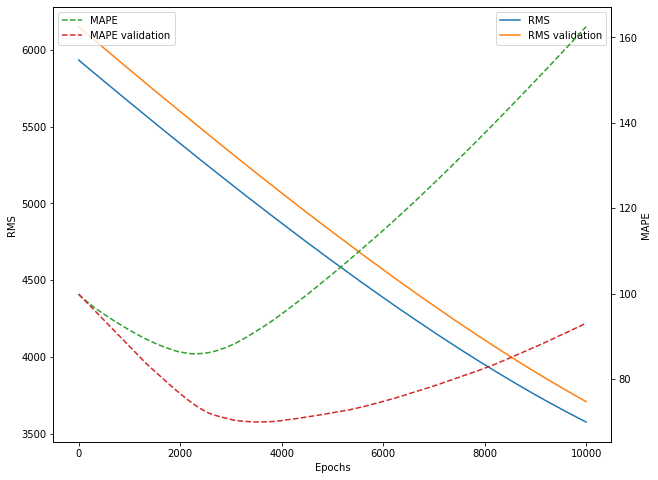

In [10]:
X = circular_database.drop(columns=['8012','8022'])
y = circular_database[['8012','8022']].sum(axis=1)
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = Sequential()
hist = History()

# topologia 23-23-10-5-1
model.add(Dense(23, activation='tanh', input_dim = X_train.shape[1]))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))

#sgd = optimizers.SGD(lr=.005, decay=1e-6, momentum=0.8, nesterov=True)
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='mse', 
              metrics=['mse', 'mape'])

model.fit(X_train, y_train, epochs = 10000, validation_split = .1, callbacks = [hist])

y_pred =  model.predict(X_test)
print('\nVariance score:\t%.2f\n' % r2_score(y_test, y_pred))

plt.figure(figsize=(10,8))
ax0 = plt.subplot(111)
ax0.plot(np.sqrt(hist.history['mean_squared_error']))
ax0.plot(np.sqrt(hist.history['val_mean_squared_error']))
plt.xlabel('Epochs')
plt.ylabel('RMS')
plt.legend(['RMS', 'RMS validation'])
ax1 = ax0.twinx()
ax1.plot(hist.history['mean_absolute_percentage_error'], '--C2')
ax1.plot(hist.history['val_mean_absolute_percentage_error'], '--C3')
plt.ylabel('MAPE')
plt.legend(['MAPE', 'MAPE validation'])

# Análise da significância das variáveis

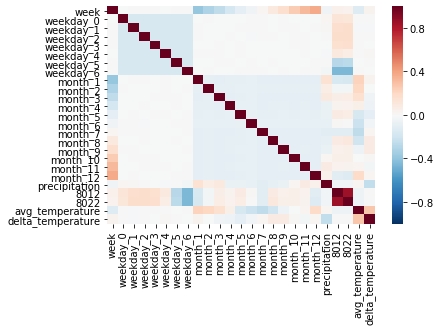

In [6]:
corr = circular_database.corr(method='kendall')
sns.heatmap(corr, vmin=-1, vmax=1, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu_r")

## Dados de data

### Semana

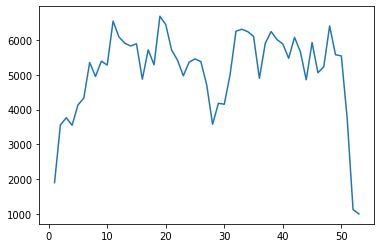

In [7]:
df = circular_database[['week', '8012', '8022']].groupby('week').mean()
df = df.sum(axis=1)
plt.plot(df)

### Mês

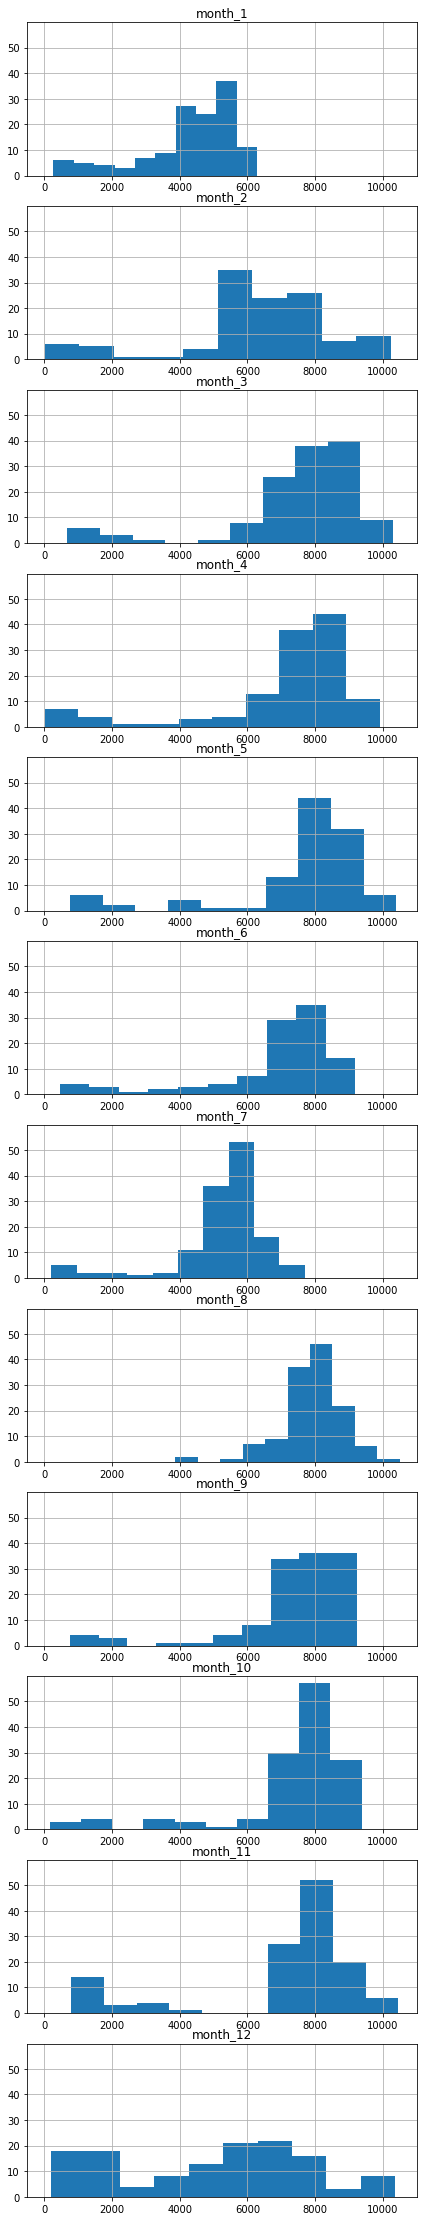

In [8]:
weekday_circular = circular_database.loc[(circular_database['weekday_5'] == 0) & (circular_database['weekday_6'] == 0)]

plt.figure(figsize=(7,40))
ax0 = plt.subplot(12, 1, 1)
weekday_circular.loc[weekday_circular['month_1'] == 1][['8012','8022']].sum(axis=1).hist()
plt.title('month_1')
for i in range(2, 13):
    plt.subplot(12, 1, i, sharex=ax0, sharey=ax0)
    weekday_circular.loc[weekday_circular['month_{i}'.format(i=i)] == 1][['8012','8022']].sum(axis=1).hist()
    plt.title('month_{i}'.format(i=i))


## Dados climáticos

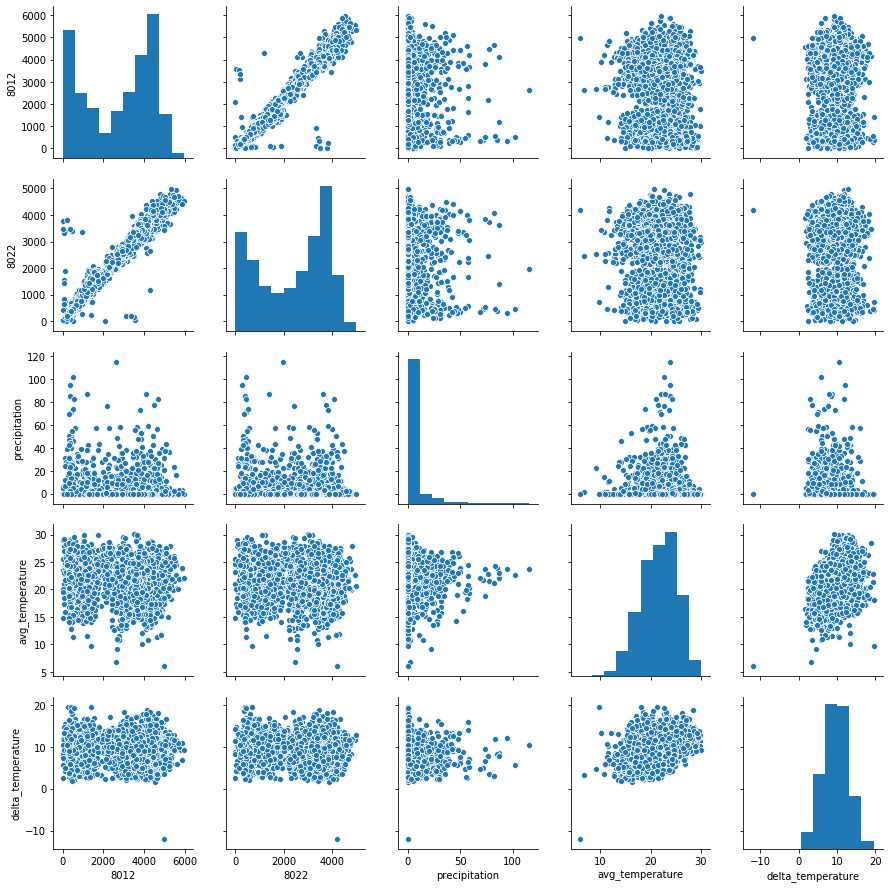

In [9]:
sns.pairplot(circular_database[['8012','8022','precipitation','avg_temperature','delta_temperature']])